# In this file we analyse how metrics were used

The dataset this loads can be found in ``test-datasets``. They are created by ``filter_all_metrics.py``.
- ``filter_all_metrics.py`` is memory hungry esp. since it does redundant work
- if you want to replicate these results, maybe optimize it or reserve 20GB memory.

NOTE: the dataset you load here needs to have flags for all filters => include passed and non-passed instances.

In [1]:
import datasets

In [2]:
lang = "fr"
dataset = datasets.load_from_disk("test-datasets/all_signals_with_ut1_35_"+lang+".hf")

In [3]:
print(dataset)

Dataset({
    features: ['raw_content', 'id', 'url', 'quality_signals', 'keep', 'ut1', 'number_of_words', 'number_of_lines', 'number_of_characters', 'language_identification', 'perplexity', 'stop_words', 'special_characters', 'flagged_words', 'words_per_line_mean', 'short_line_ratio', 'character_repetition10', 'character_repetition5', 'word_repetition', 'unigram_entropy', 'lines_end_in_punct'],
    num_rows: 156823
})


In [4]:
# do they match?
print(dataset[1]["url"])
print(dataset[1]["raw_content"])

http://apalaencina.es/asociate-2/
Al asociarte al APA de la Encina, estas colaborando en el desarrollo de las actividades que el APA realiza a lo largo del año.
El APA esta formado por un grupo de personas que trabajan de manera desinteresada, promoviendo la realización de actividades, eventos, talleres,… con el objetivo de mejorar y fomentar el bienestar de nuestros hijos. Por esto necesitamos ademas de la colaboración activa de los padres (mediante la participación en alguno de los grupos de trabajo), la colaboración con la cuota de asociado.
La cuota del APA es una única cuota por familia y depende del numero de hijos:
Con un hijo la cuota anual es de 40€
Con dos o más hijos la cuota anual es de 50€, (por familia)
Ser socio del APA, te proporcionará:
Reducción en la cuota mensual de las actividades extraescolares
Estar informado de las novedades y las noticias relacionadas con el colegio la Encina
Contribuir en la mejora de las instalaciones y servicios del colegio ( el dinero recau

In [5]:
a=dataset["keep"].count(True)
b=dataset["keep"].count(False)
print("keep: ", a)
print("discard: ", b)
print(a/(a+b))

keep:  74260
discard:  82563
0.4735274800252514


In [6]:
import numpy as np
from IPython.display import clear_output

def show_texts():
    switch = True
    i = np.random.randint(200)
    while switch:
        if dataset[i]["keep"]==True:
            print(dataset[i]["raw_content"])
            inp = input("q to quit, enter to continue")
            if inp =="q" or inp =="Q":
                switch = False
            else:
                i += np.random.randint(200)%(a+b)
                clear_output()
        else:
            i += np.random.randint(200)%(a+b)
#show_texts()       

## Results:

- English: 0.45714285714285713
- French: 0.4544478903470597
- Italian: 0.44316764528650904
- Spanish: 0.4710931780946073
- German: 0.5000178659482173

These below used "stop words" in the wrong "direction":

~With small_{lang}.hf:~

- ~French: 0.47767273458714676~
- ~English: 0.4368765498853318~
- ~German: 0.4939049703740046~
- ~Italian: 0.44826793378295526~
- ~Spanish: 0.4868613483040053~

~With all_signals_{lang}.hf:~
- ~English: 0.440865402927845~
- ~French: 0.478309064342218~
- ~German: 0.4929857421352395~
- ~Italian: 0.44679007483261124~
- ~Spanish: 0.4858024691358025~

~With all_signal_half_of_medium:~
- ~English: 0.4058928002185892~
- ~French: 0.40725216965108124~
- ~German: 0.44584831095325556~
- ~Italian: 0.3930127944618058~
- ~Spanish: 0.4139941436887789~



## Which metrics correlate?

Thinking of counting co-occurences of metrics and showing them on matrix.
Also analysis of how much UT1 blocklist correlates with the metrics; if filter discards, would UT1 also flag? And which metrics are more aligned with UT1?

In [7]:
# make sure to download "all_signals" dataset here
import numpy as np

metrics = ['number_of_words', 'number_of_lines', 'number_of_characters', 'language_identification', 'perplexity', 'stop_words', 'special_characters', 'flagged_words', 'words_per_line_mean', 'short_line_ratio', 'character_repetition10', 'character_repetition5', 'word_repetition', 'unigram_entropy', 'lines_end_in_punct']
metric2id = {k:v for k, v in zip(metrics, range(len(metrics)))}
id2metric = {v:k for k,v in metric2id.items()}


ut1_data = dataset.select_columns(["keep"]+["ut1"]+[m for m in metrics]).to_pandas()
found, values = np.unique(ut1_data["ut1"].to_list(), return_counts=True)

I got the next list from https://huggingface.co/datasets/togethercomputer/RedPajama-Data-V2/raw/main/ut1_domain_categories.json

In [8]:
ut1_categories={"0": ["adult"], "1": ["agressif"], "2": ["agressive"], "3": ["arjel"], "4": ["chat"], "5": ["dating"], "6": ["ddos"], "7": ["filehosting"], "8": ["gambling"], "9": ["mixed_adult"], "10": ["phishing"], "11": ["porn"], "12": ["violence"], "13": ["adult", "agressif"], "14": ["adult", "agressive"], "15": ["adult", "arjel"], "16": ["adult", "chat"], "17": ["adult", "dating"], "18": ["adult", "ddos"], "19": ["adult", "filehosting"], "20": ["adult", "gambling"], "21": ["adult", "mixed_adult"], "22": ["adult", "phishing"], "23": ["adult", "porn"], "24": ["adult", "violence"], "25": ["agressif", "agressive"], "26": ["agressif", "arjel"], "27": ["agressif", "chat"], "28": ["agressif", "dating"], "29": ["agressif", "ddos"], "30": ["agressif", "filehosting"], "31": ["agressif", "gambling"], "32": ["agressif", "mixed_adult"], "33": ["agressif", "phishing"], "34": ["agressif", "porn"], "35": ["agressif", "violence"], "36": ["agressive", "arjel"], "37": ["agressive", "chat"], "38": ["agressive", "dating"], "39": ["agressive", "ddos"], "40": ["agressive", "filehosting"], "41": ["agressive", "gambling"], "42": ["agressive", "mixed_adult"], "43": ["agressive", "phishing"], "44": ["agressive", "porn"], "45": ["agressive", "violence"], "46": ["arjel", "chat"], "47": ["arjel", "dating"], "48": ["arjel", "ddos"], "49": ["arjel", "filehosting"], "50": ["arjel", "gambling"], "51": ["arjel", "mixed_adult"], "52": ["arjel", "phishing"], "53": ["arjel", "porn"], "54": ["arjel", "violence"], "55": ["chat", "dating"], "56": ["chat", "ddos"], "57": ["chat", "filehosting"], "58": ["chat", "gambling"], "59": ["chat", "mixed_adult"], "60": ["chat", "phishing"], "61": ["chat", "porn"], "62": ["chat", "violence"], "63": ["dating", "ddos"], "64": ["dating", "filehosting"], "65": ["dating", "gambling"], "66": ["dating", "mixed_adult"], "67": ["dating", "phishing"], "68": ["dating", "porn"], "69": ["dating", "violence"], "70": ["ddos", "filehosting"], "71": ["ddos", "gambling"], "72": ["ddos", "mixed_adult"], "73": ["ddos", "phishing"], "74": ["ddos", "porn"], "75": ["ddos", "violence"], "76": ["filehosting", "gambling"], "77": ["filehosting", "mixed_adult"], "78": ["filehosting", "phishing"], "79": ["filehosting", "porn"], "80": ["filehosting", "violence"], "81": ["gambling", "mixed_adult"], "82": ["gambling", "phishing"], "83": ["gambling", "porn"], "84": ["gambling", "violence"], "85": ["mixed_adult", "phishing"], "86": ["mixed_adult", "porn"], "87": ["mixed_adult", "violence"], "88": ["phishing", "porn"], "89": ["phishing", "violence"], "90": ["porn", "violence"], "91": ["adult", "agressif", "agressive"], "92": ["adult", "agressif", "arjel"], "93": ["adult", "agressif", "chat"], "94": ["adult", "agressif", "dating"], "95": ["adult", "agressif", "ddos"], "96": ["adult", "agressif", "filehosting"], "97": ["adult", "agressif", "gambling"], "98": ["adult", "agressif", "mixed_adult"], "99": ["adult", "agressif", "phishing"], "100": ["adult", "agressif", "porn"], "101": ["adult", "agressif", "violence"], "102": ["adult", "agressive", "arjel"], "103": ["adult", "agressive", "chat"], "104": ["adult", "agressive", "dating"], "105": ["adult", "agressive", "ddos"], "106": ["adult", "agressive", "filehosting"], "107": ["adult", "agressive", "gambling"], "108": ["adult", "agressive", "mixed_adult"], "109": ["adult", "agressive", "phishing"], "110": ["adult", "agressive", "porn"], "111": ["adult", "agressive", "violence"], "112": ["adult", "arjel", "chat"], "113": ["adult", "arjel", "dating"], "114": ["adult", "arjel", "ddos"], "115": ["adult", "arjel", "filehosting"], "116": ["adult", "arjel", "gambling"], "117": ["adult", "arjel", "mixed_adult"], "118": ["adult", "arjel", "phishing"], "119": ["adult", "arjel", "porn"], "120": ["adult", "arjel", "violence"], "121": ["adult", "chat", "dating"], "122": ["adult", "chat", "ddos"], "123": ["adult", "chat", "filehosting"], "124": ["adult", "chat", "gambling"], "125": ["adult", "chat", "mixed_adult"], "126": ["adult", "chat", "phishing"], "127": ["adult", "chat", "porn"], "128": ["adult", "chat", "violence"], "129": ["adult", "dating", "ddos"], "130": ["adult", "dating", "filehosting"], "131": ["adult", "dating", "gambling"], "132": ["adult", "dating", "mixed_adult"], "133": ["adult", "dating", "phishing"], "134": ["adult", "dating", "porn"], "135": ["adult", "dating", "violence"], "136": ["adult", "ddos", "filehosting"], "137": ["adult", "ddos", "gambling"], "138": ["adult", "ddos", "mixed_adult"], "139": ["adult", "ddos", "phishing"], "140": ["adult", "ddos", "porn"], "141": ["adult", "ddos", "violence"], "142": ["adult", "filehosting", "gambling"], "143": ["adult", "filehosting", "mixed_adult"], "144": ["adult", "filehosting", "phishing"], "145": ["adult", "filehosting", "porn"], "146": ["adult", "filehosting", "violence"], "147": ["adult", "gambling", "mixed_adult"], "148": ["adult", "gambling", "phishing"], "149": ["adult", "gambling", "porn"], "150": ["adult", "gambling", "violence"], "151": ["adult", "mixed_adult", "phishing"], "152": ["adult", "mixed_adult", "porn"], "153": ["adult", "mixed_adult", "violence"], "154": ["adult", "phishing", "porn"], "155": ["adult", "phishing", "violence"], "156": ["adult", "porn", "violence"], "157": ["agressif", "agressive", "arjel"], "158": ["agressif", "agressive", "chat"], "159": ["agressif", "agressive", "dating"], "160": ["agressif", "agressive", "ddos"], "161": ["agressif", "agressive", "filehosting"], "162": ["agressif", "agressive", "gambling"], "163": ["agressif", "agressive", "mixed_adult"], "164": ["agressif", "agressive", "phishing"], "165": ["agressif", "agressive", "porn"], "166": ["agressif", "agressive", "violence"], "167": ["agressif", "arjel", "chat"], "168": ["agressif", "arjel", "dating"], "169": ["agressif", "arjel", "ddos"], "170": ["agressif", "arjel", "filehosting"], "171": ["agressif", "arjel", "gambling"], "172": ["agressif", "arjel", "mixed_adult"], "173": ["agressif", "arjel", "phishing"], "174": ["agressif", "arjel", "porn"], "175": ["agressif", "arjel", "violence"], "176": ["agressif", "chat", "dating"], "177": ["agressif", "chat", "ddos"], "178": ["agressif", "chat", "filehosting"], "179": ["agressif", "chat", "gambling"], "180": ["agressif", "chat", "mixed_adult"], "181": ["agressif", "chat", "phishing"], "182": ["agressif", "chat", "porn"], "183": ["agressif", "chat", "violence"], "184": ["agressif", "dating", "ddos"], "185": ["agressif", "dating", "filehosting"], "186": ["agressif", "dating", "gambling"], "187": ["agressif", "dating", "mixed_adult"], "188": ["agressif", "dating", "phishing"], "189": ["agressif", "dating", "porn"], "190": ["agressif", "dating", "violence"], "191": ["agressif", "ddos", "filehosting"], "192": ["agressif", "ddos", "gambling"], "193": ["agressif", "ddos", "mixed_adult"], "194": ["agressif", "ddos", "phishing"], "195": ["agressif", "ddos", "porn"], "196": ["agressif", "ddos", "violence"], "197": ["agressif", "filehosting", "gambling"], "198": ["agressif", "filehosting", "mixed_adult"], "199": ["agressif", "filehosting", "phishing"], "200": ["agressif", "filehosting", "porn"], "201": ["agressif", "filehosting", "violence"], "202": ["agressif", "gambling", "mixed_adult"], "203": ["agressif", "gambling", "phishing"], "204": ["agressif", "gambling", "porn"], "205": ["agressif", "gambling", "violence"], "206": ["agressif", "mixed_adult", "phishing"], "207": ["agressif", "mixed_adult", "porn"], "208": ["agressif", "mixed_adult", "violence"], "209": ["agressif", "phishing", "porn"], "210": ["agressif", "phishing", "violence"], "211": ["agressif", "porn", "violence"], "212": ["agressive", "arjel", "chat"], "213": ["agressive", "arjel", "dating"], "214": ["agressive", "arjel", "ddos"], "215": ["agressive", "arjel", "filehosting"], "216": ["agressive", "arjel", "gambling"], "217": ["agressive", "arjel", "mixed_adult"], "218": ["agressive", "arjel", "phishing"], "219": ["agressive", "arjel", "porn"], "220": ["agressive", "arjel", "violence"], "221": ["agressive", "chat", "dating"], "222": ["agressive", "chat", "ddos"], "223": ["agressive", "chat", "filehosting"], "224": ["agressive", "chat", "gambling"], "225": ["agressive", "chat", "mixed_adult"], "226": ["agressive", "chat", "phishing"], "227": ["agressive", "chat", "porn"], "228": ["agressive", "chat", "violence"], "229": ["agressive", "dating", "ddos"], "230": ["agressive", "dating", "filehosting"], "231": ["agressive", "dating", "gambling"], "232": ["agressive", "dating", "mixed_adult"], "233": ["agressive", "dating", "phishing"], "234": ["agressive", "dating", "porn"], "235": ["agressive", "dating", "violence"], "236": ["agressive", "ddos", "filehosting"], "237": ["agressive", "ddos", "gambling"], "238": ["agressive", "ddos", "mixed_adult"], "239": ["agressive", "ddos", "phishing"], "240": ["agressive", "ddos", "porn"], "241": ["agressive", "ddos", "violence"], "242": ["agressive", "filehosting", "gambling"], "243": ["agressive", "filehosting", "mixed_adult"], "244": ["agressive", "filehosting", "phishing"], "245": ["agressive", "filehosting", "porn"], "246": ["agressive", "filehosting", "violence"], "247": ["agressive", "gambling", "mixed_adult"], "248": ["agressive", "gambling", "phishing"], "249": ["agressive", "gambling", "porn"], "250": ["agressive", "gambling", "violence"], "251": ["agressive", "mixed_adult", "phishing"], "252": ["agressive", "mixed_adult", "porn"], "253": ["agressive", "mixed_adult", "violence"], "254": ["agressive", "phishing", "porn"], "255": ["agressive", "phishing", "violence"], "256": ["agressive", "porn", "violence"], "257": ["arjel", "chat", "dating"], "258": ["arjel", "chat", "ddos"], "259": ["arjel", "chat", "filehosting"], "260": ["arjel", "chat", "gambling"], "261": ["arjel", "chat", "mixed_adult"], "262": ["arjel", "chat", "phishing"], "263": ["arjel", "chat", "porn"], "264": ["arjel", "chat", "violence"], "265": ["arjel", "dating", "ddos"], "266": ["arjel", "dating", "filehosting"], "267": ["arjel", "dating", "gambling"], "268": ["arjel", "dating", "mixed_adult"], "269": ["arjel", "dating", "phishing"], "270": ["arjel", "dating", "porn"], "271": ["arjel", "dating", "violence"], "272": ["arjel", "ddos", "filehosting"], "273": ["arjel", "ddos", "gambling"], "274": ["arjel", "ddos", "mixed_adult"], "275": ["arjel", "ddos", "phishing"], "276": ["arjel", "ddos", "porn"], "277": ["arjel", "ddos", "violence"], "278": ["arjel", "filehosting", "gambling"], "279": ["arjel", "filehosting", "mixed_adult"], "280": ["arjel", "filehosting", "phishing"], "281": ["arjel", "filehosting", "porn"], "282": ["arjel", "filehosting", "violence"], "283": ["arjel", "gambling", "mixed_adult"], "284": ["arjel", "gambling", "phishing"], "285": ["arjel", "gambling", "porn"], "286": ["arjel", "gambling", "violence"], "287": ["arjel", "mixed_adult", "phishing"], "288": ["arjel", "mixed_adult", "porn"], "289": ["arjel", "mixed_adult", "violence"], "290": ["arjel", "phishing", "porn"], "291": ["arjel", "phishing", "violence"], "292": ["arjel", "porn", "violence"], "293": ["chat", "dating", "ddos"], "294": ["chat", "dating", "filehosting"], "295": ["chat", "dating", "gambling"], "296": ["chat", "dating", "mixed_adult"], "297": ["chat", "dating", "phishing"], "298": ["chat", "dating", "porn"], "299": ["chat", "dating", "violence"], "300": ["chat", "ddos", "filehosting"], "301": ["chat", "ddos", "gambling"], "302": ["chat", "ddos", "mixed_adult"], "303": ["chat", "ddos", "phishing"], "304": ["chat", "ddos", "porn"], "305": ["chat", "ddos", "violence"], "306": ["chat", "filehosting", "gambling"], "307": ["chat", "filehosting", "mixed_adult"], "308": ["chat", "filehosting", "phishing"], "309": ["chat", "filehosting", "porn"], "310": ["chat", "filehosting", "violence"], "311": ["chat", "gambling", "mixed_adult"], "312": ["chat", "gambling", "phishing"], "313": ["chat", "gambling", "porn"], "314": ["chat", "gambling", "violence"], "315": ["chat", "mixed_adult", "phishing"], "316": ["chat", "mixed_adult", "porn"], "317": ["chat", "mixed_adult", "violence"], "318": ["chat", "phishing", "porn"], "319": ["chat", "phishing", "violence"], "320": ["chat", "porn", "violence"], "321": ["dating", "ddos", "filehosting"], "322": ["dating", "ddos", "gambling"], "323": ["dating", "ddos", "mixed_adult"], "324": ["dating", "ddos", "phishing"], "325": ["dating", "ddos", "porn"], "326": ["dating", "ddos", "violence"], "327": ["dating", "filehosting", "gambling"], "328": ["dating", "filehosting", "mixed_adult"], "329": ["dating", "filehosting", "phishing"], "330": ["dating", "filehosting", "porn"], "331": ["dating", "filehosting", "violence"], "332": ["dating", "gambling", "mixed_adult"], "333": ["dating", "gambling", "phishing"], "334": ["dating", "gambling", "porn"], "335": ["dating", "gambling", "violence"], "336": ["dating", "mixed_adult", "phishing"], "337": ["dating", "mixed_adult", "porn"], "338": ["dating", "mixed_adult", "violence"], "339": ["dating", "phishing", "porn"], "340": ["dating", "phishing", "violence"], "341": ["dating", "porn", "violence"], "342": ["ddos", "filehosting", "gambling"], "343": ["ddos", "filehosting", "mixed_adult"], "344": ["ddos", "filehosting", "phishing"], "345": ["ddos", "filehosting", "porn"], "346": ["ddos", "filehosting", "violence"], "347": ["ddos", "gambling", "mixed_adult"], "348": ["ddos", "gambling", "phishing"], "349": ["ddos", "gambling", "porn"], "350": ["ddos", "gambling", "violence"], "351": ["ddos", "mixed_adult", "phishing"], "352": ["ddos", "mixed_adult", "porn"], "353": ["ddos", "mixed_adult", "violence"], "354": ["ddos", "phishing", "porn"], "355": ["ddos", "phishing", "violence"], "356": ["ddos", "porn", "violence"], "357": ["filehosting", "gambling", "mixed_adult"], "358": ["filehosting", "gambling", "phishing"], "359": ["filehosting", "gambling", "porn"], "360": ["filehosting", "gambling", "violence"], "361": ["filehosting", "mixed_adult", "phishing"], "362": ["filehosting", "mixed_adult", "porn"], "363": ["filehosting", "mixed_adult", "violence"], "364": ["filehosting", "phishing", "porn"], "365": ["filehosting", "phishing", "violence"], "366": ["filehosting", "porn", "violence"], "367": ["gambling", "mixed_adult", "phishing"], "368": ["gambling", "mixed_adult", "porn"], "369": ["gambling", "mixed_adult", "violence"], "370": ["gambling", "phishing", "porn"], "371": ["gambling", "phishing", "violence"], "372": ["gambling", "porn", "violence"], "373": ["mixed_adult", "phishing", "porn"], "374": ["mixed_adult", "phishing", "violence"], "375": ["mixed_adult", "porn", "violence"], "376": ["phishing", "porn", "violence"], "377": ["adult", "agressif", "agressive", "arjel"], "378": ["adult", "agressif", "agressive", "chat"], "379": ["adult", "agressif", "agressive", "dating"], "380": ["adult", "agressif", "agressive", "ddos"], "381": ["adult", "agressif", "agressive", "filehosting"], "382": ["adult", "agressif", "agressive", "gambling"], "383": ["adult", "agressif", "agressive", "mixed_adult"], "384": ["adult", "agressif", "agressive", "phishing"], "385": ["adult", "agressif", "agressive", "porn"], "386": ["adult", "agressif", "agressive", "violence"], "387": ["adult", "agressif", "arjel", "chat"], "388": ["adult", "agressif", "arjel", "dating"], "389": ["adult", "agressif", "arjel", "ddos"], "390": ["adult", "agressif", "arjel", "filehosting"], "391": ["adult", "agressif", "arjel", "gambling"], "392": ["adult", "agressif", "arjel", "mixed_adult"], "393": ["adult", "agressif", "arjel", "phishing"], "394": ["adult", "agressif", "arjel", "porn"], "395": ["adult", "agressif", "arjel", "violence"], "396": ["adult", "agressif", "chat", "dating"], "397": ["adult", "agressif", "chat", "ddos"], "398": ["adult", "agressif", "chat", "filehosting"], "399": ["adult", "agressif", "chat", "gambling"], "400": ["adult", "agressif", "chat", "mixed_adult"], "401": ["adult", "agressif", "chat", "phishing"], "402": ["adult", "agressif", "chat", "porn"], "403": ["adult", "agressif", "chat", "violence"], "404": ["adult", "agressif", "dating", "ddos"], "405": ["adult", "agressif", "dating", "filehosting"], "406": ["adult", "agressif", "dating", "gambling"], "407": ["adult", "agressif", "dating", "mixed_adult"], "408": ["adult", "agressif", "dating", "phishing"], "409": ["adult", "agressif", "dating", "porn"], "410": ["adult", "agressif", "dating", "violence"], "411": ["adult", "agressif", "ddos", "filehosting"], "412": ["adult", "agressif", "ddos", "gambling"], "413": ["adult", "agressif", "ddos", "mixed_adult"], "414": ["adult", "agressif", "ddos", "phishing"], "415": ["adult", "agressif", "ddos", "porn"], "416": ["adult", "agressif", "ddos", "violence"], "417": ["adult", "agressif", "filehosting", "gambling"], "418": ["adult", "agressif", "filehosting", "mixed_adult"], "419": ["adult", "agressif", "filehosting", "phishing"], "420": ["adult", "agressif", "filehosting", "porn"], "421": ["adult", "agressif", "filehosting", "violence"], "422": ["adult", "agressif", "gambling", "mixed_adult"], "423": ["adult", "agressif", "gambling", "phishing"], "424": ["adult", "agressif", "gambling", "porn"], "425": ["adult", "agressif", "gambling", "violence"], "426": ["adult", "agressif", "mixed_adult", "phishing"], "427": ["adult", "agressif", "mixed_adult", "porn"], "428": ["adult", "agressif", "mixed_adult", "violence"], "429": ["adult", "agressif", "phishing", "porn"], "430": ["adult", "agressif", "phishing", "violence"], "431": ["adult", "agressif", "porn", "violence"], "432": ["adult", "agressive", "arjel", "chat"], "433": ["adult", "agressive", "arjel", "dating"], "434": ["adult", "agressive", "arjel", "ddos"], "435": ["adult", "agressive", "arjel", "filehosting"], "436": ["adult", "agressive", "arjel", "gambling"], "437": ["adult", "agressive", "arjel", "mixed_adult"], "438": ["adult", "agressive", "arjel", "phishing"], "439": ["adult", "agressive", "arjel", "porn"], "440": ["adult", "agressive", "arjel", "violence"], "441": ["adult", "agressive", "chat", "dating"], "442": ["adult", "agressive", "chat", "ddos"], "443": ["adult", "agressive", "chat", "filehosting"], "444": ["adult", "agressive", "chat", "gambling"], "445": ["adult", "agressive", "chat", "mixed_adult"], "446": ["adult", "agressive", "chat", "phishing"], "447": ["adult", "agressive", "chat", "porn"], "448": ["adult", "agressive", "chat", "violence"], "449": ["adult", "agressive", "dating", "ddos"], "450": ["adult", "agressive", "dating", "filehosting"], "451": ["adult", "agressive", "dating", "gambling"], "452": ["adult", "agressive", "dating", "mixed_adult"], "453": ["adult", "agressive", "dating", "phishing"], "454": ["adult", "agressive", "dating", "porn"], "455": ["adult", "agressive", "dating", "violence"], "456": ["adult", "agressive", "ddos", "filehosting"], "457": ["adult", "agressive", "ddos", "gambling"], "458": ["adult", "agressive", "ddos", "mixed_adult"], "459": ["adult", "agressive", "ddos", "phishing"], "460": ["adult", "agressive", "ddos", "porn"], "461": ["adult", "agressive", "ddos", "violence"], "462": ["adult", "agressive", "filehosting", "gambling"], "463": ["adult", "agressive", "filehosting", "mixed_adult"], "464": ["adult", "agressive", "filehosting", "phishing"], "465": ["adult", "agressive", "filehosting", "porn"], "466": ["adult", "agressive", "filehosting", "violence"], "467": ["adult", "agressive", "gambling", "mixed_adult"], "468": ["adult", "agressive", "gambling", "phishing"], "469": ["adult", "agressive", "gambling", "porn"], "470": ["adult", "agressive", "gambling", "violence"], "471": ["adult", "agressive", "mixed_adult", "phishing"], "472": ["adult", "agressive", "mixed_adult", "porn"], "473": ["adult", "agressive", "mixed_adult", "violence"], "474": ["adult", "agressive", "phishing", "porn"], "475": ["adult", "agressive", "phishing", "violence"], "476": ["adult", "agressive", "porn", "violence"], "477": ["adult", "arjel", "chat", "dating"], "478": ["adult", "arjel", "chat", "ddos"], "479": ["adult", "arjel", "chat", "filehosting"], "480": ["adult", "arjel", "chat", "gambling"], "481": ["adult", "arjel", "chat", "mixed_adult"], "482": ["adult", "arjel", "chat", "phishing"], "483": ["adult", "arjel", "chat", "porn"], "484": ["adult", "arjel", "chat", "violence"], "485": ["adult", "arjel", "dating", "ddos"], "486": ["adult", "arjel", "dating", "filehosting"], "487": ["adult", "arjel", "dating", "gambling"], "488": ["adult", "arjel", "dating", "mixed_adult"], "489": ["adult", "arjel", "dating", "phishing"], "490": ["adult", "arjel", "dating", "porn"], "491": ["adult", "arjel", "dating", "violence"], "492": ["adult", "arjel", "ddos", "filehosting"], "493": ["adult", "arjel", "ddos", "gambling"], "494": ["adult", "arjel", "ddos", "mixed_adult"], "495": ["adult", "arjel", "ddos", "phishing"], "496": ["adult", "arjel", "ddos", "porn"], "497": ["adult", "arjel", "ddos", "violence"], "498": ["adult", "arjel", "filehosting", "gambling"], "499": ["adult", "arjel", "filehosting", "mixed_adult"], "500": ["adult", "arjel", "filehosting", "phishing"], "501": ["adult", "arjel", "filehosting", "porn"], "502": ["adult", "arjel", "filehosting", "violence"], "503": ["adult", "arjel", "gambling", "mixed_adult"], "504": ["adult", "arjel", "gambling", "phishing"], "505": ["adult", "arjel", "gambling", "porn"], "506": ["adult", "arjel", "gambling", "violence"], "507": ["adult", "arjel", "mixed_adult", "phishing"], "508": ["adult", "arjel", "mixed_adult", "porn"], "509": ["adult", "arjel", "mixed_adult", "violence"], "510": ["adult", "arjel", "phishing", "porn"], "511": ["adult", "arjel", "phishing", "violence"], "512": ["adult", "arjel", "porn", "violence"], "513": ["adult", "chat", "dating", "ddos"], "514": ["adult", "chat", "dating", "filehosting"], "515": ["adult", "chat", "dating", "gambling"], "516": ["adult", "chat", "dating", "mixed_adult"], "517": ["adult", "chat", "dating", "phishing"], "518": ["adult", "chat", "dating", "porn"], "519": ["adult", "chat", "dating", "violence"], "520": ["adult", "chat", "ddos", "filehosting"], "521": ["adult", "chat", "ddos", "gambling"], "522": ["adult", "chat", "ddos", "mixed_adult"], "523": ["adult", "chat", "ddos", "phishing"], "524": ["adult", "chat", "ddos", "porn"], "525": ["adult", "chat", "ddos", "violence"], "526": ["adult", "chat", "filehosting", "gambling"], "527": ["adult", "chat", "filehosting", "mixed_adult"], "528": ["adult", "chat", "filehosting", "phishing"], "529": ["adult", "chat", "filehosting", "porn"], "530": ["adult", "chat", "filehosting", "violence"], "531": ["adult", "chat", "gambling", "mixed_adult"], "532": ["adult", "chat", "gambling", "phishing"], "533": ["adult", "chat", "gambling", "porn"], "534": ["adult", "chat", "gambling", "violence"], "535": ["adult", "chat", "mixed_adult", "phishing"], "536": ["adult", "chat", "mixed_adult", "porn"], "537": ["adult", "chat", "mixed_adult", "violence"], "538": ["adult", "chat", "phishing", "porn"], "539": ["adult", "chat", "phishing", "violence"], "540": ["adult", "chat", "porn", "violence"], "541": ["adult", "dating", "ddos", "filehosting"], "542": ["adult", "dating", "ddos", "gambling"], "543": ["adult", "dating", "ddos", "mixed_adult"], "544": ["adult", "dating", "ddos", "phishing"], "545": ["adult", "dating", "ddos", "porn"], "546": ["adult", "dating", "ddos", "violence"], "547": ["adult", "dating", "filehosting", "gambling"], "548": ["adult", "dating", "filehosting", "mixed_adult"], "549": ["adult", "dating", "filehosting", "phishing"], "550": ["adult", "dating", "filehosting", "porn"], "551": ["adult", "dating", "filehosting", "violence"], "552": ["adult", "dating", "gambling", "mixed_adult"], "553": ["adult", "dating", "gambling", "phishing"], "554": ["adult", "dating", "gambling", "porn"], "555": ["adult", "dating", "gambling", "violence"], "556": ["adult", "dating", "mixed_adult", "phishing"], "557": ["adult", "dating", "mixed_adult", "porn"], "558": ["adult", "dating", "mixed_adult", "violence"], "559": ["adult", "dating", "phishing", "porn"], "560": ["adult", "dating", "phishing", "violence"], "561": ["adult", "dating", "porn", "violence"], "562": ["adult", "ddos", "filehosting", "gambling"], "563": ["adult", "ddos", "filehosting", "mixed_adult"], "564": ["adult", "ddos", "filehosting", "phishing"], "565": ["adult", "ddos", "filehosting", "porn"], "566": ["adult", "ddos", "filehosting", "violence"], "567": ["adult", "ddos", "gambling", "mixed_adult"], "568": ["adult", "ddos", "gambling", "phishing"], "569": ["adult", "ddos", "gambling", "porn"], "570": ["adult", "ddos", "gambling", "violence"], "571": ["adult", "ddos", "mixed_adult", "phishing"], "572": ["adult", "ddos", "mixed_adult", "porn"], "573": ["adult", "ddos", "mixed_adult", "violence"], "574": ["adult", "ddos", "phishing", "porn"], "575": ["adult", "ddos", "phishing", "violence"], "576": ["adult", "ddos", "porn", "violence"], "577": ["adult", "filehosting", "gambling", "mixed_adult"], "578": ["adult", "filehosting", "gambling", "phishing"], "579": ["adult", "filehosting", "gambling", "porn"], "580": ["adult", "filehosting", "gambling", "violence"], "581": ["adult", "filehosting", "mixed_adult", "phishing"], "582": ["adult", "filehosting", "mixed_adult", "porn"], "583": ["adult", "filehosting", "mixed_adult", "violence"], "584": ["adult", "filehosting", "phishing", "porn"], "585": ["adult", "filehosting", "phishing", "violence"], "586": ["adult", "filehosting", "porn", "violence"], "587": ["adult", "gambling", "mixed_adult", "phishing"], "588": ["adult", "gambling", "mixed_adult", "porn"], "589": ["adult", "gambling", "mixed_adult", "violence"], "590": ["adult", "gambling", "phishing", "porn"], "591": ["adult", "gambling", "phishing", "violence"], "592": ["adult", "gambling", "porn", "violence"], "593": ["adult", "mixed_adult", "phishing", "porn"], "594": ["adult", "mixed_adult", "phishing", "violence"], "595": ["adult", "mixed_adult", "porn", "violence"], "596": ["adult", "phishing", "porn", "violence"], "597": ["agressif", "agressive", "arjel", "chat"], "598": ["agressif", "agressive", "arjel", "dating"], "599": ["agressif", "agressive", "arjel", "ddos"], "600": ["agressif", "agressive", "arjel", "filehosting"], "601": ["agressif", "agressive", "arjel", "gambling"], "602": ["agressif", "agressive", "arjel", "mixed_adult"], "603": ["agressif", "agressive", "arjel", "phishing"], "604": ["agressif", "agressive", "arjel", "porn"], "605": ["agressif", "agressive", "arjel", "violence"], "606": ["agressif", "agressive", "chat", "dating"], "607": ["agressif", "agressive", "chat", "ddos"], "608": ["agressif", "agressive", "chat", "filehosting"], "609": ["agressif", "agressive", "chat", "gambling"], "610": ["agressif", "agressive", "chat", "mixed_adult"], "611": ["agressif", "agressive", "chat", "phishing"], "612": ["agressif", "agressive", "chat", "porn"], "613": ["agressif", "agressive", "chat", "violence"], "614": ["agressif", "agressive", "dating", "ddos"], "615": ["agressif", "agressive", "dating", "filehosting"], "616": ["agressif", "agressive", "dating", "gambling"], "617": ["agressif", "agressive", "dating", "mixed_adult"], "618": ["agressif", "agressive", "dating", "phishing"], "619": ["agressif", "agressive", "dating", "porn"], "620": ["agressif", "agressive", "dating", "violence"], "621": ["agressif", "agressive", "ddos", "filehosting"], "622": ["agressif", "agressive", "ddos", "gambling"], "623": ["agressif", "agressive", "ddos", "mixed_adult"], "624": ["agressif", "agressive", "ddos", "phishing"], "625": ["agressif", "agressive", "ddos", "porn"], "626": ["agressif", "agressive", "ddos", "violence"], "627": ["agressif", "agressive", "filehosting", "gambling"], "628": ["agressif", "agressive", "filehosting", "mixed_adult"], "629": ["agressif", "agressive", "filehosting", "phishing"], "630": ["agressif", "agressive", "filehosting", "porn"], "631": ["agressif", "agressive", "filehosting", "violence"], "632": ["agressif", "agressive", "gambling", "mixed_adult"], "633": ["agressif", "agressive", "gambling", "phishing"], "634": ["agressif", "agressive", "gambling", "porn"], "635": ["agressif", "agressive", "gambling", "violence"], "636": ["agressif", "agressive", "mixed_adult", "phishing"], "637": ["agressif", "agressive", "mixed_adult", "porn"], "638": ["agressif", "agressive", "mixed_adult", "violence"], "639": ["agressif", "agressive", "phishing", "porn"], "640": ["agressif", "agressive", "phishing", "violence"], "641": ["agressif", "agressive", "porn", "violence"], "642": ["agressif", "arjel", "chat", "dating"], "643": ["agressif", "arjel", "chat", "ddos"], "644": ["agressif", "arjel", "chat", "filehosting"], "645": ["agressif", "arjel", "chat", "gambling"], "646": ["agressif", "arjel", "chat", "mixed_adult"], "647": ["agressif", "arjel", "chat", "phishing"], "648": ["agressif", "arjel", "chat", "porn"], "649": ["agressif", "arjel", "chat", "violence"], "650": ["agressif", "arjel", "dating", "ddos"], "651": ["agressif", "arjel", "dating", "filehosting"], "652": ["agressif", "arjel", "dating", "gambling"], "653": ["agressif", "arjel", "dating", "mixed_adult"], "654": ["agressif", "arjel", "dating", "phishing"], "655": ["agressif", "arjel", "dating", "porn"], "656": ["agressif", "arjel", "dating", "violence"], "657": ["agressif", "arjel", "ddos", "filehosting"], "658": ["agressif", "arjel", "ddos", "gambling"], "659": ["agressif", "arjel", "ddos", "mixed_adult"], "660": ["agressif", "arjel", "ddos", "phishing"], "661": ["agressif", "arjel", "ddos", "porn"], "662": ["agressif", "arjel", "ddos", "violence"], "663": ["agressif", "arjel", "filehosting", "gambling"], "664": ["agressif", "arjel", "filehosting", "mixed_adult"], "665": ["agressif", "arjel", "filehosting", "phishing"], "666": ["agressif", "arjel", "filehosting", "porn"], "667": ["agressif", "arjel", "filehosting", "violence"], "668": ["agressif", "arjel", "gambling", "mixed_adult"], "669": ["agressif", "arjel", "gambling", "phishing"], "670": ["agressif", "arjel", "gambling", "porn"], "671": ["agressif", "arjel", "gambling", "violence"], "672": ["agressif", "arjel", "mixed_adult", "phishing"], "673": ["agressif", "arjel", "mixed_adult", "porn"], "674": ["agressif", "arjel", "mixed_adult", "violence"], "675": ["agressif", "arjel", "phishing", "porn"], "676": ["agressif", "arjel", "phishing", "violence"], "677": ["agressif", "arjel", "porn", "violence"], "678": ["agressif", "chat", "dating", "ddos"], "679": ["agressif", "chat", "dating", "filehosting"], "680": ["agressif", "chat", "dating", "gambling"], "681": ["agressif", "chat", "dating", "mixed_adult"], "682": ["agressif", "chat", "dating", "phishing"], "683": ["agressif", "chat", "dating", "porn"], "684": ["agressif", "chat", "dating", "violence"], "685": ["agressif", "chat", "ddos", "filehosting"], "686": ["agressif", "chat", "ddos", "gambling"], "687": ["agressif", "chat", "ddos", "mixed_adult"], "688": ["agressif", "chat", "ddos", "phishing"], "689": ["agressif", "chat", "ddos", "porn"], "690": ["agressif", "chat", "ddos", "violence"], "691": ["agressif", "chat", "filehosting", "gambling"], "692": ["agressif", "chat", "filehosting", "mixed_adult"], "693": ["agressif", "chat", "filehosting", "phishing"], "694": ["agressif", "chat", "filehosting", "porn"], "695": ["agressif", "chat", "filehosting", "violence"], "696": ["agressif", "chat", "gambling", "mixed_adult"], "697": ["agressif", "chat", "gambling", "phishing"], "698": ["agressif", "chat", "gambling", "porn"], "699": ["agressif", "chat", "gambling", "violence"], "700": ["agressif", "chat", "mixed_adult", "phishing"], "701": ["agressif", "chat", "mixed_adult", "porn"], "702": ["agressif", "chat", "mixed_adult", "violence"], "703": ["agressif", "chat", "phishing", "porn"], "704": ["agressif", "chat", "phishing", "violence"], "705": ["agressif", "chat", "porn", "violence"], "706": ["agressif", "dating", "ddos", "filehosting"], "707": ["agressif", "dating", "ddos", "gambling"], "708": ["agressif", "dating", "ddos", "mixed_adult"], "709": ["agressif", "dating", "ddos", "phishing"], "710": ["agressif", "dating", "ddos", "porn"], "711": ["agressif", "dating", "ddos", "violence"], "712": ["agressif", "dating", "filehosting", "gambling"], "713": ["agressif", "dating", "filehosting", "mixed_adult"], "714": ["agressif", "dating", "filehosting", "phishing"], "715": ["agressif", "dating", "filehosting", "porn"], "716": ["agressif", "dating", "filehosting", "violence"], "717": ["agressif", "dating", "gambling", "mixed_adult"], "718": ["agressif", "dating", "gambling", "phishing"], "719": ["agressif", "dating", "gambling", "porn"], "720": ["agressif", "dating", "gambling", "violence"], "721": ["agressif", "dating", "mixed_adult", "phishing"], "722": ["agressif", "dating", "mixed_adult", "porn"], "723": ["agressif", "dating", "mixed_adult", "violence"], "724": ["agressif", "dating", "phishing", "porn"], "725": ["agressif", "dating", "phishing", "violence"], "726": ["agressif", "dating", "porn", "violence"], "727": ["agressif", "ddos", "filehosting", "gambling"], "728": ["agressif", "ddos", "filehosting", "mixed_adult"], "729": ["agressif", "ddos", "filehosting", "phishing"], "730": ["agressif", "ddos", "filehosting", "porn"], "731": ["agressif", "ddos", "filehosting", "violence"], "732": ["agressif", "ddos", "gambling", "mixed_adult"], "733": ["agressif", "ddos", "gambling", "phishing"], "734": ["agressif", "ddos", "gambling", "porn"], "735": ["agressif", "ddos", "gambling", "violence"], "736": ["agressif", "ddos", "mixed_adult", "phishing"], "737": ["agressif", "ddos", "mixed_adult", "porn"], "738": ["agressif", "ddos", "mixed_adult", "violence"], "739": ["agressif", "ddos", "phishing", "porn"], "740": ["agressif", "ddos", "phishing", "violence"], "741": ["agressif", "ddos", "porn", "violence"], "742": ["agressif", "filehosting", "gambling", "mixed_adult"], "743": ["agressif", "filehosting", "gambling", "phishing"], "744": ["agressif", "filehosting", "gambling", "porn"], "745": ["agressif", "filehosting", "gambling", "violence"], "746": ["agressif", "filehosting", "mixed_adult", "phishing"], "747": ["agressif", "filehosting", "mixed_adult", "porn"], "748": ["agressif", "filehosting", "mixed_adult", "violence"], "749": ["agressif", "filehosting", "phishing", "porn"], "750": ["agressif", "filehosting", "phishing", "violence"], "751": ["agressif", "filehosting", "porn", "violence"], "752": ["agressif", "gambling", "mixed_adult", "phishing"], "753": ["agressif", "gambling", "mixed_adult", "porn"], "754": ["agressif", "gambling", "mixed_adult", "violence"], "755": ["agressif", "gambling", "phishing", "porn"], "756": ["agressif", "gambling", "phishing", "violence"], "757": ["agressif", "gambling", "porn", "violence"], "758": ["agressif", "mixed_adult", "phishing", "porn"], "759": ["agressif", "mixed_adult", "phishing", "violence"], "760": ["agressif", "mixed_adult", "porn", "violence"], "761": ["agressif", "phishing", "porn", "violence"], "762": ["agressive", "arjel", "chat", "dating"], "763": ["agressive", "arjel", "chat", "ddos"], "764": ["agressive", "arjel", "chat", "filehosting"], "765": ["agressive", "arjel", "chat", "gambling"], "766": ["agressive", "arjel", "chat", "mixed_adult"], "767": ["agressive", "arjel", "chat", "phishing"], "768": ["agressive", "arjel", "chat", "porn"], "769": ["agressive", "arjel", "chat", "violence"], "770": ["agressive", "arjel", "dating", "ddos"], "771": ["agressive", "arjel", "dating", "filehosting"], "772": ["agressive", "arjel", "dating", "gambling"], "773": ["agressive", "arjel", "dating", "mixed_adult"], "774": ["agressive", "arjel", "dating", "phishing"], "775": ["agressive", "arjel", "dating", "porn"], "776": ["agressive", "arjel", "dating", "violence"], "777": ["agressive", "arjel", "ddos", "filehosting"], "778": ["agressive", "arjel", "ddos", "gambling"], "779": ["agressive", "arjel", "ddos", "mixed_adult"], "780": ["agressive", "arjel", "ddos", "phishing"], "781": ["agressive", "arjel", "ddos", "porn"], "782": ["agressive", "arjel", "ddos", "violence"], "783": ["agressive", "arjel", "filehosting", "gambling"], "784": ["agressive", "arjel", "filehosting", "mixed_adult"], "785": ["agressive", "arjel", "filehosting", "phishing"], "786": ["agressive", "arjel", "filehosting", "porn"], "787": ["agressive", "arjel", "filehosting", "violence"], "788": ["agressive", "arjel", "gambling", "mixed_adult"], "789": ["agressive", "arjel", "gambling", "phishing"], "790": ["agressive", "arjel", "gambling", "porn"], "791": ["agressive", "arjel", "gambling", "violence"], "792": ["agressive", "arjel", "mixed_adult", "phishing"], "793": ["agressive", "arjel", "mixed_adult", "porn"], "794": ["agressive", "arjel", "mixed_adult", "violence"], "795": ["agressive", "arjel", "phishing", "porn"], "796": ["agressive", "arjel", "phishing", "violence"], "797": ["agressive", "arjel", "porn", "violence"], "798": ["agressive", "chat", "dating", "ddos"], "799": ["agressive", "chat", "dating", "filehosting"], "800": ["agressive", "chat", "dating", "gambling"], "801": ["agressive", "chat", "dating", "mixed_adult"], "802": ["agressive", "chat", "dating", "phishing"], "803": ["agressive", "chat", "dating", "porn"], "804": ["agressive", "chat", "dating", "violence"], "805": ["agressive", "chat", "ddos", "filehosting"], "806": ["agressive", "chat", "ddos", "gambling"], "807": ["agressive", "chat", "ddos", "mixed_adult"], "808": ["agressive", "chat", "ddos", "phishing"], "809": ["agressive", "chat", "ddos", "porn"], "810": ["agressive", "chat", "ddos", "violence"], "811": ["agressive", "chat", "filehosting", "gambling"], "812": ["agressive", "chat", "filehosting", "mixed_adult"], "813": ["agressive", "chat", "filehosting", "phishing"], "814": ["agressive", "chat", "filehosting", "porn"], "815": ["agressive", "chat", "filehosting", "violence"], "816": ["agressive", "chat", "gambling", "mixed_adult"], "817": ["agressive", "chat", "gambling", "phishing"], "818": ["agressive", "chat", "gambling", "porn"], "819": ["agressive", "chat", "gambling", "violence"], "820": ["agressive", "chat", "mixed_adult", "phishing"], "821": ["agressive", "chat", "mixed_adult", "porn"], "822": ["agressive", "chat", "mixed_adult", "violence"], "823": ["agressive", "chat", "phishing", "porn"], "824": ["agressive", "chat", "phishing", "violence"], "825": ["agressive", "chat", "porn", "violence"], "826": ["agressive", "dating", "ddos", "filehosting"], "827": ["agressive", "dating", "ddos", "gambling"], "828": ["agressive", "dating", "ddos", "mixed_adult"], "829": ["agressive", "dating", "ddos", "phishing"], "830": ["agressive", "dating", "ddos", "porn"], "831": ["agressive", "dating", "ddos", "violence"], "832": ["agressive", "dating", "filehosting", "gambling"], "833": ["agressive", "dating", "filehosting", "mixed_adult"], "834": ["agressive", "dating", "filehosting", "phishing"], "835": ["agressive", "dating", "filehosting", "porn"], "836": ["agressive", "dating", "filehosting", "violence"], "837": ["agressive", "dating", "gambling", "mixed_adult"], "838": ["agressive", "dating", "gambling", "phishing"], "839": ["agressive", "dating", "gambling", "porn"], "840": ["agressive", "dating", "gambling", "violence"], "841": ["agressive", "dating", "mixed_adult", "phishing"], "842": ["agressive", "dating", "mixed_adult", "porn"], "843": ["agressive", "dating", "mixed_adult", "violence"], "844": ["agressive", "dating", "phishing", "porn"], "845": ["agressive", "dating", "phishing", "violence"], "846": ["agressive", "dating", "porn", "violence"], "847": ["agressive", "ddos", "filehosting", "gambling"], "848": ["agressive", "ddos", "filehosting", "mixed_adult"], "849": ["agressive", "ddos", "filehosting", "phishing"], "850": ["agressive", "ddos", "filehosting", "porn"], "851": ["agressive", "ddos", "filehosting", "violence"], "852": ["agressive", "ddos", "gambling", "mixed_adult"], "853": ["agressive", "ddos", "gambling", "phishing"], "854": ["agressive", "ddos", "gambling", "porn"], "855": ["agressive", "ddos", "gambling", "violence"], "856": ["agressive", "ddos", "mixed_adult", "phishing"], "857": ["agressive", "ddos", "mixed_adult", "porn"], "858": ["agressive", "ddos", "mixed_adult", "violence"], "859": ["agressive", "ddos", "phishing", "porn"], "860": ["agressive", "ddos", "phishing", "violence"], "861": ["agressive", "ddos", "porn", "violence"], "862": ["agressive", "filehosting", "gambling", "mixed_adult"], "863": ["agressive", "filehosting", "gambling", "phishing"], "864": ["agressive", "filehosting", "gambling", "porn"], "865": ["agressive", "filehosting", "gambling", "violence"], "866": ["agressive", "filehosting", "mixed_adult", "phishing"], "867": ["agressive", "filehosting", "mixed_adult", "porn"], "868": ["agressive", "filehosting", "mixed_adult", "violence"], "869": ["agressive", "filehosting", "phishing", "porn"], "870": ["agressive", "filehosting", "phishing", "violence"], "871": ["agressive", "filehosting", "porn", "violence"], "872": ["agressive", "gambling", "mixed_adult", "phishing"], "873": ["agressive", "gambling", "mixed_adult", "porn"], "874": ["agressive", "gambling", "mixed_adult", "violence"], "875": ["agressive", "gambling", "phishing", "porn"], "876": ["agressive", "gambling", "phishing", "violence"], "877": ["agressive", "gambling", "porn", "violence"], "878": ["agressive", "mixed_adult", "phishing", "porn"], "879": ["agressive", "mixed_adult", "phishing", "violence"], "880": ["agressive", "mixed_adult", "porn", "violence"], "881": ["agressive", "phishing", "porn", "violence"], "882": ["arjel", "chat", "dating", "ddos"], "883": ["arjel", "chat", "dating", "filehosting"], "884": ["arjel", "chat", "dating", "gambling"], "885": ["arjel", "chat", "dating", "mixed_adult"], "886": ["arjel", "chat", "dating", "phishing"], "887": ["arjel", "chat", "dating", "porn"], "888": ["arjel", "chat", "dating", "violence"], "889": ["arjel", "chat", "ddos", "filehosting"], "890": ["arjel", "chat", "ddos", "gambling"], "891": ["arjel", "chat", "ddos", "mixed_adult"], "892": ["arjel", "chat", "ddos", "phishing"], "893": ["arjel", "chat", "ddos", "porn"], "894": ["arjel", "chat", "ddos", "violence"], "895": ["arjel", "chat", "filehosting", "gambling"], "896": ["arjel", "chat", "filehosting", "mixed_adult"], "897": ["arjel", "chat", "filehosting", "phishing"], "898": ["arjel", "chat", "filehosting", "porn"], "899": ["arjel", "chat", "filehosting", "violence"], "900": ["arjel", "chat", "gambling", "mixed_adult"], "901": ["arjel", "chat", "gambling", "phishing"], "902": ["arjel", "chat", "gambling", "porn"], "903": ["arjel", "chat", "gambling", "violence"], "904": ["arjel", "chat", "mixed_adult", "phishing"], "905": ["arjel", "chat", "mixed_adult", "porn"], "906": ["arjel", "chat", "mixed_adult", "violence"], "907": ["arjel", "chat", "phishing", "porn"], "908": ["arjel", "chat", "phishing", "violence"], "909": ["arjel", "chat", "porn", "violence"], "910": ["arjel", "dating", "ddos", "filehosting"], "911": ["arjel", "dating", "ddos", "gambling"], "912": ["arjel", "dating", "ddos", "mixed_adult"], "913": ["arjel", "dating", "ddos", "phishing"], "914": ["arjel", "dating", "ddos", "porn"], "915": ["arjel", "dating", "ddos", "violence"], "916": ["arjel", "dating", "filehosting", "gambling"], "917": ["arjel", "dating", "filehosting", "mixed_adult"], "918": ["arjel", "dating", "filehosting", "phishing"], "919": ["arjel", "dating", "filehosting", "porn"], "920": ["arjel", "dating", "filehosting", "violence"], "921": ["arjel", "dating", "gambling", "mixed_adult"], "922": ["arjel", "dating", "gambling", "phishing"], "923": ["arjel", "dating", "gambling", "porn"], "924": ["arjel", "dating", "gambling", "violence"], "925": ["arjel", "dating", "mixed_adult", "phishing"], "926": ["arjel", "dating", "mixed_adult", "porn"], "927": ["arjel", "dating", "mixed_adult", "violence"], "928": ["arjel", "dating", "phishing", "porn"], "929": ["arjel", "dating", "phishing", "violence"], "930": ["arjel", "dating", "porn", "violence"], "931": ["arjel", "ddos", "filehosting", "gambling"], "932": ["arjel", "ddos", "filehosting", "mixed_adult"], "933": ["arjel", "ddos", "filehosting", "phishing"], "934": ["arjel", "ddos", "filehosting", "porn"], "935": ["arjel", "ddos", "filehosting", "violence"], "936": ["arjel", "ddos", "gambling", "mixed_adult"], "937": ["arjel", "ddos", "gambling", "phishing"], "938": ["arjel", "ddos", "gambling", "porn"], "939": ["arjel", "ddos", "gambling", "violence"], "940": ["arjel", "ddos", "mixed_adult", "phishing"], "941": ["arjel", "ddos", "mixed_adult", "porn"], "942": ["arjel", "ddos", "mixed_adult", "violence"], "943": ["arjel", "ddos", "phishing", "porn"], "944": ["arjel", "ddos", "phishing", "violence"], "945": ["arjel", "ddos", "porn", "violence"], "946": ["arjel", "filehosting", "gambling", "mixed_adult"], "947": ["arjel", "filehosting", "gambling", "phishing"], "948": ["arjel", "filehosting", "gambling", "porn"], "949": ["arjel", "filehosting", "gambling", "violence"], "950": ["arjel", "filehosting", "mixed_adult", "phishing"], "951": ["arjel", "filehosting", "mixed_adult", "porn"], "952": ["arjel", "filehosting", "mixed_adult", "violence"], "953": ["arjel", "filehosting", "phishing", "porn"], "954": ["arjel", "filehosting", "phishing", "violence"], "955": ["arjel", "filehosting", "porn", "violence"], "956": ["arjel", "gambling", "mixed_adult", "phishing"], "957": ["arjel", "gambling", "mixed_adult", "porn"], "958": ["arjel", "gambling", "mixed_adult", "violence"], "959": ["arjel", "gambling", "phishing", "porn"], "960": ["arjel", "gambling", "phishing", "violence"], "961": ["arjel", "gambling", "porn", "violence"], "962": ["arjel", "mixed_adult", "phishing", "porn"], "963": ["arjel", "mixed_adult", "phishing", "violence"], "964": ["arjel", "mixed_adult", "porn", "violence"], "965": ["arjel", "phishing", "porn", "violence"], "966": ["chat", "dating", "ddos", "filehosting"], "967": ["chat", "dating", "ddos", "gambling"], "968": ["chat", "dating", "ddos", "mixed_adult"], "969": ["chat", "dating", "ddos", "phishing"], "970": ["chat", "dating", "ddos", "porn"], "971": ["chat", "dating", "ddos", "violence"], "972": ["chat", "dating", "filehosting", "gambling"], "973": ["chat", "dating", "filehosting", "mixed_adult"], "974": ["chat", "dating", "filehosting", "phishing"], "975": ["chat", "dating", "filehosting", "porn"], "976": ["chat", "dating", "filehosting", "violence"], "977": ["chat", "dating", "gambling", "mixed_adult"], "978": ["chat", "dating", "gambling", "phishing"], "979": ["chat", "dating", "gambling", "porn"], "980": ["chat", "dating", "gambling", "violence"], "981": ["chat", "dating", "mixed_adult", "phishing"], "982": ["chat", "dating", "mixed_adult", "porn"], "983": ["chat", "dating", "mixed_adult", "violence"], "984": ["chat", "dating", "phishing", "porn"], "985": ["chat", "dating", "phishing", "violence"], "986": ["chat", "dating", "porn", "violence"], "987": ["chat", "ddos", "filehosting", "gambling"], "988": ["chat", "ddos", "filehosting", "mixed_adult"], "989": ["chat", "ddos", "filehosting", "phishing"], "990": ["chat", "ddos", "filehosting", "porn"], "991": ["chat", "ddos", "filehosting", "violence"], "992": ["chat", "ddos", "gambling", "mixed_adult"], "993": ["chat", "ddos", "gambling", "phishing"], "994": ["chat", "ddos", "gambling", "porn"], "995": ["chat", "ddos", "gambling", "violence"], "996": ["chat", "ddos", "mixed_adult", "phishing"], "997": ["chat", "ddos", "mixed_adult", "porn"], "998": ["chat", "ddos", "mixed_adult", "violence"], "999": ["chat", "ddos", "phishing", "porn"], "1000": ["chat", "ddos", "phishing", "violence"], "1001": ["chat", "ddos", "porn", "violence"], "1002": ["chat", "filehosting", "gambling", "mixed_adult"], "1003": ["chat", "filehosting", "gambling", "phishing"], "1004": ["chat", "filehosting", "gambling", "porn"], "1005": ["chat", "filehosting", "gambling", "violence"], "1006": ["chat", "filehosting", "mixed_adult", "phishing"], "1007": ["chat", "filehosting", "mixed_adult", "porn"], "1008": ["chat", "filehosting", "mixed_adult", "violence"], "1009": ["chat", "filehosting", "phishing", "porn"], "1010": ["chat", "filehosting", "phishing", "violence"], "1011": ["chat", "filehosting", "porn", "violence"], "1012": ["chat", "gambling", "mixed_adult", "phishing"], "1013": ["chat", "gambling", "mixed_adult", "porn"], "1014": ["chat", "gambling", "mixed_adult", "violence"], "1015": ["chat", "gambling", "phishing", "porn"], "1016": ["chat", "gambling", "phishing", "violence"], "1017": ["chat", "gambling", "porn", "violence"], "1018": ["chat", "mixed_adult", "phishing", "porn"], "1019": ["chat", "mixed_adult", "phishing", "violence"], "1020": ["chat", "mixed_adult", "porn", "violence"], "1021": ["chat", "phishing", "porn", "violence"], "1022": ["dating", "ddos", "filehosting", "gambling"], "1023": ["dating", "ddos", "filehosting", "mixed_adult"], "1024": ["dating", "ddos", "filehosting", "phishing"], "1025": ["dating", "ddos", "filehosting", "porn"], "1026": ["dating", "ddos", "filehosting", "violence"], "1027": ["dating", "ddos", "gambling", "mixed_adult"], "1028": ["dating", "ddos", "gambling", "phishing"], "1029": ["dating", "ddos", "gambling", "porn"], "1030": ["dating", "ddos", "gambling", "violence"], "1031": ["dating", "ddos", "mixed_adult", "phishing"], "1032": ["dating", "ddos", "mixed_adult", "porn"], "1033": ["dating", "ddos", "mixed_adult", "violence"], "1034": ["dating", "ddos", "phishing", "porn"], "1035": ["dating", "ddos", "phishing", "violence"], "1036": ["dating", "ddos", "porn", "violence"], "1037": ["dating", "filehosting", "gambling", "mixed_adult"], "1038": ["dating", "filehosting", "gambling", "phishing"], "1039": ["dating", "filehosting", "gambling", "porn"], "1040": ["dating", "filehosting", "gambling", "violence"], "1041": ["dating", "filehosting", "mixed_adult", "phishing"], "1042": ["dating", "filehosting", "mixed_adult", "porn"], "1043": ["dating", "filehosting", "mixed_adult", "violence"], "1044": ["dating", "filehosting", "phishing", "porn"], "1045": ["dating", "filehosting", "phishing", "violence"], "1046": ["dating", "filehosting", "porn", "violence"], "1047": ["dating", "gambling", "mixed_adult", "phishing"], "1048": ["dating", "gambling", "mixed_adult", "porn"], "1049": ["dating", "gambling", "mixed_adult", "violence"], "1050": ["dating", "gambling", "phishing", "porn"], "1051": ["dating", "gambling", "phishing", "violence"], "1052": ["dating", "gambling", "porn", "violence"], "1053": ["dating", "mixed_adult", "phishing", "porn"], "1054": ["dating", "mixed_adult", "phishing", "violence"], "1055": ["dating", "mixed_adult", "porn", "violence"], "1056": ["dating", "phishing", "porn", "violence"], "1057": ["ddos", "filehosting", "gambling", "mixed_adult"], "1058": ["ddos", "filehosting", "gambling", "phishing"], "1059": ["ddos", "filehosting", "gambling", "porn"], "1060": ["ddos", "filehosting", "gambling", "violence"], "1061": ["ddos", "filehosting", "mixed_adult", "phishing"], "1062": ["ddos", "filehosting", "mixed_adult", "porn"], "1063": ["ddos", "filehosting", "mixed_adult", "violence"], "1064": ["ddos", "filehosting", "phishing", "porn"], "1065": ["ddos", "filehosting", "phishing", "violence"], "1066": ["ddos", "filehosting", "porn", "violence"], "1067": ["ddos", "gambling", "mixed_adult", "phishing"], "1068": ["ddos", "gambling", "mixed_adult", "porn"], "1069": ["ddos", "gambling", "mixed_adult", "violence"], "1070": ["ddos", "gambling", "phishing", "porn"], "1071": ["ddos", "gambling", "phishing", "violence"], "1072": ["ddos", "gambling", "porn", "violence"], "1073": ["ddos", "mixed_adult", "phishing", "porn"], "1074": ["ddos", "mixed_adult", "phishing", "violence"], "1075": ["ddos", "mixed_adult", "porn", "violence"], "1076": ["ddos", "phishing", "porn", "violence"], "1077": ["filehosting", "gambling", "mixed_adult", "phishing"], "1078": ["filehosting", "gambling", "mixed_adult", "porn"], "1079": ["filehosting", "gambling", "mixed_adult", "violence"], "1080": ["filehosting", "gambling", "phishing", "porn"], "1081": ["filehosting", "gambling", "phishing", "violence"], "1082": ["filehosting", "gambling", "porn", "violence"], "1083": ["filehosting", "mixed_adult", "phishing", "porn"], "1084": ["filehosting", "mixed_adult", "phishing", "violence"], "1085": ["filehosting", "mixed_adult", "porn", "violence"], "1086": ["filehosting", "phishing", "porn", "violence"], "1087": ["gambling", "mixed_adult", "phishing", "porn"], "1088": ["gambling", "mixed_adult", "phishing", "violence"], "1089": ["gambling", "mixed_adult", "porn", "violence"], "1090": ["gambling", "phishing", "porn", "violence"], "1091": ["mixed_adult", "phishing", "porn", "violence"], "1092": ["adult", "agressif", "agressive", "arjel", "chat"], "1093": ["adult", "agressif", "agressive", "arjel", "dating"], "1094": ["adult", "agressif", "agressive", "arjel", "ddos"], "1095": ["adult", "agressif", "agressive", "arjel", "filehosting"], "1096": ["adult", "agressif", "agressive", "arjel", "gambling"], "1097": ["adult", "agressif", "agressive", "arjel", "mixed_adult"], "1098": ["adult", "agressif", "agressive", "arjel", "phishing"], "1099": ["adult", "agressif", "agressive", "arjel", "porn"], "1100": ["adult", "agressif", "agressive", "arjel", "violence"], "1101": ["adult", "agressif", "agressive", "chat", "dating"], "1102": ["adult", "agressif", "agressive", "chat", "ddos"], "1103": ["adult", "agressif", "agressive", "chat", "filehosting"], "1104": ["adult", "agressif", "agressive", "chat", "gambling"], "1105": ["adult", "agressif", "agressive", "chat", "mixed_adult"], "1106": ["adult", "agressif", "agressive", "chat", "phishing"], "1107": ["adult", "agressif", "agressive", "chat", "porn"], "1108": ["adult", "agressif", "agressive", "chat", "violence"], "1109": ["adult", "agressif", "agressive", "dating", "ddos"], "1110": ["adult", "agressif", "agressive", "dating", "filehosting"], "1111": ["adult", "agressif", "agressive", "dating", "gambling"], "1112": ["adult", "agressif", "agressive", "dating", "mixed_adult"], "1113": ["adult", "agressif", "agressive", "dating", "phishing"], "1114": ["adult", "agressif", "agressive", "dating", "porn"], "1115": ["adult", "agressif", "agressive", "dating", "violence"], "1116": ["adult", "agressif", "agressive", "ddos", "filehosting"], "1117": ["adult", "agressif", "agressive", "ddos", "gambling"], "1118": ["adult", "agressif", "agressive", "ddos", "mixed_adult"], "1119": ["adult", "agressif", "agressive", "ddos", "phishing"], "1120": ["adult", "agressif", "agressive", "ddos", "porn"], "1121": ["adult", "agressif", "agressive", "ddos", "violence"], "1122": ["adult", "agressif", "agressive", "filehosting", "gambling"], "1123": ["adult", "agressif", "agressive", "filehosting", "mixed_adult"], "1124": ["adult", "agressif", "agressive", "filehosting", "phishing"], "1125": ["adult", "agressif", "agressive", "filehosting", "porn"], "1126": ["adult", "agressif", "agressive", "filehosting", "violence"], "1127": ["adult", "agressif", "agressive", "gambling", "mixed_adult"], "1128": ["adult", "agressif", "agressive", "gambling", "phishing"], "1129": ["adult", "agressif", "agressive", "gambling", "porn"], "1130": ["adult", "agressif", "agressive", "gambling", "violence"], "1131": ["adult", "agressif", "agressive", "mixed_adult", "phishing"], "1132": ["adult", "agressif", "agressive", "mixed_adult", "porn"], "1133": ["adult", "agressif", "agressive", "mixed_adult", "violence"], "1134": ["adult", "agressif", "agressive", "phishing", "porn"], "1135": ["adult", "agressif", "agressive", "phishing", "violence"], "1136": ["adult", "agressif", "agressive", "porn", "violence"], "1137": ["adult", "agressif", "arjel", "chat", "dating"], "1138": ["adult", "agressif", "arjel", "chat", "ddos"], "1139": ["adult", "agressif", "arjel", "chat", "filehosting"], "1140": ["adult", "agressif", "arjel", "chat", "gambling"], "1141": ["adult", "agressif", "arjel", "chat", "mixed_adult"], "1142": ["adult", "agressif", "arjel", "chat", "phishing"], "1143": ["adult", "agressif", "arjel", "chat", "porn"], "1144": ["adult", "agressif", "arjel", "chat", "violence"], "1145": ["adult", "agressif", "arjel", "dating", "ddos"], "1146": ["adult", "agressif", "arjel", "dating", "filehosting"], "1147": ["adult", "agressif", "arjel", "dating", "gambling"], "1148": ["adult", "agressif", "arjel", "dating", "mixed_adult"], "1149": ["adult", "agressif", "arjel", "dating", "phishing"], "1150": ["adult", "agressif", "arjel", "dating", "porn"], "1151": ["adult", "agressif", "arjel", "dating", "violence"], "1152": ["adult", "agressif", "arjel", "ddos", "filehosting"], "1153": ["adult", "agressif", "arjel", "ddos", "gambling"], "1154": ["adult", "agressif", "arjel", "ddos", "mixed_adult"], "1155": ["adult", "agressif", "arjel", "ddos", "phishing"], "1156": ["adult", "agressif", "arjel", "ddos", "porn"], "1157": ["adult", "agressif", "arjel", "ddos", "violence"], "1158": ["adult", "agressif", "arjel", "filehosting", "gambling"], "1159": ["adult", "agressif", "arjel", "filehosting", "mixed_adult"], "1160": ["adult", "agressif", "arjel", "filehosting", "phishing"], "1161": ["adult", "agressif", "arjel", "filehosting", "porn"], "1162": ["adult", "agressif", "arjel", "filehosting", "violence"], "1163": ["adult", "agressif", "arjel", "gambling", "mixed_adult"], "1164": ["adult", "agressif", "arjel", "gambling", "phishing"], "1165": ["adult", "agressif", "arjel", "gambling", "porn"], "1166": ["adult", "agressif", "arjel", "gambling", "violence"], "1167": ["adult", "agressif", "arjel", "mixed_adult", "phishing"], "1168": ["adult", "agressif", "arjel", "mixed_adult", "porn"], "1169": ["adult", "agressif", "arjel", "mixed_adult", "violence"], "1170": ["adult", "agressif", "arjel", "phishing", "porn"], "1171": ["adult", "agressif", "arjel", "phishing", "violence"], "1172": ["adult", "agressif", "arjel", "porn", "violence"], "1173": ["adult", "agressif", "chat", "dating", "ddos"], "1174": ["adult", "agressif", "chat", "dating", "filehosting"], "1175": ["adult", "agressif", "chat", "dating", "gambling"], "1176": ["adult", "agressif", "chat", "dating", "mixed_adult"], "1177": ["adult", "agressif", "chat", "dating", "phishing"], "1178": ["adult", "agressif", "chat", "dating", "porn"], "1179": ["adult", "agressif", "chat", "dating", "violence"], "1180": ["adult", "agressif", "chat", "ddos", "filehosting"], "1181": ["adult", "agressif", "chat", "ddos", "gambling"], "1182": ["adult", "agressif", "chat", "ddos", "mixed_adult"], "1183": ["adult", "agressif", "chat", "ddos", "phishing"], "1184": ["adult", "agressif", "chat", "ddos", "porn"], "1185": ["adult", "agressif", "chat", "ddos", "violence"], "1186": ["adult", "agressif", "chat", "filehosting", "gambling"], "1187": ["adult", "agressif", "chat", "filehosting", "mixed_adult"], "1188": ["adult", "agressif", "chat", "filehosting", "phishing"], "1189": ["adult", "agressif", "chat", "filehosting", "porn"], "1190": ["adult", "agressif", "chat", "filehosting", "violence"], "1191": ["adult", "agressif", "chat", "gambling", "mixed_adult"], "1192": ["adult", "agressif", "chat", "gambling", "phishing"], "1193": ["adult", "agressif", "chat", "gambling", "porn"], "1194": ["adult", "agressif", "chat", "gambling", "violence"], "1195": ["adult", "agressif", "chat", "mixed_adult", "phishing"], "1196": ["adult", "agressif", "chat", "mixed_adult", "porn"], "1197": ["adult", "agressif", "chat", "mixed_adult", "violence"], "1198": ["adult", "agressif", "chat", "phishing", "porn"], "1199": ["adult", "agressif", "chat", "phishing", "violence"], "1200": ["adult", "agressif", "chat", "porn", "violence"], "1201": ["adult", "agressif", "dating", "ddos", "filehosting"], "1202": ["adult", "agressif", "dating", "ddos", "gambling"], "1203": ["adult", "agressif", "dating", "ddos", "mixed_adult"], "1204": ["adult", "agressif", "dating", "ddos", "phishing"], "1205": ["adult", "agressif", "dating", "ddos", "porn"], "1206": ["adult", "agressif", "dating", "ddos", "violence"], "1207": ["adult", "agressif", "dating", "filehosting", "gambling"], "1208": ["adult", "agressif", "dating", "filehosting", "mixed_adult"], "1209": ["adult", "agressif", "dating", "filehosting", "phishing"], "1210": ["adult", "agressif", "dating", "filehosting", "porn"], "1211": ["adult", "agressif", "dating", "filehosting", "violence"], "1212": ["adult", "agressif", "dating", "gambling", "mixed_adult"], "1213": ["adult", "agressif", "dating", "gambling", "phishing"], "1214": ["adult", "agressif", "dating", "gambling", "porn"], "1215": ["adult", "agressif", "dating", "gambling", "violence"], "1216": ["adult", "agressif", "dating", "mixed_adult", "phishing"], "1217": ["adult", "agressif", "dating", "mixed_adult", "porn"], "1218": ["adult", "agressif", "dating", "mixed_adult", "violence"], "1219": ["adult", "agressif", "dating", "phishing", "porn"], "1220": ["adult", "agressif", "dating", "phishing", "violence"], "1221": ["adult", "agressif", "dating", "porn", "violence"], "1222": ["adult", "agressif", "ddos", "filehosting", "gambling"], "1223": ["adult", "agressif", "ddos", "filehosting", "mixed_adult"], "1224": ["adult", "agressif", "ddos", "filehosting", "phishing"], "1225": ["adult", "agressif", "ddos", "filehosting", "porn"], "1226": ["adult", "agressif", "ddos", "filehosting", "violence"], "1227": ["adult", "agressif", "ddos", "gambling", "mixed_adult"], "1228": ["adult", "agressif", "ddos", "gambling", "phishing"], "1229": ["adult", "agressif", "ddos", "gambling", "porn"], "1230": ["adult", "agressif", "ddos", "gambling", "violence"], "1231": ["adult", "agressif", "ddos", "mixed_adult", "phishing"], "1232": ["adult", "agressif", "ddos", "mixed_adult", "porn"], "1233": ["adult", "agressif", "ddos", "mixed_adult", "violence"], "1234": ["adult", "agressif", "ddos", "phishing", "porn"], "1235": ["adult", "agressif", "ddos", "phishing", "violence"], "1236": ["adult", "agressif", "ddos", "porn", "violence"], "1237": ["adult", "agressif", "filehosting", "gambling", "mixed_adult"], "1238": ["adult", "agressif", "filehosting", "gambling", "phishing"], "1239": ["adult", "agressif", "filehosting", "gambling", "porn"], "1240": ["adult", "agressif", "filehosting", "gambling", "violence"], "1241": ["adult", "agressif", "filehosting", "mixed_adult", "phishing"], "1242": ["adult", "agressif", "filehosting", "mixed_adult", "porn"], "1243": ["adult", "agressif", "filehosting", "mixed_adult", "violence"], "1244": ["adult", "agressif", "filehosting", "phishing", "porn"], "1245": ["adult", "agressif", "filehosting", "phishing", "violence"], "1246": ["adult", "agressif", "filehosting", "porn", "violence"], "1247": ["adult", "agressif", "gambling", "mixed_adult", "phishing"], "1248": ["adult", "agressif", "gambling", "mixed_adult", "porn"], "1249": ["adult", "agressif", "gambling", "mixed_adult", "violence"], "1250": ["adult", "agressif", "gambling", "phishing", "porn"], "1251": ["adult", "agressif", "gambling", "phishing", "violence"], "1252": ["adult", "agressif", "gambling", "porn", "violence"], "1253": ["adult", "agressif", "mixed_adult", "phishing", "porn"], "1254": ["adult", "agressif", "mixed_adult", "phishing", "violence"], "1255": ["adult", "agressif", "mixed_adult", "porn", "violence"], "1256": ["adult", "agressif", "phishing", "porn", "violence"], "1257": ["adult", "agressive", "arjel", "chat", "dating"], "1258": ["adult", "agressive", "arjel", "chat", "ddos"], "1259": ["adult", "agressive", "arjel", "chat", "filehosting"], "1260": ["adult", "agressive", "arjel", "chat", "gambling"], "1261": ["adult", "agressive", "arjel", "chat", "mixed_adult"], "1262": ["adult", "agressive", "arjel", "chat", "phishing"], "1263": ["adult", "agressive", "arjel", "chat", "porn"], "1264": ["adult", "agressive", "arjel", "chat", "violence"], "1265": ["adult", "agressive", "arjel", "dating", "ddos"], "1266": ["adult", "agressive", "arjel", "dating", "filehosting"], "1267": ["adult", "agressive", "arjel", "dating", "gambling"], "1268": ["adult", "agressive", "arjel", "dating", "mixed_adult"], "1269": ["adult", "agressive", "arjel", "dating", "phishing"], "1270": ["adult", "agressive", "arjel", "dating", "porn"], "1271": ["adult", "agressive", "arjel", "dating", "violence"], "1272": ["adult", "agressive", "arjel", "ddos", "filehosting"], "1273": ["adult", "agressive", "arjel", "ddos", "gambling"], "1274": ["adult", "agressive", "arjel", "ddos", "mixed_adult"], "1275": ["adult", "agressive", "arjel", "ddos", "phishing"], "1276": ["adult", "agressive", "arjel", "ddos", "porn"], "1277": ["adult", "agressive", "arjel", "ddos", "violence"], "1278": ["adult", "agressive", "arjel", "filehosting", "gambling"], "1279": ["adult", "agressive", "arjel", "filehosting", "mixed_adult"], "1280": ["adult", "agressive", "arjel", "filehosting", "phishing"], "1281": ["adult", "agressive", "arjel", "filehosting", "porn"], "1282": ["adult", "agressive", "arjel", "filehosting", "violence"], "1283": ["adult", "agressive", "arjel", "gambling", "mixed_adult"], "1284": ["adult", "agressive", "arjel", "gambling", "phishing"], "1285": ["adult", "agressive", "arjel", "gambling", "porn"], "1286": ["adult", "agressive", "arjel", "gambling", "violence"], "1287": ["adult", "agressive", "arjel", "mixed_adult", "phishing"], "1288": ["adult", "agressive", "arjel", "mixed_adult", "porn"], "1289": ["adult", "agressive", "arjel", "mixed_adult", "violence"], "1290": ["adult", "agressive", "arjel", "phishing", "porn"], "1291": ["adult", "agressive", "arjel", "phishing", "violence"], "1292": ["adult", "agressive", "arjel", "porn", "violence"], "1293": ["adult", "agressive", "chat", "dating", "ddos"], "1294": ["adult", "agressive", "chat", "dating", "filehosting"], "1295": ["adult", "agressive", "chat", "dating", "gambling"], "1296": ["adult", "agressive", "chat", "dating", "mixed_adult"], "1297": ["adult", "agressive", "chat", "dating", "phishing"], "1298": ["adult", "agressive", "chat", "dating", "porn"], "1299": ["adult", "agressive", "chat", "dating", "violence"], "1300": ["adult", "agressive", "chat", "ddos", "filehosting"], "1301": ["adult", "agressive", "chat", "ddos", "gambling"], "1302": ["adult", "agressive", "chat", "ddos", "mixed_adult"], "1303": ["adult", "agressive", "chat", "ddos", "phishing"], "1304": ["adult", "agressive", "chat", "ddos", "porn"], "1305": ["adult", "agressive", "chat", "ddos", "violence"], "1306": ["adult", "agressive", "chat", "filehosting", "gambling"], "1307": ["adult", "agressive", "chat", "filehosting", "mixed_adult"], "1308": ["adult", "agressive", "chat", "filehosting", "phishing"], "1309": ["adult", "agressive", "chat", "filehosting", "porn"], "1310": ["adult", "agressive", "chat", "filehosting", "violence"], "1311": ["adult", "agressive", "chat", "gambling", "mixed_adult"], "1312": ["adult", "agressive", "chat", "gambling", "phishing"], "1313": ["adult", "agressive", "chat", "gambling", "porn"], "1314": ["adult", "agressive", "chat", "gambling", "violence"], "1315": ["adult", "agressive", "chat", "mixed_adult", "phishing"], "1316": ["adult", "agressive", "chat", "mixed_adult", "porn"], "1317": ["adult", "agressive", "chat", "mixed_adult", "violence"], "1318": ["adult", "agressive", "chat", "phishing", "porn"], "1319": ["adult", "agressive", "chat", "phishing", "violence"], "1320": ["adult", "agressive", "chat", "porn", "violence"], "1321": ["adult", "agressive", "dating", "ddos", "filehosting"], "1322": ["adult", "agressive", "dating", "ddos", "gambling"], "1323": ["adult", "agressive", "dating", "ddos", "mixed_adult"], "1324": ["adult", "agressive", "dating", "ddos", "phishing"], "1325": ["adult", "agressive", "dating", "ddos", "porn"], "1326": ["adult", "agressive", "dating", "ddos", "violence"], "1327": ["adult", "agressive", "dating", "filehosting", "gambling"], "1328": ["adult", "agressive", "dating", "filehosting", "mixed_adult"], "1329": ["adult", "agressive", "dating", "filehosting", "phishing"], "1330": ["adult", "agressive", "dating", "filehosting", "porn"], "1331": ["adult", "agressive", "dating", "filehosting", "violence"], "1332": ["adult", "agressive", "dating", "gambling", "mixed_adult"], "1333": ["adult", "agressive", "dating", "gambling", "phishing"], "1334": ["adult", "agressive", "dating", "gambling", "porn"], "1335": ["adult", "agressive", "dating", "gambling", "violence"], "1336": ["adult", "agressive", "dating", "mixed_adult", "phishing"], "1337": ["adult", "agressive", "dating", "mixed_adult", "porn"], "1338": ["adult", "agressive", "dating", "mixed_adult", "violence"], "1339": ["adult", "agressive", "dating", "phishing", "porn"], "1340": ["adult", "agressive", "dating", "phishing", "violence"], "1341": ["adult", "agressive", "dating", "porn", "violence"], "1342": ["adult", "agressive", "ddos", "filehosting", "gambling"], "1343": ["adult", "agressive", "ddos", "filehosting", "mixed_adult"], "1344": ["adult", "agressive", "ddos", "filehosting", "phishing"], "1345": ["adult", "agressive", "ddos", "filehosting", "porn"], "1346": ["adult", "agressive", "ddos", "filehosting", "violence"], "1347": ["adult", "agressive", "ddos", "gambling", "mixed_adult"], "1348": ["adult", "agressive", "ddos", "gambling", "phishing"], "1349": ["adult", "agressive", "ddos", "gambling", "porn"], "1350": ["adult", "agressive", "ddos", "gambling", "violence"], "1351": ["adult", "agressive", "ddos", "mixed_adult", "phishing"], "1352": ["adult", "agressive", "ddos", "mixed_adult", "porn"], "1353": ["adult", "agressive", "ddos", "mixed_adult", "violence"], "1354": ["adult", "agressive", "ddos", "phishing", "porn"], "1355": ["adult", "agressive", "ddos", "phishing", "violence"], "1356": ["adult", "agressive", "ddos", "porn", "violence"], "1357": ["adult", "agressive", "filehosting", "gambling", "mixed_adult"], "1358": ["adult", "agressive", "filehosting", "gambling", "phishing"], "1359": ["adult", "agressive", "filehosting", "gambling", "porn"], "1360": ["adult", "agressive", "filehosting", "gambling", "violence"], "1361": ["adult", "agressive", "filehosting", "mixed_adult", "phishing"], "1362": ["adult", "agressive", "filehosting", "mixed_adult", "porn"], "1363": ["adult", "agressive", "filehosting", "mixed_adult", "violence"], "1364": ["adult", "agressive", "filehosting", "phishing", "porn"], "1365": ["adult", "agressive", "filehosting", "phishing", "violence"], "1366": ["adult", "agressive", "filehosting", "porn", "violence"], "1367": ["adult", "agressive", "gambling", "mixed_adult", "phishing"], "1368": ["adult", "agressive", "gambling", "mixed_adult", "porn"], "1369": ["adult", "agressive", "gambling", "mixed_adult", "violence"], "1370": ["adult", "agressive", "gambling", "phishing", "porn"], "1371": ["adult", "agressive", "gambling", "phishing", "violence"], "1372": ["adult", "agressive", "gambling", "porn", "violence"], "1373": ["adult", "agressive", "mixed_adult", "phishing", "porn"], "1374": ["adult", "agressive", "mixed_adult", "phishing", "violence"], "1375": ["adult", "agressive", "mixed_adult", "porn", "violence"], "1376": ["adult", "agressive", "phishing", "porn", "violence"], "1377": ["adult", "arjel", "chat", "dating", "ddos"], "1378": ["adult", "arjel", "chat", "dating", "filehosting"], "1379": ["adult", "arjel", "chat", "dating", "gambling"], "1380": ["adult", "arjel", "chat", "dating", "mixed_adult"], "1381": ["adult", "arjel", "chat", "dating", "phishing"], "1382": ["adult", "arjel", "chat", "dating", "porn"], "1383": ["adult", "arjel", "chat", "dating", "violence"], "1384": ["adult", "arjel", "chat", "ddos", "filehosting"], "1385": ["adult", "arjel", "chat", "ddos", "gambling"], "1386": ["adult", "arjel", "chat", "ddos", "mixed_adult"], "1387": ["adult", "arjel", "chat", "ddos", "phishing"], "1388": ["adult", "arjel", "chat", "ddos", "porn"], "1389": ["adult", "arjel", "chat", "ddos", "violence"], "1390": ["adult", "arjel", "chat", "filehosting", "gambling"], "1391": ["adult", "arjel", "chat", "filehosting", "mixed_adult"], "1392": ["adult", "arjel", "chat", "filehosting", "phishing"], "1393": ["adult", "arjel", "chat", "filehosting", "porn"], "1394": ["adult", "arjel", "chat", "filehosting", "violence"], "1395": ["adult", "arjel", "chat", "gambling", "mixed_adult"], "1396": ["adult", "arjel", "chat", "gambling", "phishing"], "1397": ["adult", "arjel", "chat", "gambling", "porn"], "1398": ["adult", "arjel", "chat", "gambling", "violence"], "1399": ["adult", "arjel", "chat", "mixed_adult", "phishing"], "1400": ["adult", "arjel", "chat", "mixed_adult", "porn"], "1401": ["adult", "arjel", "chat", "mixed_adult", "violence"], "1402": ["adult", "arjel", "chat", "phishing", "porn"], "1403": ["adult", "arjel", "chat", "phishing", "violence"], "1404": ["adult", "arjel", "chat", "porn", "violence"], "1405": ["adult", "arjel", "dating", "ddos", "filehosting"], "1406": ["adult", "arjel", "dating", "ddos", "gambling"], "1407": ["adult", "arjel", "dating", "ddos", "mixed_adult"], "1408": ["adult", "arjel", "dating", "ddos", "phishing"], "1409": ["adult", "arjel", "dating", "ddos", "porn"], "1410": ["adult", "arjel", "dating", "ddos", "violence"], "1411": ["adult", "arjel", "dating", "filehosting", "gambling"], "1412": ["adult", "arjel", "dating", "filehosting", "mixed_adult"], "1413": ["adult", "arjel", "dating", "filehosting", "phishing"], "1414": ["adult", "arjel", "dating", "filehosting", "porn"], "1415": ["adult", "arjel", "dating", "filehosting", "violence"], "1416": ["adult", "arjel", "dating", "gambling", "mixed_adult"], "1417": ["adult", "arjel", "dating", "gambling", "phishing"], "1418": ["adult", "arjel", "dating", "gambling", "porn"], "1419": ["adult", "arjel", "dating", "gambling", "violence"], "1420": ["adult", "arjel", "dating", "mixed_adult", "phishing"], "1421": ["adult", "arjel", "dating", "mixed_adult", "porn"], "1422": ["adult", "arjel", "dating", "mixed_adult", "violence"], "1423": ["adult", "arjel", "dating", "phishing", "porn"], "1424": ["adult", "arjel", "dating", "phishing", "violence"], "1425": ["adult", "arjel", "dating", "porn", "violence"], "1426": ["adult", "arjel", "ddos", "filehosting", "gambling"], "1427": ["adult", "arjel", "ddos", "filehosting", "mixed_adult"], "1428": ["adult", "arjel", "ddos", "filehosting", "phishing"], "1429": ["adult", "arjel", "ddos", "filehosting", "porn"], "1430": ["adult", "arjel", "ddos", "filehosting", "violence"], "1431": ["adult", "arjel", "ddos", "gambling", "mixed_adult"], "1432": ["adult", "arjel", "ddos", "gambling", "phishing"], "1433": ["adult", "arjel", "ddos", "gambling", "porn"], "1434": ["adult", "arjel", "ddos", "gambling", "violence"], "1435": ["adult", "arjel", "ddos", "mixed_adult", "phishing"], "1436": ["adult", "arjel", "ddos", "mixed_adult", "porn"], "1437": ["adult", "arjel", "ddos", "mixed_adult", "violence"], "1438": ["adult", "arjel", "ddos", "phishing", "porn"], "1439": ["adult", "arjel", "ddos", "phishing", "violence"], "1440": ["adult", "arjel", "ddos", "porn", "violence"], "1441": ["adult", "arjel", "filehosting", "gambling", "mixed_adult"], "1442": ["adult", "arjel", "filehosting", "gambling", "phishing"], "1443": ["adult", "arjel", "filehosting", "gambling", "porn"], "1444": ["adult", "arjel", "filehosting", "gambling", "violence"], "1445": ["adult", "arjel", "filehosting", "mixed_adult", "phishing"], "1446": ["adult", "arjel", "filehosting", "mixed_adult", "porn"], "1447": ["adult", "arjel", "filehosting", "mixed_adult", "violence"], "1448": ["adult", "arjel", "filehosting", "phishing", "porn"], "1449": ["adult", "arjel", "filehosting", "phishing", "violence"], "1450": ["adult", "arjel", "filehosting", "porn", "violence"], "1451": ["adult", "arjel", "gambling", "mixed_adult", "phishing"], "1452": ["adult", "arjel", "gambling", "mixed_adult", "porn"], "1453": ["adult", "arjel", "gambling", "mixed_adult", "violence"], "1454": ["adult", "arjel", "gambling", "phishing", "porn"], "1455": ["adult", "arjel", "gambling", "phishing", "violence"], "1456": ["adult", "arjel", "gambling", "porn", "violence"], "1457": ["adult", "arjel", "mixed_adult", "phishing", "porn"], "1458": ["adult", "arjel", "mixed_adult", "phishing", "violence"], "1459": ["adult", "arjel", "mixed_adult", "porn", "violence"], "1460": ["adult", "arjel", "phishing", "porn", "violence"], "1461": ["adult", "chat", "dating", "ddos", "filehosting"], "1462": ["adult", "chat", "dating", "ddos", "gambling"], "1463": ["adult", "chat", "dating", "ddos", "mixed_adult"], "1464": ["adult", "chat", "dating", "ddos", "phishing"], "1465": ["adult", "chat", "dating", "ddos", "porn"], "1466": ["adult", "chat", "dating", "ddos", "violence"], "1467": ["adult", "chat", "dating", "filehosting", "gambling"], "1468": ["adult", "chat", "dating", "filehosting", "mixed_adult"], "1469": ["adult", "chat", "dating", "filehosting", "phishing"], "1470": ["adult", "chat", "dating", "filehosting", "porn"], "1471": ["adult", "chat", "dating", "filehosting", "violence"], "1472": ["adult", "chat", "dating", "gambling", "mixed_adult"], "1473": ["adult", "chat", "dating", "gambling", "phishing"], "1474": ["adult", "chat", "dating", "gambling", "porn"], "1475": ["adult", "chat", "dating", "gambling", "violence"], "1476": ["adult", "chat", "dating", "mixed_adult", "phishing"], "1477": ["adult", "chat", "dating", "mixed_adult", "porn"], "1478": ["adult", "chat", "dating", "mixed_adult", "violence"], "1479": ["adult", "chat", "dating", "phishing", "porn"], "1480": ["adult", "chat", "dating", "phishing", "violence"], "1481": ["adult", "chat", "dating", "porn", "violence"], "1482": ["adult", "chat", "ddos", "filehosting", "gambling"], "1483": ["adult", "chat", "ddos", "filehosting", "mixed_adult"], "1484": ["adult", "chat", "ddos", "filehosting", "phishing"], "1485": ["adult", "chat", "ddos", "filehosting", "porn"], "1486": ["adult", "chat", "ddos", "filehosting", "violence"], "1487": ["adult", "chat", "ddos", "gambling", "mixed_adult"], "1488": ["adult", "chat", "ddos", "gambling", "phishing"], "1489": ["adult", "chat", "ddos", "gambling", "porn"], "1490": ["adult", "chat", "ddos", "gambling", "violence"], "1491": ["adult", "chat", "ddos", "mixed_adult", "phishing"], "1492": ["adult", "chat", "ddos", "mixed_adult", "porn"], "1493": ["adult", "chat", "ddos", "mixed_adult", "violence"], "1494": ["adult", "chat", "ddos", "phishing", "porn"], "1495": ["adult", "chat", "ddos", "phishing", "violence"], "1496": ["adult", "chat", "ddos", "porn", "violence"], "1497": ["adult", "chat", "filehosting", "gambling", "mixed_adult"], "1498": ["adult", "chat", "filehosting", "gambling", "phishing"], "1499": ["adult", "chat", "filehosting", "gambling", "porn"], "1500": ["adult", "chat", "filehosting", "gambling", "violence"], "1501": ["adult", "chat", "filehosting", "mixed_adult", "phishing"], "1502": ["adult", "chat", "filehosting", "mixed_adult", "porn"], "1503": ["adult", "chat", "filehosting", "mixed_adult", "violence"], "1504": ["adult", "chat", "filehosting", "phishing", "porn"], "1505": ["adult", "chat", "filehosting", "phishing", "violence"], "1506": ["adult", "chat", "filehosting", "porn", "violence"], "1507": ["adult", "chat", "gambling", "mixed_adult", "phishing"], "1508": ["adult", "chat", "gambling", "mixed_adult", "porn"], "1509": ["adult", "chat", "gambling", "mixed_adult", "violence"], "1510": ["adult", "chat", "gambling", "phishing", "porn"], "1511": ["adult", "chat", "gambling", "phishing", "violence"], "1512": ["adult", "chat", "gambling", "porn", "violence"], "1513": ["adult", "chat", "mixed_adult", "phishing", "porn"], "1514": ["adult", "chat", "mixed_adult", "phishing", "violence"], "1515": ["adult", "chat", "mixed_adult", "porn", "violence"], "1516": ["adult", "chat", "phishing", "porn", "violence"], "1517": ["adult", "dating", "ddos", "filehosting", "gambling"], "1518": ["adult", "dating", "ddos", "filehosting", "mixed_adult"], "1519": ["adult", "dating", "ddos", "filehosting", "phishing"], "1520": ["adult", "dating", "ddos", "filehosting", "porn"], "1521": ["adult", "dating", "ddos", "filehosting", "violence"], "1522": ["adult", "dating", "ddos", "gambling", "mixed_adult"], "1523": ["adult", "dating", "ddos", "gambling", "phishing"], "1524": ["adult", "dating", "ddos", "gambling", "porn"], "1525": ["adult", "dating", "ddos", "gambling", "violence"], "1526": ["adult", "dating", "ddos", "mixed_adult", "phishing"], "1527": ["adult", "dating", "ddos", "mixed_adult", "porn"], "1528": ["adult", "dating", "ddos", "mixed_adult", "violence"], "1529": ["adult", "dating", "ddos", "phishing", "porn"], "1530": ["adult", "dating", "ddos", "phishing", "violence"], "1531": ["adult", "dating", "ddos", "porn", "violence"], "1532": ["adult", "dating", "filehosting", "gambling", "mixed_adult"], "1533": ["adult", "dating", "filehosting", "gambling", "phishing"], "1534": ["adult", "dating", "filehosting", "gambling", "porn"], "1535": ["adult", "dating", "filehosting", "gambling", "violence"], "1536": ["adult", "dating", "filehosting", "mixed_adult", "phishing"], "1537": ["adult", "dating", "filehosting", "mixed_adult", "porn"], "1538": ["adult", "dating", "filehosting", "mixed_adult", "violence"], "1539": ["adult", "dating", "filehosting", "phishing", "porn"], "1540": ["adult", "dating", "filehosting", "phishing", "violence"], "1541": ["adult", "dating", "filehosting", "porn", "violence"], "1542": ["adult", "dating", "gambling", "mixed_adult", "phishing"], "1543": ["adult", "dating", "gambling", "mixed_adult", "porn"], "1544": ["adult", "dating", "gambling", "mixed_adult", "violence"], "1545": ["adult", "dating", "gambling", "phishing", "porn"], "1546": ["adult", "dating", "gambling", "phishing", "violence"], "1547": ["adult", "dating", "gambling", "porn", "violence"], "1548": ["adult", "dating", "mixed_adult", "phishing", "porn"], "1549": ["adult", "dating", "mixed_adult", "phishing", "violence"], "1550": ["adult", "dating", "mixed_adult", "porn", "violence"], "1551": ["adult", "dating", "phishing", "porn", "violence"], "1552": ["adult", "ddos", "filehosting", "gambling", "mixed_adult"], "1553": ["adult", "ddos", "filehosting", "gambling", "phishing"], "1554": ["adult", "ddos", "filehosting", "gambling", "porn"], "1555": ["adult", "ddos", "filehosting", "gambling", "violence"], "1556": ["adult", "ddos", "filehosting", "mixed_adult", "phishing"], "1557": ["adult", "ddos", "filehosting", "mixed_adult", "porn"], "1558": ["adult", "ddos", "filehosting", "mixed_adult", "violence"], "1559": ["adult", "ddos", "filehosting", "phishing", "porn"], "1560": ["adult", "ddos", "filehosting", "phishing", "violence"], "1561": ["adult", "ddos", "filehosting", "porn", "violence"], "1562": ["adult", "ddos", "gambling", "mixed_adult", "phishing"], "1563": ["adult", "ddos", "gambling", "mixed_adult", "porn"], "1564": ["adult", "ddos", "gambling", "mixed_adult", "violence"], "1565": ["adult", "ddos", "gambling", "phishing", "porn"], "1566": ["adult", "ddos", "gambling", "phishing", "violence"], "1567": ["adult", "ddos", "gambling", "porn", "violence"], "1568": ["adult", "ddos", "mixed_adult", "phishing", "porn"], "1569": ["adult", "ddos", "mixed_adult", "phishing", "violence"], "1570": ["adult", "ddos", "mixed_adult", "porn", "violence"], "1571": ["adult", "ddos", "phishing", "porn", "violence"], "1572": ["adult", "filehosting", "gambling", "mixed_adult", "phishing"], "1573": ["adult", "filehosting", "gambling", "mixed_adult", "porn"], "1574": ["adult", "filehosting", "gambling", "mixed_adult", "violence"], "1575": ["adult", "filehosting", "gambling", "phishing", "porn"], "1576": ["adult", "filehosting", "gambling", "phishing", "violence"], "1577": ["adult", "filehosting", "gambling", "porn", "violence"], "1578": ["adult", "filehosting", "mixed_adult", "phishing", "porn"], "1579": ["adult", "filehosting", "mixed_adult", "phishing", "violence"], "1580": ["adult", "filehosting", "mixed_adult", "porn", "violence"], "1581": ["adult", "filehosting", "phishing", "porn", "violence"], "1582": ["adult", "gambling", "mixed_adult", "phishing", "porn"], "1583": ["adult", "gambling", "mixed_adult", "phishing", "violence"], "1584": ["adult", "gambling", "mixed_adult", "porn", "violence"], "1585": ["adult", "gambling", "phishing", "porn", "violence"], "1586": ["adult", "mixed_adult", "phishing", "porn", "violence"], "1587": ["agressif", "agressive", "arjel", "chat", "dating"], "1588": ["agressif", "agressive", "arjel", "chat", "ddos"], "1589": ["agressif", "agressive", "arjel", "chat", "filehosting"], "1590": ["agressif", "agressive", "arjel", "chat", "gambling"], "1591": ["agressif", "agressive", "arjel", "chat", "mixed_adult"], "1592": ["agressif", "agressive", "arjel", "chat", "phishing"], "1593": ["agressif", "agressive", "arjel", "chat", "porn"], "1594": ["agressif", "agressive", "arjel", "chat", "violence"], "1595": ["agressif", "agressive", "arjel", "dating", "ddos"], "1596": ["agressif", "agressive", "arjel", "dating", "filehosting"], "1597": ["agressif", "agressive", "arjel", "dating", "gambling"], "1598": ["agressif", "agressive", "arjel", "dating", "mixed_adult"], "1599": ["agressif", "agressive", "arjel", "dating", "phishing"], "1600": ["agressif", "agressive", "arjel", "dating", "porn"], "1601": ["agressif", "agressive", "arjel", "dating", "violence"], "1602": ["agressif", "agressive", "arjel", "ddos", "filehosting"], "1603": ["agressif", "agressive", "arjel", "ddos", "gambling"], "1604": ["agressif", "agressive", "arjel", "ddos", "mixed_adult"], "1605": ["agressif", "agressive", "arjel", "ddos", "phishing"], "1606": ["agressif", "agressive", "arjel", "ddos", "porn"], "1607": ["agressif", "agressive", "arjel", "ddos", "violence"], "1608": ["agressif", "agressive", "arjel", "filehosting", "gambling"], "1609": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult"], "1610": ["agressif", "agressive", "arjel", "filehosting", "phishing"], "1611": ["agressif", "agressive", "arjel", "filehosting", "porn"], "1612": ["agressif", "agressive", "arjel", "filehosting", "violence"], "1613": ["agressif", "agressive", "arjel", "gambling", "mixed_adult"], "1614": ["agressif", "agressive", "arjel", "gambling", "phishing"], "1615": ["agressif", "agressive", "arjel", "gambling", "porn"], "1616": ["agressif", "agressive", "arjel", "gambling", "violence"], "1617": ["agressif", "agressive", "arjel", "mixed_adult", "phishing"], "1618": ["agressif", "agressive", "arjel", "mixed_adult", "porn"], "1619": ["agressif", "agressive", "arjel", "mixed_adult", "violence"], "1620": ["agressif", "agressive", "arjel", "phishing", "porn"], "1621": ["agressif", "agressive", "arjel", "phishing", "violence"], "1622": ["agressif", "agressive", "arjel", "porn", "violence"], "1623": ["agressif", "agressive", "chat", "dating", "ddos"], "1624": ["agressif", "agressive", "chat", "dating", "filehosting"], "1625": ["agressif", "agressive", "chat", "dating", "gambling"], "1626": ["agressif", "agressive", "chat", "dating", "mixed_adult"], "1627": ["agressif", "agressive", "chat", "dating", "phishing"], "1628": ["agressif", "agressive", "chat", "dating", "porn"], "1629": ["agressif", "agressive", "chat", "dating", "violence"], "1630": ["agressif", "agressive", "chat", "ddos", "filehosting"], "1631": ["agressif", "agressive", "chat", "ddos", "gambling"], "1632": ["agressif", "agressive", "chat", "ddos", "mixed_adult"], "1633": ["agressif", "agressive", "chat", "ddos", "phishing"], "1634": ["agressif", "agressive", "chat", "ddos", "porn"], "1635": ["agressif", "agressive", "chat", "ddos", "violence"], "1636": ["agressif", "agressive", "chat", "filehosting", "gambling"], "1637": ["agressif", "agressive", "chat", "filehosting", "mixed_adult"], "1638": ["agressif", "agressive", "chat", "filehosting", "phishing"], "1639": ["agressif", "agressive", "chat", "filehosting", "porn"], "1640": ["agressif", "agressive", "chat", "filehosting", "violence"], "1641": ["agressif", "agressive", "chat", "gambling", "mixed_adult"], "1642": ["agressif", "agressive", "chat", "gambling", "phishing"], "1643": ["agressif", "agressive", "chat", "gambling", "porn"], "1644": ["agressif", "agressive", "chat", "gambling", "violence"], "1645": ["agressif", "agressive", "chat", "mixed_adult", "phishing"], "1646": ["agressif", "agressive", "chat", "mixed_adult", "porn"], "1647": ["agressif", "agressive", "chat", "mixed_adult", "violence"], "1648": ["agressif", "agressive", "chat", "phishing", "porn"], "1649": ["agressif", "agressive", "chat", "phishing", "violence"], "1650": ["agressif", "agressive", "chat", "porn", "violence"], "1651": ["agressif", "agressive", "dating", "ddos", "filehosting"], "1652": ["agressif", "agressive", "dating", "ddos", "gambling"], "1653": ["agressif", "agressive", "dating", "ddos", "mixed_adult"], "1654": ["agressif", "agressive", "dating", "ddos", "phishing"], "1655": ["agressif", "agressive", "dating", "ddos", "porn"], "1656": ["agressif", "agressive", "dating", "ddos", "violence"], "1657": ["agressif", "agressive", "dating", "filehosting", "gambling"], "1658": ["agressif", "agressive", "dating", "filehosting", "mixed_adult"], "1659": ["agressif", "agressive", "dating", "filehosting", "phishing"], "1660": ["agressif", "agressive", "dating", "filehosting", "porn"], "1661": ["agressif", "agressive", "dating", "filehosting", "violence"], "1662": ["agressif", "agressive", "dating", "gambling", "mixed_adult"], "1663": ["agressif", "agressive", "dating", "gambling", "phishing"], "1664": ["agressif", "agressive", "dating", "gambling", "porn"], "1665": ["agressif", "agressive", "dating", "gambling", "violence"], "1666": ["agressif", "agressive", "dating", "mixed_adult", "phishing"], "1667": ["agressif", "agressive", "dating", "mixed_adult", "porn"], "1668": ["agressif", "agressive", "dating", "mixed_adult", "violence"], "1669": ["agressif", "agressive", "dating", "phishing", "porn"], "1670": ["agressif", "agressive", "dating", "phishing", "violence"], "1671": ["agressif", "agressive", "dating", "porn", "violence"], "1672": ["agressif", "agressive", "ddos", "filehosting", "gambling"], "1673": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult"], "1674": ["agressif", "agressive", "ddos", "filehosting", "phishing"], "1675": ["agressif", "agressive", "ddos", "filehosting", "porn"], "1676": ["agressif", "agressive", "ddos", "filehosting", "violence"], "1677": ["agressif", "agressive", "ddos", "gambling", "mixed_adult"], "1678": ["agressif", "agressive", "ddos", "gambling", "phishing"], "1679": ["agressif", "agressive", "ddos", "gambling", "porn"], "1680": ["agressif", "agressive", "ddos", "gambling", "violence"], "1681": ["agressif", "agressive", "ddos", "mixed_adult", "phishing"], "1682": ["agressif", "agressive", "ddos", "mixed_adult", "porn"], "1683": ["agressif", "agressive", "ddos", "mixed_adult", "violence"], "1684": ["agressif", "agressive", "ddos", "phishing", "porn"], "1685": ["agressif", "agressive", "ddos", "phishing", "violence"], "1686": ["agressif", "agressive", "ddos", "porn", "violence"], "1687": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult"], "1688": ["agressif", "agressive", "filehosting", "gambling", "phishing"], "1689": ["agressif", "agressive", "filehosting", "gambling", "porn"], "1690": ["agressif", "agressive", "filehosting", "gambling", "violence"], "1691": ["agressif", "agressive", "filehosting", "mixed_adult", "phishing"], "1692": ["agressif", "agressive", "filehosting", "mixed_adult", "porn"], "1693": ["agressif", "agressive", "filehosting", "mixed_adult", "violence"], "1694": ["agressif", "agressive", "filehosting", "phishing", "porn"], "1695": ["agressif", "agressive", "filehosting", "phishing", "violence"], "1696": ["agressif", "agressive", "filehosting", "porn", "violence"], "1697": ["agressif", "agressive", "gambling", "mixed_adult", "phishing"], "1698": ["agressif", "agressive", "gambling", "mixed_adult", "porn"], "1699": ["agressif", "agressive", "gambling", "mixed_adult", "violence"], "1700": ["agressif", "agressive", "gambling", "phishing", "porn"], "1701": ["agressif", "agressive", "gambling", "phishing", "violence"], "1702": ["agressif", "agressive", "gambling", "porn", "violence"], "1703": ["agressif", "agressive", "mixed_adult", "phishing", "porn"], "1704": ["agressif", "agressive", "mixed_adult", "phishing", "violence"], "1705": ["agressif", "agressive", "mixed_adult", "porn", "violence"], "1706": ["agressif", "agressive", "phishing", "porn", "violence"], "1707": ["agressif", "arjel", "chat", "dating", "ddos"], "1708": ["agressif", "arjel", "chat", "dating", "filehosting"], "1709": ["agressif", "arjel", "chat", "dating", "gambling"], "1710": ["agressif", "arjel", "chat", "dating", "mixed_adult"], "1711": ["agressif", "arjel", "chat", "dating", "phishing"], "1712": ["agressif", "arjel", "chat", "dating", "porn"], "1713": ["agressif", "arjel", "chat", "dating", "violence"], "1714": ["agressif", "arjel", "chat", "ddos", "filehosting"], "1715": ["agressif", "arjel", "chat", "ddos", "gambling"], "1716": ["agressif", "arjel", "chat", "ddos", "mixed_adult"], "1717": ["agressif", "arjel", "chat", "ddos", "phishing"], "1718": ["agressif", "arjel", "chat", "ddos", "porn"], "1719": ["agressif", "arjel", "chat", "ddos", "violence"], "1720": ["agressif", "arjel", "chat", "filehosting", "gambling"], "1721": ["agressif", "arjel", "chat", "filehosting", "mixed_adult"], "1722": ["agressif", "arjel", "chat", "filehosting", "phishing"], "1723": ["agressif", "arjel", "chat", "filehosting", "porn"], "1724": ["agressif", "arjel", "chat", "filehosting", "violence"], "1725": ["agressif", "arjel", "chat", "gambling", "mixed_adult"], "1726": ["agressif", "arjel", "chat", "gambling", "phishing"], "1727": ["agressif", "arjel", "chat", "gambling", "porn"], "1728": ["agressif", "arjel", "chat", "gambling", "violence"], "1729": ["agressif", "arjel", "chat", "mixed_adult", "phishing"], "1730": ["agressif", "arjel", "chat", "mixed_adult", "porn"], "1731": ["agressif", "arjel", "chat", "mixed_adult", "violence"], "1732": ["agressif", "arjel", "chat", "phishing", "porn"], "1733": ["agressif", "arjel", "chat", "phishing", "violence"], "1734": ["agressif", "arjel", "chat", "porn", "violence"], "1735": ["agressif", "arjel", "dating", "ddos", "filehosting"], "1736": ["agressif", "arjel", "dating", "ddos", "gambling"], "1737": ["agressif", "arjel", "dating", "ddos", "mixed_adult"], "1738": ["agressif", "arjel", "dating", "ddos", "phishing"], "1739": ["agressif", "arjel", "dating", "ddos", "porn"], "1740": ["agressif", "arjel", "dating", "ddos", "violence"], "1741": ["agressif", "arjel", "dating", "filehosting", "gambling"], "1742": ["agressif", "arjel", "dating", "filehosting", "mixed_adult"], "1743": ["agressif", "arjel", "dating", "filehosting", "phishing"], "1744": ["agressif", "arjel", "dating", "filehosting", "porn"], "1745": ["agressif", "arjel", "dating", "filehosting", "violence"], "1746": ["agressif", "arjel", "dating", "gambling", "mixed_adult"], "1747": ["agressif", "arjel", "dating", "gambling", "phishing"], "1748": ["agressif", "arjel", "dating", "gambling", "porn"], "1749": ["agressif", "arjel", "dating", "gambling", "violence"], "1750": ["agressif", "arjel", "dating", "mixed_adult", "phishing"], "1751": ["agressif", "arjel", "dating", "mixed_adult", "porn"], "1752": ["agressif", "arjel", "dating", "mixed_adult", "violence"], "1753": ["agressif", "arjel", "dating", "phishing", "porn"], "1754": ["agressif", "arjel", "dating", "phishing", "violence"], "1755": ["agressif", "arjel", "dating", "porn", "violence"], "1756": ["agressif", "arjel", "ddos", "filehosting", "gambling"], "1757": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult"], "1758": ["agressif", "arjel", "ddos", "filehosting", "phishing"], "1759": ["agressif", "arjel", "ddos", "filehosting", "porn"], "1760": ["agressif", "arjel", "ddos", "filehosting", "violence"], "1761": ["agressif", "arjel", "ddos", "gambling", "mixed_adult"], "1762": ["agressif", "arjel", "ddos", "gambling", "phishing"], "1763": ["agressif", "arjel", "ddos", "gambling", "porn"], "1764": ["agressif", "arjel", "ddos", "gambling", "violence"], "1765": ["agressif", "arjel", "ddos", "mixed_adult", "phishing"], "1766": ["agressif", "arjel", "ddos", "mixed_adult", "porn"], "1767": ["agressif", "arjel", "ddos", "mixed_adult", "violence"], "1768": ["agressif", "arjel", "ddos", "phishing", "porn"], "1769": ["agressif", "arjel", "ddos", "phishing", "violence"], "1770": ["agressif", "arjel", "ddos", "porn", "violence"], "1771": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult"], "1772": ["agressif", "arjel", "filehosting", "gambling", "phishing"], "1773": ["agressif", "arjel", "filehosting", "gambling", "porn"], "1774": ["agressif", "arjel", "filehosting", "gambling", "violence"], "1775": ["agressif", "arjel", "filehosting", "mixed_adult", "phishing"], "1776": ["agressif", "arjel", "filehosting", "mixed_adult", "porn"], "1777": ["agressif", "arjel", "filehosting", "mixed_adult", "violence"], "1778": ["agressif", "arjel", "filehosting", "phishing", "porn"], "1779": ["agressif", "arjel", "filehosting", "phishing", "violence"], "1780": ["agressif", "arjel", "filehosting", "porn", "violence"], "1781": ["agressif", "arjel", "gambling", "mixed_adult", "phishing"], "1782": ["agressif", "arjel", "gambling", "mixed_adult", "porn"], "1783": ["agressif", "arjel", "gambling", "mixed_adult", "violence"], "1784": ["agressif", "arjel", "gambling", "phishing", "porn"], "1785": ["agressif", "arjel", "gambling", "phishing", "violence"], "1786": ["agressif", "arjel", "gambling", "porn", "violence"], "1787": ["agressif", "arjel", "mixed_adult", "phishing", "porn"], "1788": ["agressif", "arjel", "mixed_adult", "phishing", "violence"], "1789": ["agressif", "arjel", "mixed_adult", "porn", "violence"], "1790": ["agressif", "arjel", "phishing", "porn", "violence"], "1791": ["agressif", "chat", "dating", "ddos", "filehosting"], "1792": ["agressif", "chat", "dating", "ddos", "gambling"], "1793": ["agressif", "chat", "dating", "ddos", "mixed_adult"], "1794": ["agressif", "chat", "dating", "ddos", "phishing"], "1795": ["agressif", "chat", "dating", "ddos", "porn"], "1796": ["agressif", "chat", "dating", "ddos", "violence"], "1797": ["agressif", "chat", "dating", "filehosting", "gambling"], "1798": ["agressif", "chat", "dating", "filehosting", "mixed_adult"], "1799": ["agressif", "chat", "dating", "filehosting", "phishing"], "1800": ["agressif", "chat", "dating", "filehosting", "porn"], "1801": ["agressif", "chat", "dating", "filehosting", "violence"], "1802": ["agressif", "chat", "dating", "gambling", "mixed_adult"], "1803": ["agressif", "chat", "dating", "gambling", "phishing"], "1804": ["agressif", "chat", "dating", "gambling", "porn"], "1805": ["agressif", "chat", "dating", "gambling", "violence"], "1806": ["agressif", "chat", "dating", "mixed_adult", "phishing"], "1807": ["agressif", "chat", "dating", "mixed_adult", "porn"], "1808": ["agressif", "chat", "dating", "mixed_adult", "violence"], "1809": ["agressif", "chat", "dating", "phishing", "porn"], "1810": ["agressif", "chat", "dating", "phishing", "violence"], "1811": ["agressif", "chat", "dating", "porn", "violence"], "1812": ["agressif", "chat", "ddos", "filehosting", "gambling"], "1813": ["agressif", "chat", "ddos", "filehosting", "mixed_adult"], "1814": ["agressif", "chat", "ddos", "filehosting", "phishing"], "1815": ["agressif", "chat", "ddos", "filehosting", "porn"], "1816": ["agressif", "chat", "ddos", "filehosting", "violence"], "1817": ["agressif", "chat", "ddos", "gambling", "mixed_adult"], "1818": ["agressif", "chat", "ddos", "gambling", "phishing"], "1819": ["agressif", "chat", "ddos", "gambling", "porn"], "1820": ["agressif", "chat", "ddos", "gambling", "violence"], "1821": ["agressif", "chat", "ddos", "mixed_adult", "phishing"], "1822": ["agressif", "chat", "ddos", "mixed_adult", "porn"], "1823": ["agressif", "chat", "ddos", "mixed_adult", "violence"], "1824": ["agressif", "chat", "ddos", "phishing", "porn"], "1825": ["agressif", "chat", "ddos", "phishing", "violence"], "1826": ["agressif", "chat", "ddos", "porn", "violence"], "1827": ["agressif", "chat", "filehosting", "gambling", "mixed_adult"], "1828": ["agressif", "chat", "filehosting", "gambling", "phishing"], "1829": ["agressif", "chat", "filehosting", "gambling", "porn"], "1830": ["agressif", "chat", "filehosting", "gambling", "violence"], "1831": ["agressif", "chat", "filehosting", "mixed_adult", "phishing"], "1832": ["agressif", "chat", "filehosting", "mixed_adult", "porn"], "1833": ["agressif", "chat", "filehosting", "mixed_adult", "violence"], "1834": ["agressif", "chat", "filehosting", "phishing", "porn"], "1835": ["agressif", "chat", "filehosting", "phishing", "violence"], "1836": ["agressif", "chat", "filehosting", "porn", "violence"], "1837": ["agressif", "chat", "gambling", "mixed_adult", "phishing"], "1838": ["agressif", "chat", "gambling", "mixed_adult", "porn"], "1839": ["agressif", "chat", "gambling", "mixed_adult", "violence"], "1840": ["agressif", "chat", "gambling", "phishing", "porn"], "1841": ["agressif", "chat", "gambling", "phishing", "violence"], "1842": ["agressif", "chat", "gambling", "porn", "violence"], "1843": ["agressif", "chat", "mixed_adult", "phishing", "porn"], "1844": ["agressif", "chat", "mixed_adult", "phishing", "violence"], "1845": ["agressif", "chat", "mixed_adult", "porn", "violence"], "1846": ["agressif", "chat", "phishing", "porn", "violence"], "1847": ["agressif", "dating", "ddos", "filehosting", "gambling"], "1848": ["agressif", "dating", "ddos", "filehosting", "mixed_adult"], "1849": ["agressif", "dating", "ddos", "filehosting", "phishing"], "1850": ["agressif", "dating", "ddos", "filehosting", "porn"], "1851": ["agressif", "dating", "ddos", "filehosting", "violence"], "1852": ["agressif", "dating", "ddos", "gambling", "mixed_adult"], "1853": ["agressif", "dating", "ddos", "gambling", "phishing"], "1854": ["agressif", "dating", "ddos", "gambling", "porn"], "1855": ["agressif", "dating", "ddos", "gambling", "violence"], "1856": ["agressif", "dating", "ddos", "mixed_adult", "phishing"], "1857": ["agressif", "dating", "ddos", "mixed_adult", "porn"], "1858": ["agressif", "dating", "ddos", "mixed_adult", "violence"], "1859": ["agressif", "dating", "ddos", "phishing", "porn"], "1860": ["agressif", "dating", "ddos", "phishing", "violence"], "1861": ["agressif", "dating", "ddos", "porn", "violence"], "1862": ["agressif", "dating", "filehosting", "gambling", "mixed_adult"], "1863": ["agressif", "dating", "filehosting", "gambling", "phishing"], "1864": ["agressif", "dating", "filehosting", "gambling", "porn"], "1865": ["agressif", "dating", "filehosting", "gambling", "violence"], "1866": ["agressif", "dating", "filehosting", "mixed_adult", "phishing"], "1867": ["agressif", "dating", "filehosting", "mixed_adult", "porn"], "1868": ["agressif", "dating", "filehosting", "mixed_adult", "violence"], "1869": ["agressif", "dating", "filehosting", "phishing", "porn"], "1870": ["agressif", "dating", "filehosting", "phishing", "violence"], "1871": ["agressif", "dating", "filehosting", "porn", "violence"], "1872": ["agressif", "dating", "gambling", "mixed_adult", "phishing"], "1873": ["agressif", "dating", "gambling", "mixed_adult", "porn"], "1874": ["agressif", "dating", "gambling", "mixed_adult", "violence"], "1875": ["agressif", "dating", "gambling", "phishing", "porn"], "1876": ["agressif", "dating", "gambling", "phishing", "violence"], "1877": ["agressif", "dating", "gambling", "porn", "violence"], "1878": ["agressif", "dating", "mixed_adult", "phishing", "porn"], "1879": ["agressif", "dating", "mixed_adult", "phishing", "violence"], "1880": ["agressif", "dating", "mixed_adult", "porn", "violence"], "1881": ["agressif", "dating", "phishing", "porn", "violence"], "1882": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult"], "1883": ["agressif", "ddos", "filehosting", "gambling", "phishing"], "1884": ["agressif", "ddos", "filehosting", "gambling", "porn"], "1885": ["agressif", "ddos", "filehosting", "gambling", "violence"], "1886": ["agressif", "ddos", "filehosting", "mixed_adult", "phishing"], "1887": ["agressif", "ddos", "filehosting", "mixed_adult", "porn"], "1888": ["agressif", "ddos", "filehosting", "mixed_adult", "violence"], "1889": ["agressif", "ddos", "filehosting", "phishing", "porn"], "1890": ["agressif", "ddos", "filehosting", "phishing", "violence"], "1891": ["agressif", "ddos", "filehosting", "porn", "violence"], "1892": ["agressif", "ddos", "gambling", "mixed_adult", "phishing"], "1893": ["agressif", "ddos", "gambling", "mixed_adult", "porn"], "1894": ["agressif", "ddos", "gambling", "mixed_adult", "violence"], "1895": ["agressif", "ddos", "gambling", "phishing", "porn"], "1896": ["agressif", "ddos", "gambling", "phishing", "violence"], "1897": ["agressif", "ddos", "gambling", "porn", "violence"], "1898": ["agressif", "ddos", "mixed_adult", "phishing", "porn"], "1899": ["agressif", "ddos", "mixed_adult", "phishing", "violence"], "1900": ["agressif", "ddos", "mixed_adult", "porn", "violence"], "1901": ["agressif", "ddos", "phishing", "porn", "violence"], "1902": ["agressif", "filehosting", "gambling", "mixed_adult", "phishing"], "1903": ["agressif", "filehosting", "gambling", "mixed_adult", "porn"], "1904": ["agressif", "filehosting", "gambling", "mixed_adult", "violence"], "1905": ["agressif", "filehosting", "gambling", "phishing", "porn"], "1906": ["agressif", "filehosting", "gambling", "phishing", "violence"], "1907": ["agressif", "filehosting", "gambling", "porn", "violence"], "1908": ["agressif", "filehosting", "mixed_adult", "phishing", "porn"], "1909": ["agressif", "filehosting", "mixed_adult", "phishing", "violence"], "1910": ["agressif", "filehosting", "mixed_adult", "porn", "violence"], "1911": ["agressif", "filehosting", "phishing", "porn", "violence"], "1912": ["agressif", "gambling", "mixed_adult", "phishing", "porn"], "1913": ["agressif", "gambling", "mixed_adult", "phishing", "violence"], "1914": ["agressif", "gambling", "mixed_adult", "porn", "violence"], "1915": ["agressif", "gambling", "phishing", "porn", "violence"], "1916": ["agressif", "mixed_adult", "phishing", "porn", "violence"], "1917": ["agressive", "arjel", "chat", "dating", "ddos"], "1918": ["agressive", "arjel", "chat", "dating", "filehosting"], "1919": ["agressive", "arjel", "chat", "dating", "gambling"], "1920": ["agressive", "arjel", "chat", "dating", "mixed_adult"], "1921": ["agressive", "arjel", "chat", "dating", "phishing"], "1922": ["agressive", "arjel", "chat", "dating", "porn"], "1923": ["agressive", "arjel", "chat", "dating", "violence"], "1924": ["agressive", "arjel", "chat", "ddos", "filehosting"], "1925": ["agressive", "arjel", "chat", "ddos", "gambling"], "1926": ["agressive", "arjel", "chat", "ddos", "mixed_adult"], "1927": ["agressive", "arjel", "chat", "ddos", "phishing"], "1928": ["agressive", "arjel", "chat", "ddos", "porn"], "1929": ["agressive", "arjel", "chat", "ddos", "violence"], "1930": ["agressive", "arjel", "chat", "filehosting", "gambling"], "1931": ["agressive", "arjel", "chat", "filehosting", "mixed_adult"], "1932": ["agressive", "arjel", "chat", "filehosting", "phishing"], "1933": ["agressive", "arjel", "chat", "filehosting", "porn"], "1934": ["agressive", "arjel", "chat", "filehosting", "violence"], "1935": ["agressive", "arjel", "chat", "gambling", "mixed_adult"], "1936": ["agressive", "arjel", "chat", "gambling", "phishing"], "1937": ["agressive", "arjel", "chat", "gambling", "porn"], "1938": ["agressive", "arjel", "chat", "gambling", "violence"], "1939": ["agressive", "arjel", "chat", "mixed_adult", "phishing"], "1940": ["agressive", "arjel", "chat", "mixed_adult", "porn"], "1941": ["agressive", "arjel", "chat", "mixed_adult", "violence"], "1942": ["agressive", "arjel", "chat", "phishing", "porn"], "1943": ["agressive", "arjel", "chat", "phishing", "violence"], "1944": ["agressive", "arjel", "chat", "porn", "violence"], "1945": ["agressive", "arjel", "dating", "ddos", "filehosting"], "1946": ["agressive", "arjel", "dating", "ddos", "gambling"], "1947": ["agressive", "arjel", "dating", "ddos", "mixed_adult"], "1948": ["agressive", "arjel", "dating", "ddos", "phishing"], "1949": ["agressive", "arjel", "dating", "ddos", "porn"], "1950": ["agressive", "arjel", "dating", "ddos", "violence"], "1951": ["agressive", "arjel", "dating", "filehosting", "gambling"], "1952": ["agressive", "arjel", "dating", "filehosting", "mixed_adult"], "1953": ["agressive", "arjel", "dating", "filehosting", "phishing"], "1954": ["agressive", "arjel", "dating", "filehosting", "porn"], "1955": ["agressive", "arjel", "dating", "filehosting", "violence"], "1956": ["agressive", "arjel", "dating", "gambling", "mixed_adult"], "1957": ["agressive", "arjel", "dating", "gambling", "phishing"], "1958": ["agressive", "arjel", "dating", "gambling", "porn"], "1959": ["agressive", "arjel", "dating", "gambling", "violence"], "1960": ["agressive", "arjel", "dating", "mixed_adult", "phishing"], "1961": ["agressive", "arjel", "dating", "mixed_adult", "porn"], "1962": ["agressive", "arjel", "dating", "mixed_adult", "violence"], "1963": ["agressive", "arjel", "dating", "phishing", "porn"], "1964": ["agressive", "arjel", "dating", "phishing", "violence"], "1965": ["agressive", "arjel", "dating", "porn", "violence"], "1966": ["agressive", "arjel", "ddos", "filehosting", "gambling"], "1967": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult"], "1968": ["agressive", "arjel", "ddos", "filehosting", "phishing"], "1969": ["agressive", "arjel", "ddos", "filehosting", "porn"], "1970": ["agressive", "arjel", "ddos", "filehosting", "violence"], "1971": ["agressive", "arjel", "ddos", "gambling", "mixed_adult"], "1972": ["agressive", "arjel", "ddos", "gambling", "phishing"], "1973": ["agressive", "arjel", "ddos", "gambling", "porn"], "1974": ["agressive", "arjel", "ddos", "gambling", "violence"], "1975": ["agressive", "arjel", "ddos", "mixed_adult", "phishing"], "1976": ["agressive", "arjel", "ddos", "mixed_adult", "porn"], "1977": ["agressive", "arjel", "ddos", "mixed_adult", "violence"], "1978": ["agressive", "arjel", "ddos", "phishing", "porn"], "1979": ["agressive", "arjel", "ddos", "phishing", "violence"], "1980": ["agressive", "arjel", "ddos", "porn", "violence"], "1981": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult"], "1982": ["agressive", "arjel", "filehosting", "gambling", "phishing"], "1983": ["agressive", "arjel", "filehosting", "gambling", "porn"], "1984": ["agressive", "arjel", "filehosting", "gambling", "violence"], "1985": ["agressive", "arjel", "filehosting", "mixed_adult", "phishing"], "1986": ["agressive", "arjel", "filehosting", "mixed_adult", "porn"], "1987": ["agressive", "arjel", "filehosting", "mixed_adult", "violence"], "1988": ["agressive", "arjel", "filehosting", "phishing", "porn"], "1989": ["agressive", "arjel", "filehosting", "phishing", "violence"], "1990": ["agressive", "arjel", "filehosting", "porn", "violence"], "1991": ["agressive", "arjel", "gambling", "mixed_adult", "phishing"], "1992": ["agressive", "arjel", "gambling", "mixed_adult", "porn"], "1993": ["agressive", "arjel", "gambling", "mixed_adult", "violence"], "1994": ["agressive", "arjel", "gambling", "phishing", "porn"], "1995": ["agressive", "arjel", "gambling", "phishing", "violence"], "1996": ["agressive", "arjel", "gambling", "porn", "violence"], "1997": ["agressive", "arjel", "mixed_adult", "phishing", "porn"], "1998": ["agressive", "arjel", "mixed_adult", "phishing", "violence"], "1999": ["agressive", "arjel", "mixed_adult", "porn", "violence"], "2000": ["agressive", "arjel", "phishing", "porn", "violence"], "2001": ["agressive", "chat", "dating", "ddos", "filehosting"], "2002": ["agressive", "chat", "dating", "ddos", "gambling"], "2003": ["agressive", "chat", "dating", "ddos", "mixed_adult"], "2004": ["agressive", "chat", "dating", "ddos", "phishing"], "2005": ["agressive", "chat", "dating", "ddos", "porn"], "2006": ["agressive", "chat", "dating", "ddos", "violence"], "2007": ["agressive", "chat", "dating", "filehosting", "gambling"], "2008": ["agressive", "chat", "dating", "filehosting", "mixed_adult"], "2009": ["agressive", "chat", "dating", "filehosting", "phishing"], "2010": ["agressive", "chat", "dating", "filehosting", "porn"], "2011": ["agressive", "chat", "dating", "filehosting", "violence"], "2012": ["agressive", "chat", "dating", "gambling", "mixed_adult"], "2013": ["agressive", "chat", "dating", "gambling", "phishing"], "2014": ["agressive", "chat", "dating", "gambling", "porn"], "2015": ["agressive", "chat", "dating", "gambling", "violence"], "2016": ["agressive", "chat", "dating", "mixed_adult", "phishing"], "2017": ["agressive", "chat", "dating", "mixed_adult", "porn"], "2018": ["agressive", "chat", "dating", "mixed_adult", "violence"], "2019": ["agressive", "chat", "dating", "phishing", "porn"], "2020": ["agressive", "chat", "dating", "phishing", "violence"], "2021": ["agressive", "chat", "dating", "porn", "violence"], "2022": ["agressive", "chat", "ddos", "filehosting", "gambling"], "2023": ["agressive", "chat", "ddos", "filehosting", "mixed_adult"], "2024": ["agressive", "chat", "ddos", "filehosting", "phishing"], "2025": ["agressive", "chat", "ddos", "filehosting", "porn"], "2026": ["agressive", "chat", "ddos", "filehosting", "violence"], "2027": ["agressive", "chat", "ddos", "gambling", "mixed_adult"], "2028": ["agressive", "chat", "ddos", "gambling", "phishing"], "2029": ["agressive", "chat", "ddos", "gambling", "porn"], "2030": ["agressive", "chat", "ddos", "gambling", "violence"], "2031": ["agressive", "chat", "ddos", "mixed_adult", "phishing"], "2032": ["agressive", "chat", "ddos", "mixed_adult", "porn"], "2033": ["agressive", "chat", "ddos", "mixed_adult", "violence"], "2034": ["agressive", "chat", "ddos", "phishing", "porn"], "2035": ["agressive", "chat", "ddos", "phishing", "violence"], "2036": ["agressive", "chat", "ddos", "porn", "violence"], "2037": ["agressive", "chat", "filehosting", "gambling", "mixed_adult"], "2038": ["agressive", "chat", "filehosting", "gambling", "phishing"], "2039": ["agressive", "chat", "filehosting", "gambling", "porn"], "2040": ["agressive", "chat", "filehosting", "gambling", "violence"], "2041": ["agressive", "chat", "filehosting", "mixed_adult", "phishing"], "2042": ["agressive", "chat", "filehosting", "mixed_adult", "porn"], "2043": ["agressive", "chat", "filehosting", "mixed_adult", "violence"], "2044": ["agressive", "chat", "filehosting", "phishing", "porn"], "2045": ["agressive", "chat", "filehosting", "phishing", "violence"], "2046": ["agressive", "chat", "filehosting", "porn", "violence"], "2047": ["agressive", "chat", "gambling", "mixed_adult", "phishing"], "2048": ["agressive", "chat", "gambling", "mixed_adult", "porn"], "2049": ["agressive", "chat", "gambling", "mixed_adult", "violence"], "2050": ["agressive", "chat", "gambling", "phishing", "porn"], "2051": ["agressive", "chat", "gambling", "phishing", "violence"], "2052": ["agressive", "chat", "gambling", "porn", "violence"], "2053": ["agressive", "chat", "mixed_adult", "phishing", "porn"], "2054": ["agressive", "chat", "mixed_adult", "phishing", "violence"], "2055": ["agressive", "chat", "mixed_adult", "porn", "violence"], "2056": ["agressive", "chat", "phishing", "porn", "violence"], "2057": ["agressive", "dating", "ddos", "filehosting", "gambling"], "2058": ["agressive", "dating", "ddos", "filehosting", "mixed_adult"], "2059": ["agressive", "dating", "ddos", "filehosting", "phishing"], "2060": ["agressive", "dating", "ddos", "filehosting", "porn"], "2061": ["agressive", "dating", "ddos", "filehosting", "violence"], "2062": ["agressive", "dating", "ddos", "gambling", "mixed_adult"], "2063": ["agressive", "dating", "ddos", "gambling", "phishing"], "2064": ["agressive", "dating", "ddos", "gambling", "porn"], "2065": ["agressive", "dating", "ddos", "gambling", "violence"], "2066": ["agressive", "dating", "ddos", "mixed_adult", "phishing"], "2067": ["agressive", "dating", "ddos", "mixed_adult", "porn"], "2068": ["agressive", "dating", "ddos", "mixed_adult", "violence"], "2069": ["agressive", "dating", "ddos", "phishing", "porn"], "2070": ["agressive", "dating", "ddos", "phishing", "violence"], "2071": ["agressive", "dating", "ddos", "porn", "violence"], "2072": ["agressive", "dating", "filehosting", "gambling", "mixed_adult"], "2073": ["agressive", "dating", "filehosting", "gambling", "phishing"], "2074": ["agressive", "dating", "filehosting", "gambling", "porn"], "2075": ["agressive", "dating", "filehosting", "gambling", "violence"], "2076": ["agressive", "dating", "filehosting", "mixed_adult", "phishing"], "2077": ["agressive", "dating", "filehosting", "mixed_adult", "porn"], "2078": ["agressive", "dating", "filehosting", "mixed_adult", "violence"], "2079": ["agressive", "dating", "filehosting", "phishing", "porn"], "2080": ["agressive", "dating", "filehosting", "phishing", "violence"], "2081": ["agressive", "dating", "filehosting", "porn", "violence"], "2082": ["agressive", "dating", "gambling", "mixed_adult", "phishing"], "2083": ["agressive", "dating", "gambling", "mixed_adult", "porn"], "2084": ["agressive", "dating", "gambling", "mixed_adult", "violence"], "2085": ["agressive", "dating", "gambling", "phishing", "porn"], "2086": ["agressive", "dating", "gambling", "phishing", "violence"], "2087": ["agressive", "dating", "gambling", "porn", "violence"], "2088": ["agressive", "dating", "mixed_adult", "phishing", "porn"], "2089": ["agressive", "dating", "mixed_adult", "phishing", "violence"], "2090": ["agressive", "dating", "mixed_adult", "porn", "violence"], "2091": ["agressive", "dating", "phishing", "porn", "violence"], "2092": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult"], "2093": ["agressive", "ddos", "filehosting", "gambling", "phishing"], "2094": ["agressive", "ddos", "filehosting", "gambling", "porn"], "2095": ["agressive", "ddos", "filehosting", "gambling", "violence"], "2096": ["agressive", "ddos", "filehosting", "mixed_adult", "phishing"], "2097": ["agressive", "ddos", "filehosting", "mixed_adult", "porn"], "2098": ["agressive", "ddos", "filehosting", "mixed_adult", "violence"], "2099": ["agressive", "ddos", "filehosting", "phishing", "porn"], "2100": ["agressive", "ddos", "filehosting", "phishing", "violence"], "2101": ["agressive", "ddos", "filehosting", "porn", "violence"], "2102": ["agressive", "ddos", "gambling", "mixed_adult", "phishing"], "2103": ["agressive", "ddos", "gambling", "mixed_adult", "porn"], "2104": ["agressive", "ddos", "gambling", "mixed_adult", "violence"], "2105": ["agressive", "ddos", "gambling", "phishing", "porn"], "2106": ["agressive", "ddos", "gambling", "phishing", "violence"], "2107": ["agressive", "ddos", "gambling", "porn", "violence"], "2108": ["agressive", "ddos", "mixed_adult", "phishing", "porn"], "2109": ["agressive", "ddos", "mixed_adult", "phishing", "violence"], "2110": ["agressive", "ddos", "mixed_adult", "porn", "violence"], "2111": ["agressive", "ddos", "phishing", "porn", "violence"], "2112": ["agressive", "filehosting", "gambling", "mixed_adult", "phishing"], "2113": ["agressive", "filehosting", "gambling", "mixed_adult", "porn"], "2114": ["agressive", "filehosting", "gambling", "mixed_adult", "violence"], "2115": ["agressive", "filehosting", "gambling", "phishing", "porn"], "2116": ["agressive", "filehosting", "gambling", "phishing", "violence"], "2117": ["agressive", "filehosting", "gambling", "porn", "violence"], "2118": ["agressive", "filehosting", "mixed_adult", "phishing", "porn"], "2119": ["agressive", "filehosting", "mixed_adult", "phishing", "violence"], "2120": ["agressive", "filehosting", "mixed_adult", "porn", "violence"], "2121": ["agressive", "filehosting", "phishing", "porn", "violence"], "2122": ["agressive", "gambling", "mixed_adult", "phishing", "porn"], "2123": ["agressive", "gambling", "mixed_adult", "phishing", "violence"], "2124": ["agressive", "gambling", "mixed_adult", "porn", "violence"], "2125": ["agressive", "gambling", "phishing", "porn", "violence"], "2126": ["agressive", "mixed_adult", "phishing", "porn", "violence"], "2127": ["arjel", "chat", "dating", "ddos", "filehosting"], "2128": ["arjel", "chat", "dating", "ddos", "gambling"], "2129": ["arjel", "chat", "dating", "ddos", "mixed_adult"], "2130": ["arjel", "chat", "dating", "ddos", "phishing"], "2131": ["arjel", "chat", "dating", "ddos", "porn"], "2132": ["arjel", "chat", "dating", "ddos", "violence"], "2133": ["arjel", "chat", "dating", "filehosting", "gambling"], "2134": ["arjel", "chat", "dating", "filehosting", "mixed_adult"], "2135": ["arjel", "chat", "dating", "filehosting", "phishing"], "2136": ["arjel", "chat", "dating", "filehosting", "porn"], "2137": ["arjel", "chat", "dating", "filehosting", "violence"], "2138": ["arjel", "chat", "dating", "gambling", "mixed_adult"], "2139": ["arjel", "chat", "dating", "gambling", "phishing"], "2140": ["arjel", "chat", "dating", "gambling", "porn"], "2141": ["arjel", "chat", "dating", "gambling", "violence"], "2142": ["arjel", "chat", "dating", "mixed_adult", "phishing"], "2143": ["arjel", "chat", "dating", "mixed_adult", "porn"], "2144": ["arjel", "chat", "dating", "mixed_adult", "violence"], "2145": ["arjel", "chat", "dating", "phishing", "porn"], "2146": ["arjel", "chat", "dating", "phishing", "violence"], "2147": ["arjel", "chat", "dating", "porn", "violence"], "2148": ["arjel", "chat", "ddos", "filehosting", "gambling"], "2149": ["arjel", "chat", "ddos", "filehosting", "mixed_adult"], "2150": ["arjel", "chat", "ddos", "filehosting", "phishing"], "2151": ["arjel", "chat", "ddos", "filehosting", "porn"], "2152": ["arjel", "chat", "ddos", "filehosting", "violence"], "2153": ["arjel", "chat", "ddos", "gambling", "mixed_adult"], "2154": ["arjel", "chat", "ddos", "gambling", "phishing"], "2155": ["arjel", "chat", "ddos", "gambling", "porn"], "2156": ["arjel", "chat", "ddos", "gambling", "violence"], "2157": ["arjel", "chat", "ddos", "mixed_adult", "phishing"], "2158": ["arjel", "chat", "ddos", "mixed_adult", "porn"], "2159": ["arjel", "chat", "ddos", "mixed_adult", "violence"], "2160": ["arjel", "chat", "ddos", "phishing", "porn"], "2161": ["arjel", "chat", "ddos", "phishing", "violence"], "2162": ["arjel", "chat", "ddos", "porn", "violence"], "2163": ["arjel", "chat", "filehosting", "gambling", "mixed_adult"], "2164": ["arjel", "chat", "filehosting", "gambling", "phishing"], "2165": ["arjel", "chat", "filehosting", "gambling", "porn"], "2166": ["arjel", "chat", "filehosting", "gambling", "violence"], "2167": ["arjel", "chat", "filehosting", "mixed_adult", "phishing"], "2168": ["arjel", "chat", "filehosting", "mixed_adult", "porn"], "2169": ["arjel", "chat", "filehosting", "mixed_adult", "violence"], "2170": ["arjel", "chat", "filehosting", "phishing", "porn"], "2171": ["arjel", "chat", "filehosting", "phishing", "violence"], "2172": ["arjel", "chat", "filehosting", "porn", "violence"], "2173": ["arjel", "chat", "gambling", "mixed_adult", "phishing"], "2174": ["arjel", "chat", "gambling", "mixed_adult", "porn"], "2175": ["arjel", "chat", "gambling", "mixed_adult", "violence"], "2176": ["arjel", "chat", "gambling", "phishing", "porn"], "2177": ["arjel", "chat", "gambling", "phishing", "violence"], "2178": ["arjel", "chat", "gambling", "porn", "violence"], "2179": ["arjel", "chat", "mixed_adult", "phishing", "porn"], "2180": ["arjel", "chat", "mixed_adult", "phishing", "violence"], "2181": ["arjel", "chat", "mixed_adult", "porn", "violence"], "2182": ["arjel", "chat", "phishing", "porn", "violence"], "2183": ["arjel", "dating", "ddos", "filehosting", "gambling"], "2184": ["arjel", "dating", "ddos", "filehosting", "mixed_adult"], "2185": ["arjel", "dating", "ddos", "filehosting", "phishing"], "2186": ["arjel", "dating", "ddos", "filehosting", "porn"], "2187": ["arjel", "dating", "ddos", "filehosting", "violence"], "2188": ["arjel", "dating", "ddos", "gambling", "mixed_adult"], "2189": ["arjel", "dating", "ddos", "gambling", "phishing"], "2190": ["arjel", "dating", "ddos", "gambling", "porn"], "2191": ["arjel", "dating", "ddos", "gambling", "violence"], "2192": ["arjel", "dating", "ddos", "mixed_adult", "phishing"], "2193": ["arjel", "dating", "ddos", "mixed_adult", "porn"], "2194": ["arjel", "dating", "ddos", "mixed_adult", "violence"], "2195": ["arjel", "dating", "ddos", "phishing", "porn"], "2196": ["arjel", "dating", "ddos", "phishing", "violence"], "2197": ["arjel", "dating", "ddos", "porn", "violence"], "2198": ["arjel", "dating", "filehosting", "gambling", "mixed_adult"], "2199": ["arjel", "dating", "filehosting", "gambling", "phishing"], "2200": ["arjel", "dating", "filehosting", "gambling", "porn"], "2201": ["arjel", "dating", "filehosting", "gambling", "violence"], "2202": ["arjel", "dating", "filehosting", "mixed_adult", "phishing"], "2203": ["arjel", "dating", "filehosting", "mixed_adult", "porn"], "2204": ["arjel", "dating", "filehosting", "mixed_adult", "violence"], "2205": ["arjel", "dating", "filehosting", "phishing", "porn"], "2206": ["arjel", "dating", "filehosting", "phishing", "violence"], "2207": ["arjel", "dating", "filehosting", "porn", "violence"], "2208": ["arjel", "dating", "gambling", "mixed_adult", "phishing"], "2209": ["arjel", "dating", "gambling", "mixed_adult", "porn"], "2210": ["arjel", "dating", "gambling", "mixed_adult", "violence"], "2211": ["arjel", "dating", "gambling", "phishing", "porn"], "2212": ["arjel", "dating", "gambling", "phishing", "violence"], "2213": ["arjel", "dating", "gambling", "porn", "violence"], "2214": ["arjel", "dating", "mixed_adult", "phishing", "porn"], "2215": ["arjel", "dating", "mixed_adult", "phishing", "violence"], "2216": ["arjel", "dating", "mixed_adult", "porn", "violence"], "2217": ["arjel", "dating", "phishing", "porn", "violence"], "2218": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "2219": ["arjel", "ddos", "filehosting", "gambling", "phishing"], "2220": ["arjel", "ddos", "filehosting", "gambling", "porn"], "2221": ["arjel", "ddos", "filehosting", "gambling", "violence"], "2222": ["arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "2223": ["arjel", "ddos", "filehosting", "mixed_adult", "porn"], "2224": ["arjel", "ddos", "filehosting", "mixed_adult", "violence"], "2225": ["arjel", "ddos", "filehosting", "phishing", "porn"], "2226": ["arjel", "ddos", "filehosting", "phishing", "violence"], "2227": ["arjel", "ddos", "filehosting", "porn", "violence"], "2228": ["arjel", "ddos", "gambling", "mixed_adult", "phishing"], "2229": ["arjel", "ddos", "gambling", "mixed_adult", "porn"], "2230": ["arjel", "ddos", "gambling", "mixed_adult", "violence"], "2231": ["arjel", "ddos", "gambling", "phishing", "porn"], "2232": ["arjel", "ddos", "gambling", "phishing", "violence"], "2233": ["arjel", "ddos", "gambling", "porn", "violence"], "2234": ["arjel", "ddos", "mixed_adult", "phishing", "porn"], "2235": ["arjel", "ddos", "mixed_adult", "phishing", "violence"], "2236": ["arjel", "ddos", "mixed_adult", "porn", "violence"], "2237": ["arjel", "ddos", "phishing", "porn", "violence"], "2238": ["arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "2239": ["arjel", "filehosting", "gambling", "mixed_adult", "porn"], "2240": ["arjel", "filehosting", "gambling", "mixed_adult", "violence"], "2241": ["arjel", "filehosting", "gambling", "phishing", "porn"], "2242": ["arjel", "filehosting", "gambling", "phishing", "violence"], "2243": ["arjel", "filehosting", "gambling", "porn", "violence"], "2244": ["arjel", "filehosting", "mixed_adult", "phishing", "porn"], "2245": ["arjel", "filehosting", "mixed_adult", "phishing", "violence"], "2246": ["arjel", "filehosting", "mixed_adult", "porn", "violence"], "2247": ["arjel", "filehosting", "phishing", "porn", "violence"], "2248": ["arjel", "gambling", "mixed_adult", "phishing", "porn"], "2249": ["arjel", "gambling", "mixed_adult", "phishing", "violence"], "2250": ["arjel", "gambling", "mixed_adult", "porn", "violence"], "2251": ["arjel", "gambling", "phishing", "porn", "violence"], "2252": ["arjel", "mixed_adult", "phishing", "porn", "violence"], "2253": ["chat", "dating", "ddos", "filehosting", "gambling"], "2254": ["chat", "dating", "ddos", "filehosting", "mixed_adult"], "2255": ["chat", "dating", "ddos", "filehosting", "phishing"], "2256": ["chat", "dating", "ddos", "filehosting", "porn"], "2257": ["chat", "dating", "ddos", "filehosting", "violence"], "2258": ["chat", "dating", "ddos", "gambling", "mixed_adult"], "2259": ["chat", "dating", "ddos", "gambling", "phishing"], "2260": ["chat", "dating", "ddos", "gambling", "porn"], "2261": ["chat", "dating", "ddos", "gambling", "violence"], "2262": ["chat", "dating", "ddos", "mixed_adult", "phishing"], "2263": ["chat", "dating", "ddos", "mixed_adult", "porn"], "2264": ["chat", "dating", "ddos", "mixed_adult", "violence"], "2265": ["chat", "dating", "ddos", "phishing", "porn"], "2266": ["chat", "dating", "ddos", "phishing", "violence"], "2267": ["chat", "dating", "ddos", "porn", "violence"], "2268": ["chat", "dating", "filehosting", "gambling", "mixed_adult"], "2269": ["chat", "dating", "filehosting", "gambling", "phishing"], "2270": ["chat", "dating", "filehosting", "gambling", "porn"], "2271": ["chat", "dating", "filehosting", "gambling", "violence"], "2272": ["chat", "dating", "filehosting", "mixed_adult", "phishing"], "2273": ["chat", "dating", "filehosting", "mixed_adult", "porn"], "2274": ["chat", "dating", "filehosting", "mixed_adult", "violence"], "2275": ["chat", "dating", "filehosting", "phishing", "porn"], "2276": ["chat", "dating", "filehosting", "phishing", "violence"], "2277": ["chat", "dating", "filehosting", "porn", "violence"], "2278": ["chat", "dating", "gambling", "mixed_adult", "phishing"], "2279": ["chat", "dating", "gambling", "mixed_adult", "porn"], "2280": ["chat", "dating", "gambling", "mixed_adult", "violence"], "2281": ["chat", "dating", "gambling", "phishing", "porn"], "2282": ["chat", "dating", "gambling", "phishing", "violence"], "2283": ["chat", "dating", "gambling", "porn", "violence"], "2284": ["chat", "dating", "mixed_adult", "phishing", "porn"], "2285": ["chat", "dating", "mixed_adult", "phishing", "violence"], "2286": ["chat", "dating", "mixed_adult", "porn", "violence"], "2287": ["chat", "dating", "phishing", "porn", "violence"], "2288": ["chat", "ddos", "filehosting", "gambling", "mixed_adult"], "2289": ["chat", "ddos", "filehosting", "gambling", "phishing"], "2290": ["chat", "ddos", "filehosting", "gambling", "porn"], "2291": ["chat", "ddos", "filehosting", "gambling", "violence"], "2292": ["chat", "ddos", "filehosting", "mixed_adult", "phishing"], "2293": ["chat", "ddos", "filehosting", "mixed_adult", "porn"], "2294": ["chat", "ddos", "filehosting", "mixed_adult", "violence"], "2295": ["chat", "ddos", "filehosting", "phishing", "porn"], "2296": ["chat", "ddos", "filehosting", "phishing", "violence"], "2297": ["chat", "ddos", "filehosting", "porn", "violence"], "2298": ["chat", "ddos", "gambling", "mixed_adult", "phishing"], "2299": ["chat", "ddos", "gambling", "mixed_adult", "porn"], "2300": ["chat", "ddos", "gambling", "mixed_adult", "violence"], "2301": ["chat", "ddos", "gambling", "phishing", "porn"], "2302": ["chat", "ddos", "gambling", "phishing", "violence"], "2303": ["chat", "ddos", "gambling", "porn", "violence"], "2304": ["chat", "ddos", "mixed_adult", "phishing", "porn"], "2305": ["chat", "ddos", "mixed_adult", "phishing", "violence"], "2306": ["chat", "ddos", "mixed_adult", "porn", "violence"], "2307": ["chat", "ddos", "phishing", "porn", "violence"], "2308": ["chat", "filehosting", "gambling", "mixed_adult", "phishing"], "2309": ["chat", "filehosting", "gambling", "mixed_adult", "porn"], "2310": ["chat", "filehosting", "gambling", "mixed_adult", "violence"], "2311": ["chat", "filehosting", "gambling", "phishing", "porn"], "2312": ["chat", "filehosting", "gambling", "phishing", "violence"], "2313": ["chat", "filehosting", "gambling", "porn", "violence"], "2314": ["chat", "filehosting", "mixed_adult", "phishing", "porn"], "2315": ["chat", "filehosting", "mixed_adult", "phishing", "violence"], "2316": ["chat", "filehosting", "mixed_adult", "porn", "violence"], "2317": ["chat", "filehosting", "phishing", "porn", "violence"], "2318": ["chat", "gambling", "mixed_adult", "phishing", "porn"], "2319": ["chat", "gambling", "mixed_adult", "phishing", "violence"], "2320": ["chat", "gambling", "mixed_adult", "porn", "violence"], "2321": ["chat", "gambling", "phishing", "porn", "violence"], "2322": ["chat", "mixed_adult", "phishing", "porn", "violence"], "2323": ["dating", "ddos", "filehosting", "gambling", "mixed_adult"], "2324": ["dating", "ddos", "filehosting", "gambling", "phishing"], "2325": ["dating", "ddos", "filehosting", "gambling", "porn"], "2326": ["dating", "ddos", "filehosting", "gambling", "violence"], "2327": ["dating", "ddos", "filehosting", "mixed_adult", "phishing"], "2328": ["dating", "ddos", "filehosting", "mixed_adult", "porn"], "2329": ["dating", "ddos", "filehosting", "mixed_adult", "violence"], "2330": ["dating", "ddos", "filehosting", "phishing", "porn"], "2331": ["dating", "ddos", "filehosting", "phishing", "violence"], "2332": ["dating", "ddos", "filehosting", "porn", "violence"], "2333": ["dating", "ddos", "gambling", "mixed_adult", "phishing"], "2334": ["dating", "ddos", "gambling", "mixed_adult", "porn"], "2335": ["dating", "ddos", "gambling", "mixed_adult", "violence"], "2336": ["dating", "ddos", "gambling", "phishing", "porn"], "2337": ["dating", "ddos", "gambling", "phishing", "violence"], "2338": ["dating", "ddos", "gambling", "porn", "violence"], "2339": ["dating", "ddos", "mixed_adult", "phishing", "porn"], "2340": ["dating", "ddos", "mixed_adult", "phishing", "violence"], "2341": ["dating", "ddos", "mixed_adult", "porn", "violence"], "2342": ["dating", "ddos", "phishing", "porn", "violence"], "2343": ["dating", "filehosting", "gambling", "mixed_adult", "phishing"], "2344": ["dating", "filehosting", "gambling", "mixed_adult", "porn"], "2345": ["dating", "filehosting", "gambling", "mixed_adult", "violence"], "2346": ["dating", "filehosting", "gambling", "phishing", "porn"], "2347": ["dating", "filehosting", "gambling", "phishing", "violence"], "2348": ["dating", "filehosting", "gambling", "porn", "violence"], "2349": ["dating", "filehosting", "mixed_adult", "phishing", "porn"], "2350": ["dating", "filehosting", "mixed_adult", "phishing", "violence"], "2351": ["dating", "filehosting", "mixed_adult", "porn", "violence"], "2352": ["dating", "filehosting", "phishing", "porn", "violence"], "2353": ["dating", "gambling", "mixed_adult", "phishing", "porn"], "2354": ["dating", "gambling", "mixed_adult", "phishing", "violence"], "2355": ["dating", "gambling", "mixed_adult", "porn", "violence"], "2356": ["dating", "gambling", "phishing", "porn", "violence"], "2357": ["dating", "mixed_adult", "phishing", "porn", "violence"], "2358": ["ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "2359": ["ddos", "filehosting", "gambling", "mixed_adult", "porn"], "2360": ["ddos", "filehosting", "gambling", "mixed_adult", "violence"], "2361": ["ddos", "filehosting", "gambling", "phishing", "porn"], "2362": ["ddos", "filehosting", "gambling", "phishing", "violence"], "2363": ["ddos", "filehosting", "gambling", "porn", "violence"], "2364": ["ddos", "filehosting", "mixed_adult", "phishing", "porn"], "2365": ["ddos", "filehosting", "mixed_adult", "phishing", "violence"], "2366": ["ddos", "filehosting", "mixed_adult", "porn", "violence"], "2367": ["ddos", "filehosting", "phishing", "porn", "violence"], "2368": ["ddos", "gambling", "mixed_adult", "phishing", "porn"], "2369": ["ddos", "gambling", "mixed_adult", "phishing", "violence"], "2370": ["ddos", "gambling", "mixed_adult", "porn", "violence"], "2371": ["ddos", "gambling", "phishing", "porn", "violence"], "2372": ["ddos", "mixed_adult", "phishing", "porn", "violence"], "2373": ["filehosting", "gambling", "mixed_adult", "phishing", "porn"], "2374": ["filehosting", "gambling", "mixed_adult", "phishing", "violence"], "2375": ["filehosting", "gambling", "mixed_adult", "porn", "violence"], "2376": ["filehosting", "gambling", "phishing", "porn", "violence"], "2377": ["filehosting", "mixed_adult", "phishing", "porn", "violence"], "2378": ["gambling", "mixed_adult", "phishing", "porn", "violence"], "2379": ["adult", "agressif", "agressive", "arjel", "chat", "dating"], "2380": ["adult", "agressif", "agressive", "arjel", "chat", "ddos"], "2381": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting"], "2382": ["adult", "agressif", "agressive", "arjel", "chat", "gambling"], "2383": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult"], "2384": ["adult", "agressif", "agressive", "arjel", "chat", "phishing"], "2385": ["adult", "agressif", "agressive", "arjel", "chat", "porn"], "2386": ["adult", "agressif", "agressive", "arjel", "chat", "violence"], "2387": ["adult", "agressif", "agressive", "arjel", "dating", "ddos"], "2388": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting"], "2389": ["adult", "agressif", "agressive", "arjel", "dating", "gambling"], "2390": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult"], "2391": ["adult", "agressif", "agressive", "arjel", "dating", "phishing"], "2392": ["adult", "agressif", "agressive", "arjel", "dating", "porn"], "2393": ["adult", "agressif", "agressive", "arjel", "dating", "violence"], "2394": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting"], "2395": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling"], "2396": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult"], "2397": ["adult", "agressif", "agressive", "arjel", "ddos", "phishing"], "2398": ["adult", "agressif", "agressive", "arjel", "ddos", "porn"], "2399": ["adult", "agressif", "agressive", "arjel", "ddos", "violence"], "2400": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling"], "2401": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult"], "2402": ["adult", "agressif", "agressive", "arjel", "filehosting", "phishing"], "2403": ["adult", "agressif", "agressive", "arjel", "filehosting", "porn"], "2404": ["adult", "agressif", "agressive", "arjel", "filehosting", "violence"], "2405": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult"], "2406": ["adult", "agressif", "agressive", "arjel", "gambling", "phishing"], "2407": ["adult", "agressif", "agressive", "arjel", "gambling", "porn"], "2408": ["adult", "agressif", "agressive", "arjel", "gambling", "violence"], "2409": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "phishing"], "2410": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "porn"], "2411": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "violence"], "2412": ["adult", "agressif", "agressive", "arjel", "phishing", "porn"], "2413": ["adult", "agressif", "agressive", "arjel", "phishing", "violence"], "2414": ["adult", "agressif", "agressive", "arjel", "porn", "violence"], "2415": ["adult", "agressif", "agressive", "chat", "dating", "ddos"], "2416": ["adult", "agressif", "agressive", "chat", "dating", "filehosting"], "2417": ["adult", "agressif", "agressive", "chat", "dating", "gambling"], "2418": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult"], "2419": ["adult", "agressif", "agressive", "chat", "dating", "phishing"], "2420": ["adult", "agressif", "agressive", "chat", "dating", "porn"], "2421": ["adult", "agressif", "agressive", "chat", "dating", "violence"], "2422": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting"], "2423": ["adult", "agressif", "agressive", "chat", "ddos", "gambling"], "2424": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult"], "2425": ["adult", "agressif", "agressive", "chat", "ddos", "phishing"], "2426": ["adult", "agressif", "agressive", "chat", "ddos", "porn"], "2427": ["adult", "agressif", "agressive", "chat", "ddos", "violence"], "2428": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling"], "2429": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult"], "2430": ["adult", "agressif", "agressive", "chat", "filehosting", "phishing"], "2431": ["adult", "agressif", "agressive", "chat", "filehosting", "porn"], "2432": ["adult", "agressif", "agressive", "chat", "filehosting", "violence"], "2433": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult"], "2434": ["adult", "agressif", "agressive", "chat", "gambling", "phishing"], "2435": ["adult", "agressif", "agressive", "chat", "gambling", "porn"], "2436": ["adult", "agressif", "agressive", "chat", "gambling", "violence"], "2437": ["adult", "agressif", "agressive", "chat", "mixed_adult", "phishing"], "2438": ["adult", "agressif", "agressive", "chat", "mixed_adult", "porn"], "2439": ["adult", "agressif", "agressive", "chat", "mixed_adult", "violence"], "2440": ["adult", "agressif", "agressive", "chat", "phishing", "porn"], "2441": ["adult", "agressif", "agressive", "chat", "phishing", "violence"], "2442": ["adult", "agressif", "agressive", "chat", "porn", "violence"], "2443": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting"], "2444": ["adult", "agressif", "agressive", "dating", "ddos", "gambling"], "2445": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult"], "2446": ["adult", "agressif", "agressive", "dating", "ddos", "phishing"], "2447": ["adult", "agressif", "agressive", "dating", "ddos", "porn"], "2448": ["adult", "agressif", "agressive", "dating", "ddos", "violence"], "2449": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling"], "2450": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult"], "2451": ["adult", "agressif", "agressive", "dating", "filehosting", "phishing"], "2452": ["adult", "agressif", "agressive", "dating", "filehosting", "porn"], "2453": ["adult", "agressif", "agressive", "dating", "filehosting", "violence"], "2454": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult"], "2455": ["adult", "agressif", "agressive", "dating", "gambling", "phishing"], "2456": ["adult", "agressif", "agressive", "dating", "gambling", "porn"], "2457": ["adult", "agressif", "agressive", "dating", "gambling", "violence"], "2458": ["adult", "agressif", "agressive", "dating", "mixed_adult", "phishing"], "2459": ["adult", "agressif", "agressive", "dating", "mixed_adult", "porn"], "2460": ["adult", "agressif", "agressive", "dating", "mixed_adult", "violence"], "2461": ["adult", "agressif", "agressive", "dating", "phishing", "porn"], "2462": ["adult", "agressif", "agressive", "dating", "phishing", "violence"], "2463": ["adult", "agressif", "agressive", "dating", "porn", "violence"], "2464": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling"], "2465": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult"], "2466": ["adult", "agressif", "agressive", "ddos", "filehosting", "phishing"], "2467": ["adult", "agressif", "agressive", "ddos", "filehosting", "porn"], "2468": ["adult", "agressif", "agressive", "ddos", "filehosting", "violence"], "2469": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult"], "2470": ["adult", "agressif", "agressive", "ddos", "gambling", "phishing"], "2471": ["adult", "agressif", "agressive", "ddos", "gambling", "porn"], "2472": ["adult", "agressif", "agressive", "ddos", "gambling", "violence"], "2473": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "phishing"], "2474": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "porn"], "2475": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "violence"], "2476": ["adult", "agressif", "agressive", "ddos", "phishing", "porn"], "2477": ["adult", "agressif", "agressive", "ddos", "phishing", "violence"], "2478": ["adult", "agressif", "agressive", "ddos", "porn", "violence"], "2479": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult"], "2480": ["adult", "agressif", "agressive", "filehosting", "gambling", "phishing"], "2481": ["adult", "agressif", "agressive", "filehosting", "gambling", "porn"], "2482": ["adult", "agressif", "agressive", "filehosting", "gambling", "violence"], "2483": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "phishing"], "2484": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "porn"], "2485": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "violence"], "2486": ["adult", "agressif", "agressive", "filehosting", "phishing", "porn"], "2487": ["adult", "agressif", "agressive", "filehosting", "phishing", "violence"], "2488": ["adult", "agressif", "agressive", "filehosting", "porn", "violence"], "2489": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "phishing"], "2490": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "porn"], "2491": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "violence"], "2492": ["adult", "agressif", "agressive", "gambling", "phishing", "porn"], "2493": ["adult", "agressif", "agressive", "gambling", "phishing", "violence"], "2494": ["adult", "agressif", "agressive", "gambling", "porn", "violence"], "2495": ["adult", "agressif", "agressive", "mixed_adult", "phishing", "porn"], "2496": ["adult", "agressif", "agressive", "mixed_adult", "phishing", "violence"], "2497": ["adult", "agressif", "agressive", "mixed_adult", "porn", "violence"], "2498": ["adult", "agressif", "agressive", "phishing", "porn", "violence"], "2499": ["adult", "agressif", "arjel", "chat", "dating", "ddos"], "2500": ["adult", "agressif", "arjel", "chat", "dating", "filehosting"], "2501": ["adult", "agressif", "arjel", "chat", "dating", "gambling"], "2502": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult"], "2503": ["adult", "agressif", "arjel", "chat", "dating", "phishing"], "2504": ["adult", "agressif", "arjel", "chat", "dating", "porn"], "2505": ["adult", "agressif", "arjel", "chat", "dating", "violence"], "2506": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting"], "2507": ["adult", "agressif", "arjel", "chat", "ddos", "gambling"], "2508": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult"], "2509": ["adult", "agressif", "arjel", "chat", "ddos", "phishing"], "2510": ["adult", "agressif", "arjel", "chat", "ddos", "porn"], "2511": ["adult", "agressif", "arjel", "chat", "ddos", "violence"], "2512": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling"], "2513": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult"], "2514": ["adult", "agressif", "arjel", "chat", "filehosting", "phishing"], "2515": ["adult", "agressif", "arjel", "chat", "filehosting", "porn"], "2516": ["adult", "agressif", "arjel", "chat", "filehosting", "violence"], "2517": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult"], "2518": ["adult", "agressif", "arjel", "chat", "gambling", "phishing"], "2519": ["adult", "agressif", "arjel", "chat", "gambling", "porn"], "2520": ["adult", "agressif", "arjel", "chat", "gambling", "violence"], "2521": ["adult", "agressif", "arjel", "chat", "mixed_adult", "phishing"], "2522": ["adult", "agressif", "arjel", "chat", "mixed_adult", "porn"], "2523": ["adult", "agressif", "arjel", "chat", "mixed_adult", "violence"], "2524": ["adult", "agressif", "arjel", "chat", "phishing", "porn"], "2525": ["adult", "agressif", "arjel", "chat", "phishing", "violence"], "2526": ["adult", "agressif", "arjel", "chat", "porn", "violence"], "2527": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting"], "2528": ["adult", "agressif", "arjel", "dating", "ddos", "gambling"], "2529": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult"], "2530": ["adult", "agressif", "arjel", "dating", "ddos", "phishing"], "2531": ["adult", "agressif", "arjel", "dating", "ddos", "porn"], "2532": ["adult", "agressif", "arjel", "dating", "ddos", "violence"], "2533": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling"], "2534": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult"], "2535": ["adult", "agressif", "arjel", "dating", "filehosting", "phishing"], "2536": ["adult", "agressif", "arjel", "dating", "filehosting", "porn"], "2537": ["adult", "agressif", "arjel", "dating", "filehosting", "violence"], "2538": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult"], "2539": ["adult", "agressif", "arjel", "dating", "gambling", "phishing"], "2540": ["adult", "agressif", "arjel", "dating", "gambling", "porn"], "2541": ["adult", "agressif", "arjel", "dating", "gambling", "violence"], "2542": ["adult", "agressif", "arjel", "dating", "mixed_adult", "phishing"], "2543": ["adult", "agressif", "arjel", "dating", "mixed_adult", "porn"], "2544": ["adult", "agressif", "arjel", "dating", "mixed_adult", "violence"], "2545": ["adult", "agressif", "arjel", "dating", "phishing", "porn"], "2546": ["adult", "agressif", "arjel", "dating", "phishing", "violence"], "2547": ["adult", "agressif", "arjel", "dating", "porn", "violence"], "2548": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling"], "2549": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult"], "2550": ["adult", "agressif", "arjel", "ddos", "filehosting", "phishing"], "2551": ["adult", "agressif", "arjel", "ddos", "filehosting", "porn"], "2552": ["adult", "agressif", "arjel", "ddos", "filehosting", "violence"], "2553": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult"], "2554": ["adult", "agressif", "arjel", "ddos", "gambling", "phishing"], "2555": ["adult", "agressif", "arjel", "ddos", "gambling", "porn"], "2556": ["adult", "agressif", "arjel", "ddos", "gambling", "violence"], "2557": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "phishing"], "2558": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "porn"], "2559": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "violence"], "2560": ["adult", "agressif", "arjel", "ddos", "phishing", "porn"], "2561": ["adult", "agressif", "arjel", "ddos", "phishing", "violence"], "2562": ["adult", "agressif", "arjel", "ddos", "porn", "violence"], "2563": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult"], "2564": ["adult", "agressif", "arjel", "filehosting", "gambling", "phishing"], "2565": ["adult", "agressif", "arjel", "filehosting", "gambling", "porn"], "2566": ["adult", "agressif", "arjel", "filehosting", "gambling", "violence"], "2567": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "phishing"], "2568": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "porn"], "2569": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "violence"], "2570": ["adult", "agressif", "arjel", "filehosting", "phishing", "porn"], "2571": ["adult", "agressif", "arjel", "filehosting", "phishing", "violence"], "2572": ["adult", "agressif", "arjel", "filehosting", "porn", "violence"], "2573": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "phishing"], "2574": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "porn"], "2575": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "violence"], "2576": ["adult", "agressif", "arjel", "gambling", "phishing", "porn"], "2577": ["adult", "agressif", "arjel", "gambling", "phishing", "violence"], "2578": ["adult", "agressif", "arjel", "gambling", "porn", "violence"], "2579": ["adult", "agressif", "arjel", "mixed_adult", "phishing", "porn"], "2580": ["adult", "agressif", "arjel", "mixed_adult", "phishing", "violence"], "2581": ["adult", "agressif", "arjel", "mixed_adult", "porn", "violence"], "2582": ["adult", "agressif", "arjel", "phishing", "porn", "violence"], "2583": ["adult", "agressif", "chat", "dating", "ddos", "filehosting"], "2584": ["adult", "agressif", "chat", "dating", "ddos", "gambling"], "2585": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult"], "2586": ["adult", "agressif", "chat", "dating", "ddos", "phishing"], "2587": ["adult", "agressif", "chat", "dating", "ddos", "porn"], "2588": ["adult", "agressif", "chat", "dating", "ddos", "violence"], "2589": ["adult", "agressif", "chat", "dating", "filehosting", "gambling"], "2590": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult"], "2591": ["adult", "agressif", "chat", "dating", "filehosting", "phishing"], "2592": ["adult", "agressif", "chat", "dating", "filehosting", "porn"], "2593": ["adult", "agressif", "chat", "dating", "filehosting", "violence"], "2594": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult"], "2595": ["adult", "agressif", "chat", "dating", "gambling", "phishing"], "2596": ["adult", "agressif", "chat", "dating", "gambling", "porn"], "2597": ["adult", "agressif", "chat", "dating", "gambling", "violence"], "2598": ["adult", "agressif", "chat", "dating", "mixed_adult", "phishing"], "2599": ["adult", "agressif", "chat", "dating", "mixed_adult", "porn"], "2600": ["adult", "agressif", "chat", "dating", "mixed_adult", "violence"], "2601": ["adult", "agressif", "chat", "dating", "phishing", "porn"], "2602": ["adult", "agressif", "chat", "dating", "phishing", "violence"], "2603": ["adult", "agressif", "chat", "dating", "porn", "violence"], "2604": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling"], "2605": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult"], "2606": ["adult", "agressif", "chat", "ddos", "filehosting", "phishing"], "2607": ["adult", "agressif", "chat", "ddos", "filehosting", "porn"], "2608": ["adult", "agressif", "chat", "ddos", "filehosting", "violence"], "2609": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult"], "2610": ["adult", "agressif", "chat", "ddos", "gambling", "phishing"], "2611": ["adult", "agressif", "chat", "ddos", "gambling", "porn"], "2612": ["adult", "agressif", "chat", "ddos", "gambling", "violence"], "2613": ["adult", "agressif", "chat", "ddos", "mixed_adult", "phishing"], "2614": ["adult", "agressif", "chat", "ddos", "mixed_adult", "porn"], "2615": ["adult", "agressif", "chat", "ddos", "mixed_adult", "violence"], "2616": ["adult", "agressif", "chat", "ddos", "phishing", "porn"], "2617": ["adult", "agressif", "chat", "ddos", "phishing", "violence"], "2618": ["adult", "agressif", "chat", "ddos", "porn", "violence"], "2619": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult"], "2620": ["adult", "agressif", "chat", "filehosting", "gambling", "phishing"], "2621": ["adult", "agressif", "chat", "filehosting", "gambling", "porn"], "2622": ["adult", "agressif", "chat", "filehosting", "gambling", "violence"], "2623": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "phishing"], "2624": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "porn"], "2625": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "violence"], "2626": ["adult", "agressif", "chat", "filehosting", "phishing", "porn"], "2627": ["adult", "agressif", "chat", "filehosting", "phishing", "violence"], "2628": ["adult", "agressif", "chat", "filehosting", "porn", "violence"], "2629": ["adult", "agressif", "chat", "gambling", "mixed_adult", "phishing"], "2630": ["adult", "agressif", "chat", "gambling", "mixed_adult", "porn"], "2631": ["adult", "agressif", "chat", "gambling", "mixed_adult", "violence"], "2632": ["adult", "agressif", "chat", "gambling", "phishing", "porn"], "2633": ["adult", "agressif", "chat", "gambling", "phishing", "violence"], "2634": ["adult", "agressif", "chat", "gambling", "porn", "violence"], "2635": ["adult", "agressif", "chat", "mixed_adult", "phishing", "porn"], "2636": ["adult", "agressif", "chat", "mixed_adult", "phishing", "violence"], "2637": ["adult", "agressif", "chat", "mixed_adult", "porn", "violence"], "2638": ["adult", "agressif", "chat", "phishing", "porn", "violence"], "2639": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling"], "2640": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult"], "2641": ["adult", "agressif", "dating", "ddos", "filehosting", "phishing"], "2642": ["adult", "agressif", "dating", "ddos", "filehosting", "porn"], "2643": ["adult", "agressif", "dating", "ddos", "filehosting", "violence"], "2644": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult"], "2645": ["adult", "agressif", "dating", "ddos", "gambling", "phishing"], "2646": ["adult", "agressif", "dating", "ddos", "gambling", "porn"], "2647": ["adult", "agressif", "dating", "ddos", "gambling", "violence"], "2648": ["adult", "agressif", "dating", "ddos", "mixed_adult", "phishing"], "2649": ["adult", "agressif", "dating", "ddos", "mixed_adult", "porn"], "2650": ["adult", "agressif", "dating", "ddos", "mixed_adult", "violence"], "2651": ["adult", "agressif", "dating", "ddos", "phishing", "porn"], "2652": ["adult", "agressif", "dating", "ddos", "phishing", "violence"], "2653": ["adult", "agressif", "dating", "ddos", "porn", "violence"], "2654": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult"], "2655": ["adult", "agressif", "dating", "filehosting", "gambling", "phishing"], "2656": ["adult", "agressif", "dating", "filehosting", "gambling", "porn"], "2657": ["adult", "agressif", "dating", "filehosting", "gambling", "violence"], "2658": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "phishing"], "2659": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "porn"], "2660": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "violence"], "2661": ["adult", "agressif", "dating", "filehosting", "phishing", "porn"], "2662": ["adult", "agressif", "dating", "filehosting", "phishing", "violence"], "2663": ["adult", "agressif", "dating", "filehosting", "porn", "violence"], "2664": ["adult", "agressif", "dating", "gambling", "mixed_adult", "phishing"], "2665": ["adult", "agressif", "dating", "gambling", "mixed_adult", "porn"], "2666": ["adult", "agressif", "dating", "gambling", "mixed_adult", "violence"], "2667": ["adult", "agressif", "dating", "gambling", "phishing", "porn"], "2668": ["adult", "agressif", "dating", "gambling", "phishing", "violence"], "2669": ["adult", "agressif", "dating", "gambling", "porn", "violence"], "2670": ["adult", "agressif", "dating", "mixed_adult", "phishing", "porn"], "2671": ["adult", "agressif", "dating", "mixed_adult", "phishing", "violence"], "2672": ["adult", "agressif", "dating", "mixed_adult", "porn", "violence"], "2673": ["adult", "agressif", "dating", "phishing", "porn", "violence"], "2674": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult"], "2675": ["adult", "agressif", "ddos", "filehosting", "gambling", "phishing"], "2676": ["adult", "agressif", "ddos", "filehosting", "gambling", "porn"], "2677": ["adult", "agressif", "ddos", "filehosting", "gambling", "violence"], "2678": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "phishing"], "2679": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "porn"], "2680": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "violence"], "2681": ["adult", "agressif", "ddos", "filehosting", "phishing", "porn"], "2682": ["adult", "agressif", "ddos", "filehosting", "phishing", "violence"], "2683": ["adult", "agressif", "ddos", "filehosting", "porn", "violence"], "2684": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "phishing"], "2685": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "porn"], "2686": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "violence"], "2687": ["adult", "agressif", "ddos", "gambling", "phishing", "porn"], "2688": ["adult", "agressif", "ddos", "gambling", "phishing", "violence"], "2689": ["adult", "agressif", "ddos", "gambling", "porn", "violence"], "2690": ["adult", "agressif", "ddos", "mixed_adult", "phishing", "porn"], "2691": ["adult", "agressif", "ddos", "mixed_adult", "phishing", "violence"], "2692": ["adult", "agressif", "ddos", "mixed_adult", "porn", "violence"], "2693": ["adult", "agressif", "ddos", "phishing", "porn", "violence"], "2694": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "phishing"], "2695": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "porn"], "2696": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "violence"], "2697": ["adult", "agressif", "filehosting", "gambling", "phishing", "porn"], "2698": ["adult", "agressif", "filehosting", "gambling", "phishing", "violence"], "2699": ["adult", "agressif", "filehosting", "gambling", "porn", "violence"], "2700": ["adult", "agressif", "filehosting", "mixed_adult", "phishing", "porn"], "2701": ["adult", "agressif", "filehosting", "mixed_adult", "phishing", "violence"], "2702": ["adult", "agressif", "filehosting", "mixed_adult", "porn", "violence"], "2703": ["adult", "agressif", "filehosting", "phishing", "porn", "violence"], "2704": ["adult", "agressif", "gambling", "mixed_adult", "phishing", "porn"], "2705": ["adult", "agressif", "gambling", "mixed_adult", "phishing", "violence"], "2706": ["adult", "agressif", "gambling", "mixed_adult", "porn", "violence"], "2707": ["adult", "agressif", "gambling", "phishing", "porn", "violence"], "2708": ["adult", "agressif", "mixed_adult", "phishing", "porn", "violence"], "2709": ["adult", "agressive", "arjel", "chat", "dating", "ddos"], "2710": ["adult", "agressive", "arjel", "chat", "dating", "filehosting"], "2711": ["adult", "agressive", "arjel", "chat", "dating", "gambling"], "2712": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult"], "2713": ["adult", "agressive", "arjel", "chat", "dating", "phishing"], "2714": ["adult", "agressive", "arjel", "chat", "dating", "porn"], "2715": ["adult", "agressive", "arjel", "chat", "dating", "violence"], "2716": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting"], "2717": ["adult", "agressive", "arjel", "chat", "ddos", "gambling"], "2718": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult"], "2719": ["adult", "agressive", "arjel", "chat", "ddos", "phishing"], "2720": ["adult", "agressive", "arjel", "chat", "ddos", "porn"], "2721": ["adult", "agressive", "arjel", "chat", "ddos", "violence"], "2722": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling"], "2723": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult"], "2724": ["adult", "agressive", "arjel", "chat", "filehosting", "phishing"], "2725": ["adult", "agressive", "arjel", "chat", "filehosting", "porn"], "2726": ["adult", "agressive", "arjel", "chat", "filehosting", "violence"], "2727": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult"], "2728": ["adult", "agressive", "arjel", "chat", "gambling", "phishing"], "2729": ["adult", "agressive", "arjel", "chat", "gambling", "porn"], "2730": ["adult", "agressive", "arjel", "chat", "gambling", "violence"], "2731": ["adult", "agressive", "arjel", "chat", "mixed_adult", "phishing"], "2732": ["adult", "agressive", "arjel", "chat", "mixed_adult", "porn"], "2733": ["adult", "agressive", "arjel", "chat", "mixed_adult", "violence"], "2734": ["adult", "agressive", "arjel", "chat", "phishing", "porn"], "2735": ["adult", "agressive", "arjel", "chat", "phishing", "violence"], "2736": ["adult", "agressive", "arjel", "chat", "porn", "violence"], "2737": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting"], "2738": ["adult", "agressive", "arjel", "dating", "ddos", "gambling"], "2739": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult"], "2740": ["adult", "agressive", "arjel", "dating", "ddos", "phishing"], "2741": ["adult", "agressive", "arjel", "dating", "ddos", "porn"], "2742": ["adult", "agressive", "arjel", "dating", "ddos", "violence"], "2743": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling"], "2744": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult"], "2745": ["adult", "agressive", "arjel", "dating", "filehosting", "phishing"], "2746": ["adult", "agressive", "arjel", "dating", "filehosting", "porn"], "2747": ["adult", "agressive", "arjel", "dating", "filehosting", "violence"], "2748": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult"], "2749": ["adult", "agressive", "arjel", "dating", "gambling", "phishing"], "2750": ["adult", "agressive", "arjel", "dating", "gambling", "porn"], "2751": ["adult", "agressive", "arjel", "dating", "gambling", "violence"], "2752": ["adult", "agressive", "arjel", "dating", "mixed_adult", "phishing"], "2753": ["adult", "agressive", "arjel", "dating", "mixed_adult", "porn"], "2754": ["adult", "agressive", "arjel", "dating", "mixed_adult", "violence"], "2755": ["adult", "agressive", "arjel", "dating", "phishing", "porn"], "2756": ["adult", "agressive", "arjel", "dating", "phishing", "violence"], "2757": ["adult", "agressive", "arjel", "dating", "porn", "violence"], "2758": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling"], "2759": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult"], "2760": ["adult", "agressive", "arjel", "ddos", "filehosting", "phishing"], "2761": ["adult", "agressive", "arjel", "ddos", "filehosting", "porn"], "2762": ["adult", "agressive", "arjel", "ddos", "filehosting", "violence"], "2763": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult"], "2764": ["adult", "agressive", "arjel", "ddos", "gambling", "phishing"], "2765": ["adult", "agressive", "arjel", "ddos", "gambling", "porn"], "2766": ["adult", "agressive", "arjel", "ddos", "gambling", "violence"], "2767": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "phishing"], "2768": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "porn"], "2769": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "violence"], "2770": ["adult", "agressive", "arjel", "ddos", "phishing", "porn"], "2771": ["adult", "agressive", "arjel", "ddos", "phishing", "violence"], "2772": ["adult", "agressive", "arjel", "ddos", "porn", "violence"], "2773": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult"], "2774": ["adult", "agressive", "arjel", "filehosting", "gambling", "phishing"], "2775": ["adult", "agressive", "arjel", "filehosting", "gambling", "porn"], "2776": ["adult", "agressive", "arjel", "filehosting", "gambling", "violence"], "2777": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "phishing"], "2778": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "porn"], "2779": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "violence"], "2780": ["adult", "agressive", "arjel", "filehosting", "phishing", "porn"], "2781": ["adult", "agressive", "arjel", "filehosting", "phishing", "violence"], "2782": ["adult", "agressive", "arjel", "filehosting", "porn", "violence"], "2783": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "phishing"], "2784": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "porn"], "2785": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "violence"], "2786": ["adult", "agressive", "arjel", "gambling", "phishing", "porn"], "2787": ["adult", "agressive", "arjel", "gambling", "phishing", "violence"], "2788": ["adult", "agressive", "arjel", "gambling", "porn", "violence"], "2789": ["adult", "agressive", "arjel", "mixed_adult", "phishing", "porn"], "2790": ["adult", "agressive", "arjel", "mixed_adult", "phishing", "violence"], "2791": ["adult", "agressive", "arjel", "mixed_adult", "porn", "violence"], "2792": ["adult", "agressive", "arjel", "phishing", "porn", "violence"], "2793": ["adult", "agressive", "chat", "dating", "ddos", "filehosting"], "2794": ["adult", "agressive", "chat", "dating", "ddos", "gambling"], "2795": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult"], "2796": ["adult", "agressive", "chat", "dating", "ddos", "phishing"], "2797": ["adult", "agressive", "chat", "dating", "ddos", "porn"], "2798": ["adult", "agressive", "chat", "dating", "ddos", "violence"], "2799": ["adult", "agressive", "chat", "dating", "filehosting", "gambling"], "2800": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult"], "2801": ["adult", "agressive", "chat", "dating", "filehosting", "phishing"], "2802": ["adult", "agressive", "chat", "dating", "filehosting", "porn"], "2803": ["adult", "agressive", "chat", "dating", "filehosting", "violence"], "2804": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult"], "2805": ["adult", "agressive", "chat", "dating", "gambling", "phishing"], "2806": ["adult", "agressive", "chat", "dating", "gambling", "porn"], "2807": ["adult", "agressive", "chat", "dating", "gambling", "violence"], "2808": ["adult", "agressive", "chat", "dating", "mixed_adult", "phishing"], "2809": ["adult", "agressive", "chat", "dating", "mixed_adult", "porn"], "2810": ["adult", "agressive", "chat", "dating", "mixed_adult", "violence"], "2811": ["adult", "agressive", "chat", "dating", "phishing", "porn"], "2812": ["adult", "agressive", "chat", "dating", "phishing", "violence"], "2813": ["adult", "agressive", "chat", "dating", "porn", "violence"], "2814": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling"], "2815": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult"], "2816": ["adult", "agressive", "chat", "ddos", "filehosting", "phishing"], "2817": ["adult", "agressive", "chat", "ddos", "filehosting", "porn"], "2818": ["adult", "agressive", "chat", "ddos", "filehosting", "violence"], "2819": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult"], "2820": ["adult", "agressive", "chat", "ddos", "gambling", "phishing"], "2821": ["adult", "agressive", "chat", "ddos", "gambling", "porn"], "2822": ["adult", "agressive", "chat", "ddos", "gambling", "violence"], "2823": ["adult", "agressive", "chat", "ddos", "mixed_adult", "phishing"], "2824": ["adult", "agressive", "chat", "ddos", "mixed_adult", "porn"], "2825": ["adult", "agressive", "chat", "ddos", "mixed_adult", "violence"], "2826": ["adult", "agressive", "chat", "ddos", "phishing", "porn"], "2827": ["adult", "agressive", "chat", "ddos", "phishing", "violence"], "2828": ["adult", "agressive", "chat", "ddos", "porn", "violence"], "2829": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult"], "2830": ["adult", "agressive", "chat", "filehosting", "gambling", "phishing"], "2831": ["adult", "agressive", "chat", "filehosting", "gambling", "porn"], "2832": ["adult", "agressive", "chat", "filehosting", "gambling", "violence"], "2833": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "phishing"], "2834": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "porn"], "2835": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "violence"], "2836": ["adult", "agressive", "chat", "filehosting", "phishing", "porn"], "2837": ["adult", "agressive", "chat", "filehosting", "phishing", "violence"], "2838": ["adult", "agressive", "chat", "filehosting", "porn", "violence"], "2839": ["adult", "agressive", "chat", "gambling", "mixed_adult", "phishing"], "2840": ["adult", "agressive", "chat", "gambling", "mixed_adult", "porn"], "2841": ["adult", "agressive", "chat", "gambling", "mixed_adult", "violence"], "2842": ["adult", "agressive", "chat", "gambling", "phishing", "porn"], "2843": ["adult", "agressive", "chat", "gambling", "phishing", "violence"], "2844": ["adult", "agressive", "chat", "gambling", "porn", "violence"], "2845": ["adult", "agressive", "chat", "mixed_adult", "phishing", "porn"], "2846": ["adult", "agressive", "chat", "mixed_adult", "phishing", "violence"], "2847": ["adult", "agressive", "chat", "mixed_adult", "porn", "violence"], "2848": ["adult", "agressive", "chat", "phishing", "porn", "violence"], "2849": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling"], "2850": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult"], "2851": ["adult", "agressive", "dating", "ddos", "filehosting", "phishing"], "2852": ["adult", "agressive", "dating", "ddos", "filehosting", "porn"], "2853": ["adult", "agressive", "dating", "ddos", "filehosting", "violence"], "2854": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult"], "2855": ["adult", "agressive", "dating", "ddos", "gambling", "phishing"], "2856": ["adult", "agressive", "dating", "ddos", "gambling", "porn"], "2857": ["adult", "agressive", "dating", "ddos", "gambling", "violence"], "2858": ["adult", "agressive", "dating", "ddos", "mixed_adult", "phishing"], "2859": ["adult", "agressive", "dating", "ddos", "mixed_adult", "porn"], "2860": ["adult", "agressive", "dating", "ddos", "mixed_adult", "violence"], "2861": ["adult", "agressive", "dating", "ddos", "phishing", "porn"], "2862": ["adult", "agressive", "dating", "ddos", "phishing", "violence"], "2863": ["adult", "agressive", "dating", "ddos", "porn", "violence"], "2864": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult"], "2865": ["adult", "agressive", "dating", "filehosting", "gambling", "phishing"], "2866": ["adult", "agressive", "dating", "filehosting", "gambling", "porn"], "2867": ["adult", "agressive", "dating", "filehosting", "gambling", "violence"], "2868": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "phishing"], "2869": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "porn"], "2870": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "violence"], "2871": ["adult", "agressive", "dating", "filehosting", "phishing", "porn"], "2872": ["adult", "agressive", "dating", "filehosting", "phishing", "violence"], "2873": ["adult", "agressive", "dating", "filehosting", "porn", "violence"], "2874": ["adult", "agressive", "dating", "gambling", "mixed_adult", "phishing"], "2875": ["adult", "agressive", "dating", "gambling", "mixed_adult", "porn"], "2876": ["adult", "agressive", "dating", "gambling", "mixed_adult", "violence"], "2877": ["adult", "agressive", "dating", "gambling", "phishing", "porn"], "2878": ["adult", "agressive", "dating", "gambling", "phishing", "violence"], "2879": ["adult", "agressive", "dating", "gambling", "porn", "violence"], "2880": ["adult", "agressive", "dating", "mixed_adult", "phishing", "porn"], "2881": ["adult", "agressive", "dating", "mixed_adult", "phishing", "violence"], "2882": ["adult", "agressive", "dating", "mixed_adult", "porn", "violence"], "2883": ["adult", "agressive", "dating", "phishing", "porn", "violence"], "2884": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult"], "2885": ["adult", "agressive", "ddos", "filehosting", "gambling", "phishing"], "2886": ["adult", "agressive", "ddos", "filehosting", "gambling", "porn"], "2887": ["adult", "agressive", "ddos", "filehosting", "gambling", "violence"], "2888": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "phishing"], "2889": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "porn"], "2890": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "violence"], "2891": ["adult", "agressive", "ddos", "filehosting", "phishing", "porn"], "2892": ["adult", "agressive", "ddos", "filehosting", "phishing", "violence"], "2893": ["adult", "agressive", "ddos", "filehosting", "porn", "violence"], "2894": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "phishing"], "2895": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "porn"], "2896": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "violence"], "2897": ["adult", "agressive", "ddos", "gambling", "phishing", "porn"], "2898": ["adult", "agressive", "ddos", "gambling", "phishing", "violence"], "2899": ["adult", "agressive", "ddos", "gambling", "porn", "violence"], "2900": ["adult", "agressive", "ddos", "mixed_adult", "phishing", "porn"], "2901": ["adult", "agressive", "ddos", "mixed_adult", "phishing", "violence"], "2902": ["adult", "agressive", "ddos", "mixed_adult", "porn", "violence"], "2903": ["adult", "agressive", "ddos", "phishing", "porn", "violence"], "2904": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "phishing"], "2905": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "porn"], "2906": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "violence"], "2907": ["adult", "agressive", "filehosting", "gambling", "phishing", "porn"], "2908": ["adult", "agressive", "filehosting", "gambling", "phishing", "violence"], "2909": ["adult", "agressive", "filehosting", "gambling", "porn", "violence"], "2910": ["adult", "agressive", "filehosting", "mixed_adult", "phishing", "porn"], "2911": ["adult", "agressive", "filehosting", "mixed_adult", "phishing", "violence"], "2912": ["adult", "agressive", "filehosting", "mixed_adult", "porn", "violence"], "2913": ["adult", "agressive", "filehosting", "phishing", "porn", "violence"], "2914": ["adult", "agressive", "gambling", "mixed_adult", "phishing", "porn"], "2915": ["adult", "agressive", "gambling", "mixed_adult", "phishing", "violence"], "2916": ["adult", "agressive", "gambling", "mixed_adult", "porn", "violence"], "2917": ["adult", "agressive", "gambling", "phishing", "porn", "violence"], "2918": ["adult", "agressive", "mixed_adult", "phishing", "porn", "violence"], "2919": ["adult", "arjel", "chat", "dating", "ddos", "filehosting"], "2920": ["adult", "arjel", "chat", "dating", "ddos", "gambling"], "2921": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult"], "2922": ["adult", "arjel", "chat", "dating", "ddos", "phishing"], "2923": ["adult", "arjel", "chat", "dating", "ddos", "porn"], "2924": ["adult", "arjel", "chat", "dating", "ddos", "violence"], "2925": ["adult", "arjel", "chat", "dating", "filehosting", "gambling"], "2926": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "2927": ["adult", "arjel", "chat", "dating", "filehosting", "phishing"], "2928": ["adult", "arjel", "chat", "dating", "filehosting", "porn"], "2929": ["adult", "arjel", "chat", "dating", "filehosting", "violence"], "2930": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult"], "2931": ["adult", "arjel", "chat", "dating", "gambling", "phishing"], "2932": ["adult", "arjel", "chat", "dating", "gambling", "porn"], "2933": ["adult", "arjel", "chat", "dating", "gambling", "violence"], "2934": ["adult", "arjel", "chat", "dating", "mixed_adult", "phishing"], "2935": ["adult", "arjel", "chat", "dating", "mixed_adult", "porn"], "2936": ["adult", "arjel", "chat", "dating", "mixed_adult", "violence"], "2937": ["adult", "arjel", "chat", "dating", "phishing", "porn"], "2938": ["adult", "arjel", "chat", "dating", "phishing", "violence"], "2939": ["adult", "arjel", "chat", "dating", "porn", "violence"], "2940": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling"], "2941": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "2942": ["adult", "arjel", "chat", "ddos", "filehosting", "phishing"], "2943": ["adult", "arjel", "chat", "ddos", "filehosting", "porn"], "2944": ["adult", "arjel", "chat", "ddos", "filehosting", "violence"], "2945": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "2946": ["adult", "arjel", "chat", "ddos", "gambling", "phishing"], "2947": ["adult", "arjel", "chat", "ddos", "gambling", "porn"], "2948": ["adult", "arjel", "chat", "ddos", "gambling", "violence"], "2949": ["adult", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "2950": ["adult", "arjel", "chat", "ddos", "mixed_adult", "porn"], "2951": ["adult", "arjel", "chat", "ddos", "mixed_adult", "violence"], "2952": ["adult", "arjel", "chat", "ddos", "phishing", "porn"], "2953": ["adult", "arjel", "chat", "ddos", "phishing", "violence"], "2954": ["adult", "arjel", "chat", "ddos", "porn", "violence"], "2955": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "2956": ["adult", "arjel", "chat", "filehosting", "gambling", "phishing"], "2957": ["adult", "arjel", "chat", "filehosting", "gambling", "porn"], "2958": ["adult", "arjel", "chat", "filehosting", "gambling", "violence"], "2959": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "2960": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "2961": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "2962": ["adult", "arjel", "chat", "filehosting", "phishing", "porn"], "2963": ["adult", "arjel", "chat", "filehosting", "phishing", "violence"], "2964": ["adult", "arjel", "chat", "filehosting", "porn", "violence"], "2965": ["adult", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "2966": ["adult", "arjel", "chat", "gambling", "mixed_adult", "porn"], "2967": ["adult", "arjel", "chat", "gambling", "mixed_adult", "violence"], "2968": ["adult", "arjel", "chat", "gambling", "phishing", "porn"], "2969": ["adult", "arjel", "chat", "gambling", "phishing", "violence"], "2970": ["adult", "arjel", "chat", "gambling", "porn", "violence"], "2971": ["adult", "arjel", "chat", "mixed_adult", "phishing", "porn"], "2972": ["adult", "arjel", "chat", "mixed_adult", "phishing", "violence"], "2973": ["adult", "arjel", "chat", "mixed_adult", "porn", "violence"], "2974": ["adult", "arjel", "chat", "phishing", "porn", "violence"], "2975": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling"], "2976": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "2977": ["adult", "arjel", "dating", "ddos", "filehosting", "phishing"], "2978": ["adult", "arjel", "dating", "ddos", "filehosting", "porn"], "2979": ["adult", "arjel", "dating", "ddos", "filehosting", "violence"], "2980": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "2981": ["adult", "arjel", "dating", "ddos", "gambling", "phishing"], "2982": ["adult", "arjel", "dating", "ddos", "gambling", "porn"], "2983": ["adult", "arjel", "dating", "ddos", "gambling", "violence"], "2984": ["adult", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "2985": ["adult", "arjel", "dating", "ddos", "mixed_adult", "porn"], "2986": ["adult", "arjel", "dating", "ddos", "mixed_adult", "violence"], "2987": ["adult", "arjel", "dating", "ddos", "phishing", "porn"], "2988": ["adult", "arjel", "dating", "ddos", "phishing", "violence"], "2989": ["adult", "arjel", "dating", "ddos", "porn", "violence"], "2990": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "2991": ["adult", "arjel", "dating", "filehosting", "gambling", "phishing"], "2992": ["adult", "arjel", "dating", "filehosting", "gambling", "porn"], "2993": ["adult", "arjel", "dating", "filehosting", "gambling", "violence"], "2994": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "2995": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "2996": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "2997": ["adult", "arjel", "dating", "filehosting", "phishing", "porn"], "2998": ["adult", "arjel", "dating", "filehosting", "phishing", "violence"], "2999": ["adult", "arjel", "dating", "filehosting", "porn", "violence"], "3000": ["adult", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "3001": ["adult", "arjel", "dating", "gambling", "mixed_adult", "porn"], "3002": ["adult", "arjel", "dating", "gambling", "mixed_adult", "violence"], "3003": ["adult", "arjel", "dating", "gambling", "phishing", "porn"], "3004": ["adult", "arjel", "dating", "gambling", "phishing", "violence"], "3005": ["adult", "arjel", "dating", "gambling", "porn", "violence"], "3006": ["adult", "arjel", "dating", "mixed_adult", "phishing", "porn"], "3007": ["adult", "arjel", "dating", "mixed_adult", "phishing", "violence"], "3008": ["adult", "arjel", "dating", "mixed_adult", "porn", "violence"], "3009": ["adult", "arjel", "dating", "phishing", "porn", "violence"], "3010": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "3011": ["adult", "arjel", "ddos", "filehosting", "gambling", "phishing"], "3012": ["adult", "arjel", "ddos", "filehosting", "gambling", "porn"], "3013": ["adult", "arjel", "ddos", "filehosting", "gambling", "violence"], "3014": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "3015": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "3016": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "3017": ["adult", "arjel", "ddos", "filehosting", "phishing", "porn"], "3018": ["adult", "arjel", "ddos", "filehosting", "phishing", "violence"], "3019": ["adult", "arjel", "ddos", "filehosting", "porn", "violence"], "3020": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "3021": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "3022": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "3023": ["adult", "arjel", "ddos", "gambling", "phishing", "porn"], "3024": ["adult", "arjel", "ddos", "gambling", "phishing", "violence"], "3025": ["adult", "arjel", "ddos", "gambling", "porn", "violence"], "3026": ["adult", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "3027": ["adult", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "3028": ["adult", "arjel", "ddos", "mixed_adult", "porn", "violence"], "3029": ["adult", "arjel", "ddos", "phishing", "porn", "violence"], "3030": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "3031": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "3032": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "3033": ["adult", "arjel", "filehosting", "gambling", "phishing", "porn"], "3034": ["adult", "arjel", "filehosting", "gambling", "phishing", "violence"], "3035": ["adult", "arjel", "filehosting", "gambling", "porn", "violence"], "3036": ["adult", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "3037": ["adult", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "3038": ["adult", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "3039": ["adult", "arjel", "filehosting", "phishing", "porn", "violence"], "3040": ["adult", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "3041": ["adult", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "3042": ["adult", "arjel", "gambling", "mixed_adult", "porn", "violence"], "3043": ["adult", "arjel", "gambling", "phishing", "porn", "violence"], "3044": ["adult", "arjel", "mixed_adult", "phishing", "porn", "violence"], "3045": ["adult", "chat", "dating", "ddos", "filehosting", "gambling"], "3046": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "3047": ["adult", "chat", "dating", "ddos", "filehosting", "phishing"], "3048": ["adult", "chat", "dating", "ddos", "filehosting", "porn"], "3049": ["adult", "chat", "dating", "ddos", "filehosting", "violence"], "3050": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult"], "3051": ["adult", "chat", "dating", "ddos", "gambling", "phishing"], "3052": ["adult", "chat", "dating", "ddos", "gambling", "porn"], "3053": ["adult", "chat", "dating", "ddos", "gambling", "violence"], "3054": ["adult", "chat", "dating", "ddos", "mixed_adult", "phishing"], "3055": ["adult", "chat", "dating", "ddos", "mixed_adult", "porn"], "3056": ["adult", "chat", "dating", "ddos", "mixed_adult", "violence"], "3057": ["adult", "chat", "dating", "ddos", "phishing", "porn"], "3058": ["adult", "chat", "dating", "ddos", "phishing", "violence"], "3059": ["adult", "chat", "dating", "ddos", "porn", "violence"], "3060": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "3061": ["adult", "chat", "dating", "filehosting", "gambling", "phishing"], "3062": ["adult", "chat", "dating", "filehosting", "gambling", "porn"], "3063": ["adult", "chat", "dating", "filehosting", "gambling", "violence"], "3064": ["adult", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "3065": ["adult", "chat", "dating", "filehosting", "mixed_adult", "porn"], "3066": ["adult", "chat", "dating", "filehosting", "mixed_adult", "violence"], "3067": ["adult", "chat", "dating", "filehosting", "phishing", "porn"], "3068": ["adult", "chat", "dating", "filehosting", "phishing", "violence"], "3069": ["adult", "chat", "dating", "filehosting", "porn", "violence"], "3070": ["adult", "chat", "dating", "gambling", "mixed_adult", "phishing"], "3071": ["adult", "chat", "dating", "gambling", "mixed_adult", "porn"], "3072": ["adult", "chat", "dating", "gambling", "mixed_adult", "violence"], "3073": ["adult", "chat", "dating", "gambling", "phishing", "porn"], "3074": ["adult", "chat", "dating", "gambling", "phishing", "violence"], "3075": ["adult", "chat", "dating", "gambling", "porn", "violence"], "3076": ["adult", "chat", "dating", "mixed_adult", "phishing", "porn"], "3077": ["adult", "chat", "dating", "mixed_adult", "phishing", "violence"], "3078": ["adult", "chat", "dating", "mixed_adult", "porn", "violence"], "3079": ["adult", "chat", "dating", "phishing", "porn", "violence"], "3080": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "3081": ["adult", "chat", "ddos", "filehosting", "gambling", "phishing"], "3082": ["adult", "chat", "ddos", "filehosting", "gambling", "porn"], "3083": ["adult", "chat", "ddos", "filehosting", "gambling", "violence"], "3084": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "3085": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "3086": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "3087": ["adult", "chat", "ddos", "filehosting", "phishing", "porn"], "3088": ["adult", "chat", "ddos", "filehosting", "phishing", "violence"], "3089": ["adult", "chat", "ddos", "filehosting", "porn", "violence"], "3090": ["adult", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "3091": ["adult", "chat", "ddos", "gambling", "mixed_adult", "porn"], "3092": ["adult", "chat", "ddos", "gambling", "mixed_adult", "violence"], "3093": ["adult", "chat", "ddos", "gambling", "phishing", "porn"], "3094": ["adult", "chat", "ddos", "gambling", "phishing", "violence"], "3095": ["adult", "chat", "ddos", "gambling", "porn", "violence"], "3096": ["adult", "chat", "ddos", "mixed_adult", "phishing", "porn"], "3097": ["adult", "chat", "ddos", "mixed_adult", "phishing", "violence"], "3098": ["adult", "chat", "ddos", "mixed_adult", "porn", "violence"], "3099": ["adult", "chat", "ddos", "phishing", "porn", "violence"], "3100": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "3101": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "3102": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "3103": ["adult", "chat", "filehosting", "gambling", "phishing", "porn"], "3104": ["adult", "chat", "filehosting", "gambling", "phishing", "violence"], "3105": ["adult", "chat", "filehosting", "gambling", "porn", "violence"], "3106": ["adult", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "3107": ["adult", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "3108": ["adult", "chat", "filehosting", "mixed_adult", "porn", "violence"], "3109": ["adult", "chat", "filehosting", "phishing", "porn", "violence"], "3110": ["adult", "chat", "gambling", "mixed_adult", "phishing", "porn"], "3111": ["adult", "chat", "gambling", "mixed_adult", "phishing", "violence"], "3112": ["adult", "chat", "gambling", "mixed_adult", "porn", "violence"], "3113": ["adult", "chat", "gambling", "phishing", "porn", "violence"], "3114": ["adult", "chat", "mixed_adult", "phishing", "porn", "violence"], "3115": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "3116": ["adult", "dating", "ddos", "filehosting", "gambling", "phishing"], "3117": ["adult", "dating", "ddos", "filehosting", "gambling", "porn"], "3118": ["adult", "dating", "ddos", "filehosting", "gambling", "violence"], "3119": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "3120": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "3121": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "3122": ["adult", "dating", "ddos", "filehosting", "phishing", "porn"], "3123": ["adult", "dating", "ddos", "filehosting", "phishing", "violence"], "3124": ["adult", "dating", "ddos", "filehosting", "porn", "violence"], "3125": ["adult", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "3126": ["adult", "dating", "ddos", "gambling", "mixed_adult", "porn"], "3127": ["adult", "dating", "ddos", "gambling", "mixed_adult", "violence"], "3128": ["adult", "dating", "ddos", "gambling", "phishing", "porn"], "3129": ["adult", "dating", "ddos", "gambling", "phishing", "violence"], "3130": ["adult", "dating", "ddos", "gambling", "porn", "violence"], "3131": ["adult", "dating", "ddos", "mixed_adult", "phishing", "porn"], "3132": ["adult", "dating", "ddos", "mixed_adult", "phishing", "violence"], "3133": ["adult", "dating", "ddos", "mixed_adult", "porn", "violence"], "3134": ["adult", "dating", "ddos", "phishing", "porn", "violence"], "3135": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "3136": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "3137": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "3138": ["adult", "dating", "filehosting", "gambling", "phishing", "porn"], "3139": ["adult", "dating", "filehosting", "gambling", "phishing", "violence"], "3140": ["adult", "dating", "filehosting", "gambling", "porn", "violence"], "3141": ["adult", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "3142": ["adult", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "3143": ["adult", "dating", "filehosting", "mixed_adult", "porn", "violence"], "3144": ["adult", "dating", "filehosting", "phishing", "porn", "violence"], "3145": ["adult", "dating", "gambling", "mixed_adult", "phishing", "porn"], "3146": ["adult", "dating", "gambling", "mixed_adult", "phishing", "violence"], "3147": ["adult", "dating", "gambling", "mixed_adult", "porn", "violence"], "3148": ["adult", "dating", "gambling", "phishing", "porn", "violence"], "3149": ["adult", "dating", "mixed_adult", "phishing", "porn", "violence"], "3150": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "3151": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "3152": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "3153": ["adult", "ddos", "filehosting", "gambling", "phishing", "porn"], "3154": ["adult", "ddos", "filehosting", "gambling", "phishing", "violence"], "3155": ["adult", "ddos", "filehosting", "gambling", "porn", "violence"], "3156": ["adult", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "3157": ["adult", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "3158": ["adult", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "3159": ["adult", "ddos", "filehosting", "phishing", "porn", "violence"], "3160": ["adult", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "3161": ["adult", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "3162": ["adult", "ddos", "gambling", "mixed_adult", "porn", "violence"], "3163": ["adult", "ddos", "gambling", "phishing", "porn", "violence"], "3164": ["adult", "ddos", "mixed_adult", "phishing", "porn", "violence"], "3165": ["adult", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "3166": ["adult", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "3167": ["adult", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "3168": ["adult", "filehosting", "gambling", "phishing", "porn", "violence"], "3169": ["adult", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "3170": ["adult", "gambling", "mixed_adult", "phishing", "porn", "violence"], "3171": ["agressif", "agressive", "arjel", "chat", "dating", "ddos"], "3172": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting"], "3173": ["agressif", "agressive", "arjel", "chat", "dating", "gambling"], "3174": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult"], "3175": ["agressif", "agressive", "arjel", "chat", "dating", "phishing"], "3176": ["agressif", "agressive", "arjel", "chat", "dating", "porn"], "3177": ["agressif", "agressive", "arjel", "chat", "dating", "violence"], "3178": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting"], "3179": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling"], "3180": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult"], "3181": ["agressif", "agressive", "arjel", "chat", "ddos", "phishing"], "3182": ["agressif", "agressive", "arjel", "chat", "ddos", "porn"], "3183": ["agressif", "agressive", "arjel", "chat", "ddos", "violence"], "3184": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling"], "3185": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult"], "3186": ["agressif", "agressive", "arjel", "chat", "filehosting", "phishing"], "3187": ["agressif", "agressive", "arjel", "chat", "filehosting", "porn"], "3188": ["agressif", "agressive", "arjel", "chat", "filehosting", "violence"], "3189": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult"], "3190": ["agressif", "agressive", "arjel", "chat", "gambling", "phishing"], "3191": ["agressif", "agressive", "arjel", "chat", "gambling", "porn"], "3192": ["agressif", "agressive", "arjel", "chat", "gambling", "violence"], "3193": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing"], "3194": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "porn"], "3195": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "violence"], "3196": ["agressif", "agressive", "arjel", "chat", "phishing", "porn"], "3197": ["agressif", "agressive", "arjel", "chat", "phishing", "violence"], "3198": ["agressif", "agressive", "arjel", "chat", "porn", "violence"], "3199": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting"], "3200": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling"], "3201": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult"], "3202": ["agressif", "agressive", "arjel", "dating", "ddos", "phishing"], "3203": ["agressif", "agressive", "arjel", "dating", "ddos", "porn"], "3204": ["agressif", "agressive", "arjel", "dating", "ddos", "violence"], "3205": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling"], "3206": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult"], "3207": ["agressif", "agressive", "arjel", "dating", "filehosting", "phishing"], "3208": ["agressif", "agressive", "arjel", "dating", "filehosting", "porn"], "3209": ["agressif", "agressive", "arjel", "dating", "filehosting", "violence"], "3210": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult"], "3211": ["agressif", "agressive", "arjel", "dating", "gambling", "phishing"], "3212": ["agressif", "agressive", "arjel", "dating", "gambling", "porn"], "3213": ["agressif", "agressive", "arjel", "dating", "gambling", "violence"], "3214": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing"], "3215": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "porn"], "3216": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "violence"], "3217": ["agressif", "agressive", "arjel", "dating", "phishing", "porn"], "3218": ["agressif", "agressive", "arjel", "dating", "phishing", "violence"], "3219": ["agressif", "agressive", "arjel", "dating", "porn", "violence"], "3220": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling"], "3221": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult"], "3222": ["agressif", "agressive", "arjel", "ddos", "filehosting", "phishing"], "3223": ["agressif", "agressive", "arjel", "ddos", "filehosting", "porn"], "3224": ["agressif", "agressive", "arjel", "ddos", "filehosting", "violence"], "3225": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult"], "3226": ["agressif", "agressive", "arjel", "ddos", "gambling", "phishing"], "3227": ["agressif", "agressive", "arjel", "ddos", "gambling", "porn"], "3228": ["agressif", "agressive", "arjel", "ddos", "gambling", "violence"], "3229": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing"], "3230": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "porn"], "3231": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "violence"], "3232": ["agressif", "agressive", "arjel", "ddos", "phishing", "porn"], "3233": ["agressif", "agressive", "arjel", "ddos", "phishing", "violence"], "3234": ["agressif", "agressive", "arjel", "ddos", "porn", "violence"], "3235": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult"], "3236": ["agressif", "agressive", "arjel", "filehosting", "gambling", "phishing"], "3237": ["agressif", "agressive", "arjel", "filehosting", "gambling", "porn"], "3238": ["agressif", "agressive", "arjel", "filehosting", "gambling", "violence"], "3239": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing"], "3240": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "porn"], "3241": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "violence"], "3242": ["agressif", "agressive", "arjel", "filehosting", "phishing", "porn"], "3243": ["agressif", "agressive", "arjel", "filehosting", "phishing", "violence"], "3244": ["agressif", "agressive", "arjel", "filehosting", "porn", "violence"], "3245": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing"], "3246": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "porn"], "3247": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "violence"], "3248": ["agressif", "agressive", "arjel", "gambling", "phishing", "porn"], "3249": ["agressif", "agressive", "arjel", "gambling", "phishing", "violence"], "3250": ["agressif", "agressive", "arjel", "gambling", "porn", "violence"], "3251": ["agressif", "agressive", "arjel", "mixed_adult", "phishing", "porn"], "3252": ["agressif", "agressive", "arjel", "mixed_adult", "phishing", "violence"], "3253": ["agressif", "agressive", "arjel", "mixed_adult", "porn", "violence"], "3254": ["agressif", "agressive", "arjel", "phishing", "porn", "violence"], "3255": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting"], "3256": ["agressif", "agressive", "chat", "dating", "ddos", "gambling"], "3257": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult"], "3258": ["agressif", "agressive", "chat", "dating", "ddos", "phishing"], "3259": ["agressif", "agressive", "chat", "dating", "ddos", "porn"], "3260": ["agressif", "agressive", "chat", "dating", "ddos", "violence"], "3261": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling"], "3262": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult"], "3263": ["agressif", "agressive", "chat", "dating", "filehosting", "phishing"], "3264": ["agressif", "agressive", "chat", "dating", "filehosting", "porn"], "3265": ["agressif", "agressive", "chat", "dating", "filehosting", "violence"], "3266": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult"], "3267": ["agressif", "agressive", "chat", "dating", "gambling", "phishing"], "3268": ["agressif", "agressive", "chat", "dating", "gambling", "porn"], "3269": ["agressif", "agressive", "chat", "dating", "gambling", "violence"], "3270": ["agressif", "agressive", "chat", "dating", "mixed_adult", "phishing"], "3271": ["agressif", "agressive", "chat", "dating", "mixed_adult", "porn"], "3272": ["agressif", "agressive", "chat", "dating", "mixed_adult", "violence"], "3273": ["agressif", "agressive", "chat", "dating", "phishing", "porn"], "3274": ["agressif", "agressive", "chat", "dating", "phishing", "violence"], "3275": ["agressif", "agressive", "chat", "dating", "porn", "violence"], "3276": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling"], "3277": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult"], "3278": ["agressif", "agressive", "chat", "ddos", "filehosting", "phishing"], "3279": ["agressif", "agressive", "chat", "ddos", "filehosting", "porn"], "3280": ["agressif", "agressive", "chat", "ddos", "filehosting", "violence"], "3281": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult"], "3282": ["agressif", "agressive", "chat", "ddos", "gambling", "phishing"], "3283": ["agressif", "agressive", "chat", "ddos", "gambling", "porn"], "3284": ["agressif", "agressive", "chat", "ddos", "gambling", "violence"], "3285": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing"], "3286": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "porn"], "3287": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "violence"], "3288": ["agressif", "agressive", "chat", "ddos", "phishing", "porn"], "3289": ["agressif", "agressive", "chat", "ddos", "phishing", "violence"], "3290": ["agressif", "agressive", "chat", "ddos", "porn", "violence"], "3291": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult"], "3292": ["agressif", "agressive", "chat", "filehosting", "gambling", "phishing"], "3293": ["agressif", "agressive", "chat", "filehosting", "gambling", "porn"], "3294": ["agressif", "agressive", "chat", "filehosting", "gambling", "violence"], "3295": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing"], "3296": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "porn"], "3297": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "violence"], "3298": ["agressif", "agressive", "chat", "filehosting", "phishing", "porn"], "3299": ["agressif", "agressive", "chat", "filehosting", "phishing", "violence"], "3300": ["agressif", "agressive", "chat", "filehosting", "porn", "violence"], "3301": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing"], "3302": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "porn"], "3303": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "violence"], "3304": ["agressif", "agressive", "chat", "gambling", "phishing", "porn"], "3305": ["agressif", "agressive", "chat", "gambling", "phishing", "violence"], "3306": ["agressif", "agressive", "chat", "gambling", "porn", "violence"], "3307": ["agressif", "agressive", "chat", "mixed_adult", "phishing", "porn"], "3308": ["agressif", "agressive", "chat", "mixed_adult", "phishing", "violence"], "3309": ["agressif", "agressive", "chat", "mixed_adult", "porn", "violence"], "3310": ["agressif", "agressive", "chat", "phishing", "porn", "violence"], "3311": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling"], "3312": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult"], "3313": ["agressif", "agressive", "dating", "ddos", "filehosting", "phishing"], "3314": ["agressif", "agressive", "dating", "ddos", "filehosting", "porn"], "3315": ["agressif", "agressive", "dating", "ddos", "filehosting", "violence"], "3316": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult"], "3317": ["agressif", "agressive", "dating", "ddos", "gambling", "phishing"], "3318": ["agressif", "agressive", "dating", "ddos", "gambling", "porn"], "3319": ["agressif", "agressive", "dating", "ddos", "gambling", "violence"], "3320": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing"], "3321": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "porn"], "3322": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "violence"], "3323": ["agressif", "agressive", "dating", "ddos", "phishing", "porn"], "3324": ["agressif", "agressive", "dating", "ddos", "phishing", "violence"], "3325": ["agressif", "agressive", "dating", "ddos", "porn", "violence"], "3326": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult"], "3327": ["agressif", "agressive", "dating", "filehosting", "gambling", "phishing"], "3328": ["agressif", "agressive", "dating", "filehosting", "gambling", "porn"], "3329": ["agressif", "agressive", "dating", "filehosting", "gambling", "violence"], "3330": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing"], "3331": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "porn"], "3332": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "violence"], "3333": ["agressif", "agressive", "dating", "filehosting", "phishing", "porn"], "3334": ["agressif", "agressive", "dating", "filehosting", "phishing", "violence"], "3335": ["agressif", "agressive", "dating", "filehosting", "porn", "violence"], "3336": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing"], "3337": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "porn"], "3338": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "violence"], "3339": ["agressif", "agressive", "dating", "gambling", "phishing", "porn"], "3340": ["agressif", "agressive", "dating", "gambling", "phishing", "violence"], "3341": ["agressif", "agressive", "dating", "gambling", "porn", "violence"], "3342": ["agressif", "agressive", "dating", "mixed_adult", "phishing", "porn"], "3343": ["agressif", "agressive", "dating", "mixed_adult", "phishing", "violence"], "3344": ["agressif", "agressive", "dating", "mixed_adult", "porn", "violence"], "3345": ["agressif", "agressive", "dating", "phishing", "porn", "violence"], "3346": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult"], "3347": ["agressif", "agressive", "ddos", "filehosting", "gambling", "phishing"], "3348": ["agressif", "agressive", "ddos", "filehosting", "gambling", "porn"], "3349": ["agressif", "agressive", "ddos", "filehosting", "gambling", "violence"], "3350": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing"], "3351": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "porn"], "3352": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "violence"], "3353": ["agressif", "agressive", "ddos", "filehosting", "phishing", "porn"], "3354": ["agressif", "agressive", "ddos", "filehosting", "phishing", "violence"], "3355": ["agressif", "agressive", "ddos", "filehosting", "porn", "violence"], "3356": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing"], "3357": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "porn"], "3358": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "violence"], "3359": ["agressif", "agressive", "ddos", "gambling", "phishing", "porn"], "3360": ["agressif", "agressive", "ddos", "gambling", "phishing", "violence"], "3361": ["agressif", "agressive", "ddos", "gambling", "porn", "violence"], "3362": ["agressif", "agressive", "ddos", "mixed_adult", "phishing", "porn"], "3363": ["agressif", "agressive", "ddos", "mixed_adult", "phishing", "violence"], "3364": ["agressif", "agressive", "ddos", "mixed_adult", "porn", "violence"], "3365": ["agressif", "agressive", "ddos", "phishing", "porn", "violence"], "3366": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing"], "3367": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "porn"], "3368": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "violence"], "3369": ["agressif", "agressive", "filehosting", "gambling", "phishing", "porn"], "3370": ["agressif", "agressive", "filehosting", "gambling", "phishing", "violence"], "3371": ["agressif", "agressive", "filehosting", "gambling", "porn", "violence"], "3372": ["agressif", "agressive", "filehosting", "mixed_adult", "phishing", "porn"], "3373": ["agressif", "agressive", "filehosting", "mixed_adult", "phishing", "violence"], "3374": ["agressif", "agressive", "filehosting", "mixed_adult", "porn", "violence"], "3375": ["agressif", "agressive", "filehosting", "phishing", "porn", "violence"], "3376": ["agressif", "agressive", "gambling", "mixed_adult", "phishing", "porn"], "3377": ["agressif", "agressive", "gambling", "mixed_adult", "phishing", "violence"], "3378": ["agressif", "agressive", "gambling", "mixed_adult", "porn", "violence"], "3379": ["agressif", "agressive", "gambling", "phishing", "porn", "violence"], "3380": ["agressif", "agressive", "mixed_adult", "phishing", "porn", "violence"], "3381": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting"], "3382": ["agressif", "arjel", "chat", "dating", "ddos", "gambling"], "3383": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult"], "3384": ["agressif", "arjel", "chat", "dating", "ddos", "phishing"], "3385": ["agressif", "arjel", "chat", "dating", "ddos", "porn"], "3386": ["agressif", "arjel", "chat", "dating", "ddos", "violence"], "3387": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling"], "3388": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "3389": ["agressif", "arjel", "chat", "dating", "filehosting", "phishing"], "3390": ["agressif", "arjel", "chat", "dating", "filehosting", "porn"], "3391": ["agressif", "arjel", "chat", "dating", "filehosting", "violence"], "3392": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult"], "3393": ["agressif", "arjel", "chat", "dating", "gambling", "phishing"], "3394": ["agressif", "arjel", "chat", "dating", "gambling", "porn"], "3395": ["agressif", "arjel", "chat", "dating", "gambling", "violence"], "3396": ["agressif", "arjel", "chat", "dating", "mixed_adult", "phishing"], "3397": ["agressif", "arjel", "chat", "dating", "mixed_adult", "porn"], "3398": ["agressif", "arjel", "chat", "dating", "mixed_adult", "violence"], "3399": ["agressif", "arjel", "chat", "dating", "phishing", "porn"], "3400": ["agressif", "arjel", "chat", "dating", "phishing", "violence"], "3401": ["agressif", "arjel", "chat", "dating", "porn", "violence"], "3402": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling"], "3403": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "3404": ["agressif", "arjel", "chat", "ddos", "filehosting", "phishing"], "3405": ["agressif", "arjel", "chat", "ddos", "filehosting", "porn"], "3406": ["agressif", "arjel", "chat", "ddos", "filehosting", "violence"], "3407": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "3408": ["agressif", "arjel", "chat", "ddos", "gambling", "phishing"], "3409": ["agressif", "arjel", "chat", "ddos", "gambling", "porn"], "3410": ["agressif", "arjel", "chat", "ddos", "gambling", "violence"], "3411": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "3412": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "porn"], "3413": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "violence"], "3414": ["agressif", "arjel", "chat", "ddos", "phishing", "porn"], "3415": ["agressif", "arjel", "chat", "ddos", "phishing", "violence"], "3416": ["agressif", "arjel", "chat", "ddos", "porn", "violence"], "3417": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "3418": ["agressif", "arjel", "chat", "filehosting", "gambling", "phishing"], "3419": ["agressif", "arjel", "chat", "filehosting", "gambling", "porn"], "3420": ["agressif", "arjel", "chat", "filehosting", "gambling", "violence"], "3421": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "3422": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "3423": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "3424": ["agressif", "arjel", "chat", "filehosting", "phishing", "porn"], "3425": ["agressif", "arjel", "chat", "filehosting", "phishing", "violence"], "3426": ["agressif", "arjel", "chat", "filehosting", "porn", "violence"], "3427": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "3428": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "porn"], "3429": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "violence"], "3430": ["agressif", "arjel", "chat", "gambling", "phishing", "porn"], "3431": ["agressif", "arjel", "chat", "gambling", "phishing", "violence"], "3432": ["agressif", "arjel", "chat", "gambling", "porn", "violence"], "3433": ["agressif", "arjel", "chat", "mixed_adult", "phishing", "porn"], "3434": ["agressif", "arjel", "chat", "mixed_adult", "phishing", "violence"], "3435": ["agressif", "arjel", "chat", "mixed_adult", "porn", "violence"], "3436": ["agressif", "arjel", "chat", "phishing", "porn", "violence"], "3437": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling"], "3438": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "3439": ["agressif", "arjel", "dating", "ddos", "filehosting", "phishing"], "3440": ["agressif", "arjel", "dating", "ddos", "filehosting", "porn"], "3441": ["agressif", "arjel", "dating", "ddos", "filehosting", "violence"], "3442": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "3443": ["agressif", "arjel", "dating", "ddos", "gambling", "phishing"], "3444": ["agressif", "arjel", "dating", "ddos", "gambling", "porn"], "3445": ["agressif", "arjel", "dating", "ddos", "gambling", "violence"], "3446": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "3447": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "porn"], "3448": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "violence"], "3449": ["agressif", "arjel", "dating", "ddos", "phishing", "porn"], "3450": ["agressif", "arjel", "dating", "ddos", "phishing", "violence"], "3451": ["agressif", "arjel", "dating", "ddos", "porn", "violence"], "3452": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "3453": ["agressif", "arjel", "dating", "filehosting", "gambling", "phishing"], "3454": ["agressif", "arjel", "dating", "filehosting", "gambling", "porn"], "3455": ["agressif", "arjel", "dating", "filehosting", "gambling", "violence"], "3456": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "3457": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "3458": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "3459": ["agressif", "arjel", "dating", "filehosting", "phishing", "porn"], "3460": ["agressif", "arjel", "dating", "filehosting", "phishing", "violence"], "3461": ["agressif", "arjel", "dating", "filehosting", "porn", "violence"], "3462": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "3463": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "porn"], "3464": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "violence"], "3465": ["agressif", "arjel", "dating", "gambling", "phishing", "porn"], "3466": ["agressif", "arjel", "dating", "gambling", "phishing", "violence"], "3467": ["agressif", "arjel", "dating", "gambling", "porn", "violence"], "3468": ["agressif", "arjel", "dating", "mixed_adult", "phishing", "porn"], "3469": ["agressif", "arjel", "dating", "mixed_adult", "phishing", "violence"], "3470": ["agressif", "arjel", "dating", "mixed_adult", "porn", "violence"], "3471": ["agressif", "arjel", "dating", "phishing", "porn", "violence"], "3472": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "3473": ["agressif", "arjel", "ddos", "filehosting", "gambling", "phishing"], "3474": ["agressif", "arjel", "ddos", "filehosting", "gambling", "porn"], "3475": ["agressif", "arjel", "ddos", "filehosting", "gambling", "violence"], "3476": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "3477": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "3478": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "3479": ["agressif", "arjel", "ddos", "filehosting", "phishing", "porn"], "3480": ["agressif", "arjel", "ddos", "filehosting", "phishing", "violence"], "3481": ["agressif", "arjel", "ddos", "filehosting", "porn", "violence"], "3482": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "3483": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "3484": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "3485": ["agressif", "arjel", "ddos", "gambling", "phishing", "porn"], "3486": ["agressif", "arjel", "ddos", "gambling", "phishing", "violence"], "3487": ["agressif", "arjel", "ddos", "gambling", "porn", "violence"], "3488": ["agressif", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "3489": ["agressif", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "3490": ["agressif", "arjel", "ddos", "mixed_adult", "porn", "violence"], "3491": ["agressif", "arjel", "ddos", "phishing", "porn", "violence"], "3492": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "3493": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "3494": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "3495": ["agressif", "arjel", "filehosting", "gambling", "phishing", "porn"], "3496": ["agressif", "arjel", "filehosting", "gambling", "phishing", "violence"], "3497": ["agressif", "arjel", "filehosting", "gambling", "porn", "violence"], "3498": ["agressif", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "3499": ["agressif", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "3500": ["agressif", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "3501": ["agressif", "arjel", "filehosting", "phishing", "porn", "violence"], "3502": ["agressif", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "3503": ["agressif", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "3504": ["agressif", "arjel", "gambling", "mixed_adult", "porn", "violence"], "3505": ["agressif", "arjel", "gambling", "phishing", "porn", "violence"], "3506": ["agressif", "arjel", "mixed_adult", "phishing", "porn", "violence"], "3507": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling"], "3508": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "3509": ["agressif", "chat", "dating", "ddos", "filehosting", "phishing"], "3510": ["agressif", "chat", "dating", "ddos", "filehosting", "porn"], "3511": ["agressif", "chat", "dating", "ddos", "filehosting", "violence"], "3512": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult"], "3513": ["agressif", "chat", "dating", "ddos", "gambling", "phishing"], "3514": ["agressif", "chat", "dating", "ddos", "gambling", "porn"], "3515": ["agressif", "chat", "dating", "ddos", "gambling", "violence"], "3516": ["agressif", "chat", "dating", "ddos", "mixed_adult", "phishing"], "3517": ["agressif", "chat", "dating", "ddos", "mixed_adult", "porn"], "3518": ["agressif", "chat", "dating", "ddos", "mixed_adult", "violence"], "3519": ["agressif", "chat", "dating", "ddos", "phishing", "porn"], "3520": ["agressif", "chat", "dating", "ddos", "phishing", "violence"], "3521": ["agressif", "chat", "dating", "ddos", "porn", "violence"], "3522": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "3523": ["agressif", "chat", "dating", "filehosting", "gambling", "phishing"], "3524": ["agressif", "chat", "dating", "filehosting", "gambling", "porn"], "3525": ["agressif", "chat", "dating", "filehosting", "gambling", "violence"], "3526": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "3527": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "porn"], "3528": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "violence"], "3529": ["agressif", "chat", "dating", "filehosting", "phishing", "porn"], "3530": ["agressif", "chat", "dating", "filehosting", "phishing", "violence"], "3531": ["agressif", "chat", "dating", "filehosting", "porn", "violence"], "3532": ["agressif", "chat", "dating", "gambling", "mixed_adult", "phishing"], "3533": ["agressif", "chat", "dating", "gambling", "mixed_adult", "porn"], "3534": ["agressif", "chat", "dating", "gambling", "mixed_adult", "violence"], "3535": ["agressif", "chat", "dating", "gambling", "phishing", "porn"], "3536": ["agressif", "chat", "dating", "gambling", "phishing", "violence"], "3537": ["agressif", "chat", "dating", "gambling", "porn", "violence"], "3538": ["agressif", "chat", "dating", "mixed_adult", "phishing", "porn"], "3539": ["agressif", "chat", "dating", "mixed_adult", "phishing", "violence"], "3540": ["agressif", "chat", "dating", "mixed_adult", "porn", "violence"], "3541": ["agressif", "chat", "dating", "phishing", "porn", "violence"], "3542": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "3543": ["agressif", "chat", "ddos", "filehosting", "gambling", "phishing"], "3544": ["agressif", "chat", "ddos", "filehosting", "gambling", "porn"], "3545": ["agressif", "chat", "ddos", "filehosting", "gambling", "violence"], "3546": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "3547": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "3548": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "3549": ["agressif", "chat", "ddos", "filehosting", "phishing", "porn"], "3550": ["agressif", "chat", "ddos", "filehosting", "phishing", "violence"], "3551": ["agressif", "chat", "ddos", "filehosting", "porn", "violence"], "3552": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "3553": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "porn"], "3554": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "violence"], "3555": ["agressif", "chat", "ddos", "gambling", "phishing", "porn"], "3556": ["agressif", "chat", "ddos", "gambling", "phishing", "violence"], "3557": ["agressif", "chat", "ddos", "gambling", "porn", "violence"], "3558": ["agressif", "chat", "ddos", "mixed_adult", "phishing", "porn"], "3559": ["agressif", "chat", "ddos", "mixed_adult", "phishing", "violence"], "3560": ["agressif", "chat", "ddos", "mixed_adult", "porn", "violence"], "3561": ["agressif", "chat", "ddos", "phishing", "porn", "violence"], "3562": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "3563": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "3564": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "3565": ["agressif", "chat", "filehosting", "gambling", "phishing", "porn"], "3566": ["agressif", "chat", "filehosting", "gambling", "phishing", "violence"], "3567": ["agressif", "chat", "filehosting", "gambling", "porn", "violence"], "3568": ["agressif", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "3569": ["agressif", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "3570": ["agressif", "chat", "filehosting", "mixed_adult", "porn", "violence"], "3571": ["agressif", "chat", "filehosting", "phishing", "porn", "violence"], "3572": ["agressif", "chat", "gambling", "mixed_adult", "phishing", "porn"], "3573": ["agressif", "chat", "gambling", "mixed_adult", "phishing", "violence"], "3574": ["agressif", "chat", "gambling", "mixed_adult", "porn", "violence"], "3575": ["agressif", "chat", "gambling", "phishing", "porn", "violence"], "3576": ["agressif", "chat", "mixed_adult", "phishing", "porn", "violence"], "3577": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "3578": ["agressif", "dating", "ddos", "filehosting", "gambling", "phishing"], "3579": ["agressif", "dating", "ddos", "filehosting", "gambling", "porn"], "3580": ["agressif", "dating", "ddos", "filehosting", "gambling", "violence"], "3581": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "3582": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "3583": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "3584": ["agressif", "dating", "ddos", "filehosting", "phishing", "porn"], "3585": ["agressif", "dating", "ddos", "filehosting", "phishing", "violence"], "3586": ["agressif", "dating", "ddos", "filehosting", "porn", "violence"], "3587": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "3588": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "porn"], "3589": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "violence"], "3590": ["agressif", "dating", "ddos", "gambling", "phishing", "porn"], "3591": ["agressif", "dating", "ddos", "gambling", "phishing", "violence"], "3592": ["agressif", "dating", "ddos", "gambling", "porn", "violence"], "3593": ["agressif", "dating", "ddos", "mixed_adult", "phishing", "porn"], "3594": ["agressif", "dating", "ddos", "mixed_adult", "phishing", "violence"], "3595": ["agressif", "dating", "ddos", "mixed_adult", "porn", "violence"], "3596": ["agressif", "dating", "ddos", "phishing", "porn", "violence"], "3597": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "3598": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "3599": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "3600": ["agressif", "dating", "filehosting", "gambling", "phishing", "porn"], "3601": ["agressif", "dating", "filehosting", "gambling", "phishing", "violence"], "3602": ["agressif", "dating", "filehosting", "gambling", "porn", "violence"], "3603": ["agressif", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "3604": ["agressif", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "3605": ["agressif", "dating", "filehosting", "mixed_adult", "porn", "violence"], "3606": ["agressif", "dating", "filehosting", "phishing", "porn", "violence"], "3607": ["agressif", "dating", "gambling", "mixed_adult", "phishing", "porn"], "3608": ["agressif", "dating", "gambling", "mixed_adult", "phishing", "violence"], "3609": ["agressif", "dating", "gambling", "mixed_adult", "porn", "violence"], "3610": ["agressif", "dating", "gambling", "phishing", "porn", "violence"], "3611": ["agressif", "dating", "mixed_adult", "phishing", "porn", "violence"], "3612": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "3613": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "3614": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "3615": ["agressif", "ddos", "filehosting", "gambling", "phishing", "porn"], "3616": ["agressif", "ddos", "filehosting", "gambling", "phishing", "violence"], "3617": ["agressif", "ddos", "filehosting", "gambling", "porn", "violence"], "3618": ["agressif", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "3619": ["agressif", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "3620": ["agressif", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "3621": ["agressif", "ddos", "filehosting", "phishing", "porn", "violence"], "3622": ["agressif", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "3623": ["agressif", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "3624": ["agressif", "ddos", "gambling", "mixed_adult", "porn", "violence"], "3625": ["agressif", "ddos", "gambling", "phishing", "porn", "violence"], "3626": ["agressif", "ddos", "mixed_adult", "phishing", "porn", "violence"], "3627": ["agressif", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "3628": ["agressif", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "3629": ["agressif", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "3630": ["agressif", "filehosting", "gambling", "phishing", "porn", "violence"], "3631": ["agressif", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "3632": ["agressif", "gambling", "mixed_adult", "phishing", "porn", "violence"], "3633": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting"], "3634": ["agressive", "arjel", "chat", "dating", "ddos", "gambling"], "3635": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult"], "3636": ["agressive", "arjel", "chat", "dating", "ddos", "phishing"], "3637": ["agressive", "arjel", "chat", "dating", "ddos", "porn"], "3638": ["agressive", "arjel", "chat", "dating", "ddos", "violence"], "3639": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling"], "3640": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "3641": ["agressive", "arjel", "chat", "dating", "filehosting", "phishing"], "3642": ["agressive", "arjel", "chat", "dating", "filehosting", "porn"], "3643": ["agressive", "arjel", "chat", "dating", "filehosting", "violence"], "3644": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult"], "3645": ["agressive", "arjel", "chat", "dating", "gambling", "phishing"], "3646": ["agressive", "arjel", "chat", "dating", "gambling", "porn"], "3647": ["agressive", "arjel", "chat", "dating", "gambling", "violence"], "3648": ["agressive", "arjel", "chat", "dating", "mixed_adult", "phishing"], "3649": ["agressive", "arjel", "chat", "dating", "mixed_adult", "porn"], "3650": ["agressive", "arjel", "chat", "dating", "mixed_adult", "violence"], "3651": ["agressive", "arjel", "chat", "dating", "phishing", "porn"], "3652": ["agressive", "arjel", "chat", "dating", "phishing", "violence"], "3653": ["agressive", "arjel", "chat", "dating", "porn", "violence"], "3654": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling"], "3655": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "3656": ["agressive", "arjel", "chat", "ddos", "filehosting", "phishing"], "3657": ["agressive", "arjel", "chat", "ddos", "filehosting", "porn"], "3658": ["agressive", "arjel", "chat", "ddos", "filehosting", "violence"], "3659": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "3660": ["agressive", "arjel", "chat", "ddos", "gambling", "phishing"], "3661": ["agressive", "arjel", "chat", "ddos", "gambling", "porn"], "3662": ["agressive", "arjel", "chat", "ddos", "gambling", "violence"], "3663": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "3664": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "porn"], "3665": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "violence"], "3666": ["agressive", "arjel", "chat", "ddos", "phishing", "porn"], "3667": ["agressive", "arjel", "chat", "ddos", "phishing", "violence"], "3668": ["agressive", "arjel", "chat", "ddos", "porn", "violence"], "3669": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "3670": ["agressive", "arjel", "chat", "filehosting", "gambling", "phishing"], "3671": ["agressive", "arjel", "chat", "filehosting", "gambling", "porn"], "3672": ["agressive", "arjel", "chat", "filehosting", "gambling", "violence"], "3673": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "3674": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "3675": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "3676": ["agressive", "arjel", "chat", "filehosting", "phishing", "porn"], "3677": ["agressive", "arjel", "chat", "filehosting", "phishing", "violence"], "3678": ["agressive", "arjel", "chat", "filehosting", "porn", "violence"], "3679": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "3680": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "porn"], "3681": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "violence"], "3682": ["agressive", "arjel", "chat", "gambling", "phishing", "porn"], "3683": ["agressive", "arjel", "chat", "gambling", "phishing", "violence"], "3684": ["agressive", "arjel", "chat", "gambling", "porn", "violence"], "3685": ["agressive", "arjel", "chat", "mixed_adult", "phishing", "porn"], "3686": ["agressive", "arjel", "chat", "mixed_adult", "phishing", "violence"], "3687": ["agressive", "arjel", "chat", "mixed_adult", "porn", "violence"], "3688": ["agressive", "arjel", "chat", "phishing", "porn", "violence"], "3689": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling"], "3690": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "3691": ["agressive", "arjel", "dating", "ddos", "filehosting", "phishing"], "3692": ["agressive", "arjel", "dating", "ddos", "filehosting", "porn"], "3693": ["agressive", "arjel", "dating", "ddos", "filehosting", "violence"], "3694": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "3695": ["agressive", "arjel", "dating", "ddos", "gambling", "phishing"], "3696": ["agressive", "arjel", "dating", "ddos", "gambling", "porn"], "3697": ["agressive", "arjel", "dating", "ddos", "gambling", "violence"], "3698": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "3699": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "porn"], "3700": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "violence"], "3701": ["agressive", "arjel", "dating", "ddos", "phishing", "porn"], "3702": ["agressive", "arjel", "dating", "ddos", "phishing", "violence"], "3703": ["agressive", "arjel", "dating", "ddos", "porn", "violence"], "3704": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "3705": ["agressive", "arjel", "dating", "filehosting", "gambling", "phishing"], "3706": ["agressive", "arjel", "dating", "filehosting", "gambling", "porn"], "3707": ["agressive", "arjel", "dating", "filehosting", "gambling", "violence"], "3708": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "3709": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "3710": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "3711": ["agressive", "arjel", "dating", "filehosting", "phishing", "porn"], "3712": ["agressive", "arjel", "dating", "filehosting", "phishing", "violence"], "3713": ["agressive", "arjel", "dating", "filehosting", "porn", "violence"], "3714": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "3715": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "porn"], "3716": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "violence"], "3717": ["agressive", "arjel", "dating", "gambling", "phishing", "porn"], "3718": ["agressive", "arjel", "dating", "gambling", "phishing", "violence"], "3719": ["agressive", "arjel", "dating", "gambling", "porn", "violence"], "3720": ["agressive", "arjel", "dating", "mixed_adult", "phishing", "porn"], "3721": ["agressive", "arjel", "dating", "mixed_adult", "phishing", "violence"], "3722": ["agressive", "arjel", "dating", "mixed_adult", "porn", "violence"], "3723": ["agressive", "arjel", "dating", "phishing", "porn", "violence"], "3724": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "3725": ["agressive", "arjel", "ddos", "filehosting", "gambling", "phishing"], "3726": ["agressive", "arjel", "ddos", "filehosting", "gambling", "porn"], "3727": ["agressive", "arjel", "ddos", "filehosting", "gambling", "violence"], "3728": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "3729": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "3730": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "3731": ["agressive", "arjel", "ddos", "filehosting", "phishing", "porn"], "3732": ["agressive", "arjel", "ddos", "filehosting", "phishing", "violence"], "3733": ["agressive", "arjel", "ddos", "filehosting", "porn", "violence"], "3734": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "3735": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "3736": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "3737": ["agressive", "arjel", "ddos", "gambling", "phishing", "porn"], "3738": ["agressive", "arjel", "ddos", "gambling", "phishing", "violence"], "3739": ["agressive", "arjel", "ddos", "gambling", "porn", "violence"], "3740": ["agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "3741": ["agressive", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "3742": ["agressive", "arjel", "ddos", "mixed_adult", "porn", "violence"], "3743": ["agressive", "arjel", "ddos", "phishing", "porn", "violence"], "3744": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "3745": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "3746": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "3747": ["agressive", "arjel", "filehosting", "gambling", "phishing", "porn"], "3748": ["agressive", "arjel", "filehosting", "gambling", "phishing", "violence"], "3749": ["agressive", "arjel", "filehosting", "gambling", "porn", "violence"], "3750": ["agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "3751": ["agressive", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "3752": ["agressive", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "3753": ["agressive", "arjel", "filehosting", "phishing", "porn", "violence"], "3754": ["agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "3755": ["agressive", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "3756": ["agressive", "arjel", "gambling", "mixed_adult", "porn", "violence"], "3757": ["agressive", "arjel", "gambling", "phishing", "porn", "violence"], "3758": ["agressive", "arjel", "mixed_adult", "phishing", "porn", "violence"], "3759": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling"], "3760": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "3761": ["agressive", "chat", "dating", "ddos", "filehosting", "phishing"], "3762": ["agressive", "chat", "dating", "ddos", "filehosting", "porn"], "3763": ["agressive", "chat", "dating", "ddos", "filehosting", "violence"], "3764": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult"], "3765": ["agressive", "chat", "dating", "ddos", "gambling", "phishing"], "3766": ["agressive", "chat", "dating", "ddos", "gambling", "porn"], "3767": ["agressive", "chat", "dating", "ddos", "gambling", "violence"], "3768": ["agressive", "chat", "dating", "ddos", "mixed_adult", "phishing"], "3769": ["agressive", "chat", "dating", "ddos", "mixed_adult", "porn"], "3770": ["agressive", "chat", "dating", "ddos", "mixed_adult", "violence"], "3771": ["agressive", "chat", "dating", "ddos", "phishing", "porn"], "3772": ["agressive", "chat", "dating", "ddos", "phishing", "violence"], "3773": ["agressive", "chat", "dating", "ddos", "porn", "violence"], "3774": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "3775": ["agressive", "chat", "dating", "filehosting", "gambling", "phishing"], "3776": ["agressive", "chat", "dating", "filehosting", "gambling", "porn"], "3777": ["agressive", "chat", "dating", "filehosting", "gambling", "violence"], "3778": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "3779": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "porn"], "3780": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "violence"], "3781": ["agressive", "chat", "dating", "filehosting", "phishing", "porn"], "3782": ["agressive", "chat", "dating", "filehosting", "phishing", "violence"], "3783": ["agressive", "chat", "dating", "filehosting", "porn", "violence"], "3784": ["agressive", "chat", "dating", "gambling", "mixed_adult", "phishing"], "3785": ["agressive", "chat", "dating", "gambling", "mixed_adult", "porn"], "3786": ["agressive", "chat", "dating", "gambling", "mixed_adult", "violence"], "3787": ["agressive", "chat", "dating", "gambling", "phishing", "porn"], "3788": ["agressive", "chat", "dating", "gambling", "phishing", "violence"], "3789": ["agressive", "chat", "dating", "gambling", "porn", "violence"], "3790": ["agressive", "chat", "dating", "mixed_adult", "phishing", "porn"], "3791": ["agressive", "chat", "dating", "mixed_adult", "phishing", "violence"], "3792": ["agressive", "chat", "dating", "mixed_adult", "porn", "violence"], "3793": ["agressive", "chat", "dating", "phishing", "porn", "violence"], "3794": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "3795": ["agressive", "chat", "ddos", "filehosting", "gambling", "phishing"], "3796": ["agressive", "chat", "ddos", "filehosting", "gambling", "porn"], "3797": ["agressive", "chat", "ddos", "filehosting", "gambling", "violence"], "3798": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "3799": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "3800": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "3801": ["agressive", "chat", "ddos", "filehosting", "phishing", "porn"], "3802": ["agressive", "chat", "ddos", "filehosting", "phishing", "violence"], "3803": ["agressive", "chat", "ddos", "filehosting", "porn", "violence"], "3804": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "3805": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "porn"], "3806": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "violence"], "3807": ["agressive", "chat", "ddos", "gambling", "phishing", "porn"], "3808": ["agressive", "chat", "ddos", "gambling", "phishing", "violence"], "3809": ["agressive", "chat", "ddos", "gambling", "porn", "violence"], "3810": ["agressive", "chat", "ddos", "mixed_adult", "phishing", "porn"], "3811": ["agressive", "chat", "ddos", "mixed_adult", "phishing", "violence"], "3812": ["agressive", "chat", "ddos", "mixed_adult", "porn", "violence"], "3813": ["agressive", "chat", "ddos", "phishing", "porn", "violence"], "3814": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "3815": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "3816": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "3817": ["agressive", "chat", "filehosting", "gambling", "phishing", "porn"], "3818": ["agressive", "chat", "filehosting", "gambling", "phishing", "violence"], "3819": ["agressive", "chat", "filehosting", "gambling", "porn", "violence"], "3820": ["agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "3821": ["agressive", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "3822": ["agressive", "chat", "filehosting", "mixed_adult", "porn", "violence"], "3823": ["agressive", "chat", "filehosting", "phishing", "porn", "violence"], "3824": ["agressive", "chat", "gambling", "mixed_adult", "phishing", "porn"], "3825": ["agressive", "chat", "gambling", "mixed_adult", "phishing", "violence"], "3826": ["agressive", "chat", "gambling", "mixed_adult", "porn", "violence"], "3827": ["agressive", "chat", "gambling", "phishing", "porn", "violence"], "3828": ["agressive", "chat", "mixed_adult", "phishing", "porn", "violence"], "3829": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "3830": ["agressive", "dating", "ddos", "filehosting", "gambling", "phishing"], "3831": ["agressive", "dating", "ddos", "filehosting", "gambling", "porn"], "3832": ["agressive", "dating", "ddos", "filehosting", "gambling", "violence"], "3833": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "3834": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "3835": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "3836": ["agressive", "dating", "ddos", "filehosting", "phishing", "porn"], "3837": ["agressive", "dating", "ddos", "filehosting", "phishing", "violence"], "3838": ["agressive", "dating", "ddos", "filehosting", "porn", "violence"], "3839": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "3840": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "porn"], "3841": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "violence"], "3842": ["agressive", "dating", "ddos", "gambling", "phishing", "porn"], "3843": ["agressive", "dating", "ddos", "gambling", "phishing", "violence"], "3844": ["agressive", "dating", "ddos", "gambling", "porn", "violence"], "3845": ["agressive", "dating", "ddos", "mixed_adult", "phishing", "porn"], "3846": ["agressive", "dating", "ddos", "mixed_adult", "phishing", "violence"], "3847": ["agressive", "dating", "ddos", "mixed_adult", "porn", "violence"], "3848": ["agressive", "dating", "ddos", "phishing", "porn", "violence"], "3849": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "3850": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "3851": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "3852": ["agressive", "dating", "filehosting", "gambling", "phishing", "porn"], "3853": ["agressive", "dating", "filehosting", "gambling", "phishing", "violence"], "3854": ["agressive", "dating", "filehosting", "gambling", "porn", "violence"], "3855": ["agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "3856": ["agressive", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "3857": ["agressive", "dating", "filehosting", "mixed_adult", "porn", "violence"], "3858": ["agressive", "dating", "filehosting", "phishing", "porn", "violence"], "3859": ["agressive", "dating", "gambling", "mixed_adult", "phishing", "porn"], "3860": ["agressive", "dating", "gambling", "mixed_adult", "phishing", "violence"], "3861": ["agressive", "dating", "gambling", "mixed_adult", "porn", "violence"], "3862": ["agressive", "dating", "gambling", "phishing", "porn", "violence"], "3863": ["agressive", "dating", "mixed_adult", "phishing", "porn", "violence"], "3864": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "3865": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "3866": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "3867": ["agressive", "ddos", "filehosting", "gambling", "phishing", "porn"], "3868": ["agressive", "ddos", "filehosting", "gambling", "phishing", "violence"], "3869": ["agressive", "ddos", "filehosting", "gambling", "porn", "violence"], "3870": ["agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "3871": ["agressive", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "3872": ["agressive", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "3873": ["agressive", "ddos", "filehosting", "phishing", "porn", "violence"], "3874": ["agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "3875": ["agressive", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "3876": ["agressive", "ddos", "gambling", "mixed_adult", "porn", "violence"], "3877": ["agressive", "ddos", "gambling", "phishing", "porn", "violence"], "3878": ["agressive", "ddos", "mixed_adult", "phishing", "porn", "violence"], "3879": ["agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "3880": ["agressive", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "3881": ["agressive", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "3882": ["agressive", "filehosting", "gambling", "phishing", "porn", "violence"], "3883": ["agressive", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "3884": ["agressive", "gambling", "mixed_adult", "phishing", "porn", "violence"], "3885": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "3886": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "3887": ["arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "3888": ["arjel", "chat", "dating", "ddos", "filehosting", "porn"], "3889": ["arjel", "chat", "dating", "ddos", "filehosting", "violence"], "3890": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "3891": ["arjel", "chat", "dating", "ddos", "gambling", "phishing"], "3892": ["arjel", "chat", "dating", "ddos", "gambling", "porn"], "3893": ["arjel", "chat", "dating", "ddos", "gambling", "violence"], "3894": ["arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "3895": ["arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "3896": ["arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "3897": ["arjel", "chat", "dating", "ddos", "phishing", "porn"], "3898": ["arjel", "chat", "dating", "ddos", "phishing", "violence"], "3899": ["arjel", "chat", "dating", "ddos", "porn", "violence"], "3900": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "3901": ["arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "3902": ["arjel", "chat", "dating", "filehosting", "gambling", "porn"], "3903": ["arjel", "chat", "dating", "filehosting", "gambling", "violence"], "3904": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "3905": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "3906": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "3907": ["arjel", "chat", "dating", "filehosting", "phishing", "porn"], "3908": ["arjel", "chat", "dating", "filehosting", "phishing", "violence"], "3909": ["arjel", "chat", "dating", "filehosting", "porn", "violence"], "3910": ["arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "3911": ["arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "3912": ["arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "3913": ["arjel", "chat", "dating", "gambling", "phishing", "porn"], "3914": ["arjel", "chat", "dating", "gambling", "phishing", "violence"], "3915": ["arjel", "chat", "dating", "gambling", "porn", "violence"], "3916": ["arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "3917": ["arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "3918": ["arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "3919": ["arjel", "chat", "dating", "phishing", "porn", "violence"], "3920": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "3921": ["arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "3922": ["arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "3923": ["arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "3924": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "3925": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "3926": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "3927": ["arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "3928": ["arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "3929": ["arjel", "chat", "ddos", "filehosting", "porn", "violence"], "3930": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "3931": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "3932": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "3933": ["arjel", "chat", "ddos", "gambling", "phishing", "porn"], "3934": ["arjel", "chat", "ddos", "gambling", "phishing", "violence"], "3935": ["arjel", "chat", "ddos", "gambling", "porn", "violence"], "3936": ["arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "3937": ["arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "3938": ["arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "3939": ["arjel", "chat", "ddos", "phishing", "porn", "violence"], "3940": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "3941": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "3942": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "3943": ["arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "3944": ["arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "3945": ["arjel", "chat", "filehosting", "gambling", "porn", "violence"], "3946": ["arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "3947": ["arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "3948": ["arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "3949": ["arjel", "chat", "filehosting", "phishing", "porn", "violence"], "3950": ["arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "3951": ["arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "3952": ["arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "3953": ["arjel", "chat", "gambling", "phishing", "porn", "violence"], "3954": ["arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "3955": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "3956": ["arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "3957": ["arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "3958": ["arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "3959": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "3960": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "3961": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "3962": ["arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "3963": ["arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "3964": ["arjel", "dating", "ddos", "filehosting", "porn", "violence"], "3965": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "3966": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "3967": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "3968": ["arjel", "dating", "ddos", "gambling", "phishing", "porn"], "3969": ["arjel", "dating", "ddos", "gambling", "phishing", "violence"], "3970": ["arjel", "dating", "ddos", "gambling", "porn", "violence"], "3971": ["arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "3972": ["arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "3973": ["arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "3974": ["arjel", "dating", "ddos", "phishing", "porn", "violence"], "3975": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "3976": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "3977": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "3978": ["arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "3979": ["arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "3980": ["arjel", "dating", "filehosting", "gambling", "porn", "violence"], "3981": ["arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "3982": ["arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "3983": ["arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "3984": ["arjel", "dating", "filehosting", "phishing", "porn", "violence"], "3985": ["arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "3986": ["arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "3987": ["arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "3988": ["arjel", "dating", "gambling", "phishing", "porn", "violence"], "3989": ["arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "3990": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "3991": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "3992": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "3993": ["arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "3994": ["arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "3995": ["arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "3996": ["arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "3997": ["arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "3998": ["arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "3999": ["arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "4000": ["arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4001": ["arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4002": ["arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4003": ["arjel", "ddos", "gambling", "phishing", "porn", "violence"], "4004": ["arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4005": ["arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4006": ["arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4007": ["arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4008": ["arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "4009": ["arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4010": ["arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4011": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "4012": ["chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "4013": ["chat", "dating", "ddos", "filehosting", "gambling", "porn"], "4014": ["chat", "dating", "ddos", "filehosting", "gambling", "violence"], "4015": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "4016": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "4017": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "4018": ["chat", "dating", "ddos", "filehosting", "phishing", "porn"], "4019": ["chat", "dating", "ddos", "filehosting", "phishing", "violence"], "4020": ["chat", "dating", "ddos", "filehosting", "porn", "violence"], "4021": ["chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "4022": ["chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "4023": ["chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "4024": ["chat", "dating", "ddos", "gambling", "phishing", "porn"], "4025": ["chat", "dating", "ddos", "gambling", "phishing", "violence"], "4026": ["chat", "dating", "ddos", "gambling", "porn", "violence"], "4027": ["chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "4028": ["chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "4029": ["chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "4030": ["chat", "dating", "ddos", "phishing", "porn", "violence"], "4031": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "4032": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "4033": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "4034": ["chat", "dating", "filehosting", "gambling", "phishing", "porn"], "4035": ["chat", "dating", "filehosting", "gambling", "phishing", "violence"], "4036": ["chat", "dating", "filehosting", "gambling", "porn", "violence"], "4037": ["chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "4038": ["chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "4039": ["chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "4040": ["chat", "dating", "filehosting", "phishing", "porn", "violence"], "4041": ["chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "4042": ["chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "4043": ["chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "4044": ["chat", "dating", "gambling", "phishing", "porn", "violence"], "4045": ["chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "4046": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4047": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4048": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4049": ["chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "4050": ["chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "4051": ["chat", "ddos", "filehosting", "gambling", "porn", "violence"], "4052": ["chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4053": ["chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4054": ["chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4055": ["chat", "ddos", "filehosting", "phishing", "porn", "violence"], "4056": ["chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4057": ["chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4058": ["chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4059": ["chat", "ddos", "gambling", "phishing", "porn", "violence"], "4060": ["chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4061": ["chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4062": ["chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4063": ["chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4064": ["chat", "filehosting", "gambling", "phishing", "porn", "violence"], "4065": ["chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4066": ["chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4067": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4068": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4069": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4070": ["dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "4071": ["dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "4072": ["dating", "ddos", "filehosting", "gambling", "porn", "violence"], "4073": ["dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4074": ["dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4075": ["dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4076": ["dating", "ddos", "filehosting", "phishing", "porn", "violence"], "4077": ["dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4078": ["dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4079": ["dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4080": ["dating", "ddos", "gambling", "phishing", "porn", "violence"], "4081": ["dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4082": ["dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4083": ["dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4084": ["dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4085": ["dating", "filehosting", "gambling", "phishing", "porn", "violence"], "4086": ["dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4087": ["dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4088": ["ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4089": ["ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4090": ["ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4091": ["ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "4092": ["ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4093": ["ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4094": ["filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4095": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos"], "4096": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting"], "4097": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling"], "4098": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult"], "4099": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "phishing"], "4100": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "porn"], "4101": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "violence"], "4102": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting"], "4103": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling"], "4104": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult"], "4105": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "phishing"], "4106": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "porn"], "4107": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "violence"], "4108": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling"], "4109": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult"], "4110": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "phishing"], "4111": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "porn"], "4112": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "violence"], "4113": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult"], "4114": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "phishing"], "4115": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "porn"], "4116": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "violence"], "4117": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing"], "4118": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "porn"], "4119": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "violence"], "4120": ["adult", "agressif", "agressive", "arjel", "chat", "phishing", "porn"], "4121": ["adult", "agressif", "agressive", "arjel", "chat", "phishing", "violence"], "4122": ["adult", "agressif", "agressive", "arjel", "chat", "porn", "violence"], "4123": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting"], "4124": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling"], "4125": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult"], "4126": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "phishing"], "4127": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "porn"], "4128": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "violence"], "4129": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling"], "4130": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult"], "4131": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "phishing"], "4132": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "porn"], "4133": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "violence"], "4134": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult"], "4135": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "phishing"], "4136": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "porn"], "4137": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "violence"], "4138": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing"], "4139": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "porn"], "4140": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "violence"], "4141": ["adult", "agressif", "agressive", "arjel", "dating", "phishing", "porn"], "4142": ["adult", "agressif", "agressive", "arjel", "dating", "phishing", "violence"], "4143": ["adult", "agressif", "agressive", "arjel", "dating", "porn", "violence"], "4144": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling"], "4145": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult"], "4146": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "phishing"], "4147": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "porn"], "4148": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "violence"], "4149": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult"], "4150": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "phishing"], "4151": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "porn"], "4152": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "violence"], "4153": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing"], "4154": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "porn"], "4155": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "violence"], "4156": ["adult", "agressif", "agressive", "arjel", "ddos", "phishing", "porn"], "4157": ["adult", "agressif", "agressive", "arjel", "ddos", "phishing", "violence"], "4158": ["adult", "agressif", "agressive", "arjel", "ddos", "porn", "violence"], "4159": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult"], "4160": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "phishing"], "4161": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "porn"], "4162": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "violence"], "4163": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing"], "4164": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "porn"], "4165": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "violence"], "4166": ["adult", "agressif", "agressive", "arjel", "filehosting", "phishing", "porn"], "4167": ["adult", "agressif", "agressive", "arjel", "filehosting", "phishing", "violence"], "4168": ["adult", "agressif", "agressive", "arjel", "filehosting", "porn", "violence"], "4169": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing"], "4170": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "porn"], "4171": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "violence"], "4172": ["adult", "agressif", "agressive", "arjel", "gambling", "phishing", "porn"], "4173": ["adult", "agressif", "agressive", "arjel", "gambling", "phishing", "violence"], "4174": ["adult", "agressif", "agressive", "arjel", "gambling", "porn", "violence"], "4175": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "phishing", "porn"], "4176": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "phishing", "violence"], "4177": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "porn", "violence"], "4178": ["adult", "agressif", "agressive", "arjel", "phishing", "porn", "violence"], "4179": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting"], "4180": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling"], "4181": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult"], "4182": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "phishing"], "4183": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "porn"], "4184": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "violence"], "4185": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling"], "4186": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult"], "4187": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "phishing"], "4188": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "porn"], "4189": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "violence"], "4190": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult"], "4191": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "phishing"], "4192": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "porn"], "4193": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "violence"], "4194": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "phishing"], "4195": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "porn"], "4196": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "violence"], "4197": ["adult", "agressif", "agressive", "chat", "dating", "phishing", "porn"], "4198": ["adult", "agressif", "agressive", "chat", "dating", "phishing", "violence"], "4199": ["adult", "agressif", "agressive", "chat", "dating", "porn", "violence"], "4200": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling"], "4201": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult"], "4202": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "phishing"], "4203": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "porn"], "4204": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "violence"], "4205": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult"], "4206": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "phishing"], "4207": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "porn"], "4208": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "violence"], "4209": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing"], "4210": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "porn"], "4211": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "violence"], "4212": ["adult", "agressif", "agressive", "chat", "ddos", "phishing", "porn"], "4213": ["adult", "agressif", "agressive", "chat", "ddos", "phishing", "violence"], "4214": ["adult", "agressif", "agressive", "chat", "ddos", "porn", "violence"], "4215": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult"], "4216": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "phishing"], "4217": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "porn"], "4218": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "violence"], "4219": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing"], "4220": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "porn"], "4221": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "violence"], "4222": ["adult", "agressif", "agressive", "chat", "filehosting", "phishing", "porn"], "4223": ["adult", "agressif", "agressive", "chat", "filehosting", "phishing", "violence"], "4224": ["adult", "agressif", "agressive", "chat", "filehosting", "porn", "violence"], "4225": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing"], "4226": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "porn"], "4227": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "violence"], "4228": ["adult", "agressif", "agressive", "chat", "gambling", "phishing", "porn"], "4229": ["adult", "agressif", "agressive", "chat", "gambling", "phishing", "violence"], "4230": ["adult", "agressif", "agressive", "chat", "gambling", "porn", "violence"], "4231": ["adult", "agressif", "agressive", "chat", "mixed_adult", "phishing", "porn"], "4232": ["adult", "agressif", "agressive", "chat", "mixed_adult", "phishing", "violence"], "4233": ["adult", "agressif", "agressive", "chat", "mixed_adult", "porn", "violence"], "4234": ["adult", "agressif", "agressive", "chat", "phishing", "porn", "violence"], "4235": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling"], "4236": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult"], "4237": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "phishing"], "4238": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "porn"], "4239": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "violence"], "4240": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult"], "4241": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "phishing"], "4242": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "porn"], "4243": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "violence"], "4244": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing"], "4245": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "porn"], "4246": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "violence"], "4247": ["adult", "agressif", "agressive", "dating", "ddos", "phishing", "porn"], "4248": ["adult", "agressif", "agressive", "dating", "ddos", "phishing", "violence"], "4249": ["adult", "agressif", "agressive", "dating", "ddos", "porn", "violence"], "4250": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult"], "4251": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "phishing"], "4252": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "porn"], "4253": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "violence"], "4254": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing"], "4255": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "porn"], "4256": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "violence"], "4257": ["adult", "agressif", "agressive", "dating", "filehosting", "phishing", "porn"], "4258": ["adult", "agressif", "agressive", "dating", "filehosting", "phishing", "violence"], "4259": ["adult", "agressif", "agressive", "dating", "filehosting", "porn", "violence"], "4260": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing"], "4261": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "porn"], "4262": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "violence"], "4263": ["adult", "agressif", "agressive", "dating", "gambling", "phishing", "porn"], "4264": ["adult", "agressif", "agressive", "dating", "gambling", "phishing", "violence"], "4265": ["adult", "agressif", "agressive", "dating", "gambling", "porn", "violence"], "4266": ["adult", "agressif", "agressive", "dating", "mixed_adult", "phishing", "porn"], "4267": ["adult", "agressif", "agressive", "dating", "mixed_adult", "phishing", "violence"], "4268": ["adult", "agressif", "agressive", "dating", "mixed_adult", "porn", "violence"], "4269": ["adult", "agressif", "agressive", "dating", "phishing", "porn", "violence"], "4270": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult"], "4271": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "phishing"], "4272": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "porn"], "4273": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "violence"], "4274": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing"], "4275": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "porn"], "4276": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "violence"], "4277": ["adult", "agressif", "agressive", "ddos", "filehosting", "phishing", "porn"], "4278": ["adult", "agressif", "agressive", "ddos", "filehosting", "phishing", "violence"], "4279": ["adult", "agressif", "agressive", "ddos", "filehosting", "porn", "violence"], "4280": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing"], "4281": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "porn"], "4282": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "violence"], "4283": ["adult", "agressif", "agressive", "ddos", "gambling", "phishing", "porn"], "4284": ["adult", "agressif", "agressive", "ddos", "gambling", "phishing", "violence"], "4285": ["adult", "agressif", "agressive", "ddos", "gambling", "porn", "violence"], "4286": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "phishing", "porn"], "4287": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "phishing", "violence"], "4288": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "porn", "violence"], "4289": ["adult", "agressif", "agressive", "ddos", "phishing", "porn", "violence"], "4290": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing"], "4291": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "porn"], "4292": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "violence"], "4293": ["adult", "agressif", "agressive", "filehosting", "gambling", "phishing", "porn"], "4294": ["adult", "agressif", "agressive", "filehosting", "gambling", "phishing", "violence"], "4295": ["adult", "agressif", "agressive", "filehosting", "gambling", "porn", "violence"], "4296": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "phishing", "porn"], "4297": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "phishing", "violence"], "4298": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "porn", "violence"], "4299": ["adult", "agressif", "agressive", "filehosting", "phishing", "porn", "violence"], "4300": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "phishing", "porn"], "4301": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "phishing", "violence"], "4302": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "porn", "violence"], "4303": ["adult", "agressif", "agressive", "gambling", "phishing", "porn", "violence"], "4304": ["adult", "agressif", "agressive", "mixed_adult", "phishing", "porn", "violence"], "4305": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting"], "4306": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling"], "4307": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult"], "4308": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "phishing"], "4309": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "porn"], "4310": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "violence"], "4311": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling"], "4312": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "4313": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "phishing"], "4314": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "porn"], "4315": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "violence"], "4316": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult"], "4317": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "phishing"], "4318": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "porn"], "4319": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "violence"], "4320": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "phishing"], "4321": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "porn"], "4322": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "violence"], "4323": ["adult", "agressif", "arjel", "chat", "dating", "phishing", "porn"], "4324": ["adult", "agressif", "arjel", "chat", "dating", "phishing", "violence"], "4325": ["adult", "agressif", "arjel", "chat", "dating", "porn", "violence"], "4326": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling"], "4327": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "4328": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "phishing"], "4329": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "porn"], "4330": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "violence"], "4331": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "4332": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "phishing"], "4333": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "porn"], "4334": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "violence"], "4335": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "4336": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "porn"], "4337": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "violence"], "4338": ["adult", "agressif", "arjel", "chat", "ddos", "phishing", "porn"], "4339": ["adult", "agressif", "arjel", "chat", "ddos", "phishing", "violence"], "4340": ["adult", "agressif", "arjel", "chat", "ddos", "porn", "violence"], "4341": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "4342": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "phishing"], "4343": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "porn"], "4344": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "violence"], "4345": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "4346": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "4347": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "4348": ["adult", "agressif", "arjel", "chat", "filehosting", "phishing", "porn"], "4349": ["adult", "agressif", "arjel", "chat", "filehosting", "phishing", "violence"], "4350": ["adult", "agressif", "arjel", "chat", "filehosting", "porn", "violence"], "4351": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "4352": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "porn"], "4353": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "violence"], "4354": ["adult", "agressif", "arjel", "chat", "gambling", "phishing", "porn"], "4355": ["adult", "agressif", "arjel", "chat", "gambling", "phishing", "violence"], "4356": ["adult", "agressif", "arjel", "chat", "gambling", "porn", "violence"], "4357": ["adult", "agressif", "arjel", "chat", "mixed_adult", "phishing", "porn"], "4358": ["adult", "agressif", "arjel", "chat", "mixed_adult", "phishing", "violence"], "4359": ["adult", "agressif", "arjel", "chat", "mixed_adult", "porn", "violence"], "4360": ["adult", "agressif", "arjel", "chat", "phishing", "porn", "violence"], "4361": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling"], "4362": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "4363": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "phishing"], "4364": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "porn"], "4365": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "violence"], "4366": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "4367": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "phishing"], "4368": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "porn"], "4369": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "violence"], "4370": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "4371": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "porn"], "4372": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "violence"], "4373": ["adult", "agressif", "arjel", "dating", "ddos", "phishing", "porn"], "4374": ["adult", "agressif", "arjel", "dating", "ddos", "phishing", "violence"], "4375": ["adult", "agressif", "arjel", "dating", "ddos", "porn", "violence"], "4376": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "4377": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "phishing"], "4378": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "porn"], "4379": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "violence"], "4380": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "4381": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "4382": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "4383": ["adult", "agressif", "arjel", "dating", "filehosting", "phishing", "porn"], "4384": ["adult", "agressif", "arjel", "dating", "filehosting", "phishing", "violence"], "4385": ["adult", "agressif", "arjel", "dating", "filehosting", "porn", "violence"], "4386": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "4387": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "porn"], "4388": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "violence"], "4389": ["adult", "agressif", "arjel", "dating", "gambling", "phishing", "porn"], "4390": ["adult", "agressif", "arjel", "dating", "gambling", "phishing", "violence"], "4391": ["adult", "agressif", "arjel", "dating", "gambling", "porn", "violence"], "4392": ["adult", "agressif", "arjel", "dating", "mixed_adult", "phishing", "porn"], "4393": ["adult", "agressif", "arjel", "dating", "mixed_adult", "phishing", "violence"], "4394": ["adult", "agressif", "arjel", "dating", "mixed_adult", "porn", "violence"], "4395": ["adult", "agressif", "arjel", "dating", "phishing", "porn", "violence"], "4396": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "4397": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "phishing"], "4398": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "porn"], "4399": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "violence"], "4400": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "4401": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "4402": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "4403": ["adult", "agressif", "arjel", "ddos", "filehosting", "phishing", "porn"], "4404": ["adult", "agressif", "arjel", "ddos", "filehosting", "phishing", "violence"], "4405": ["adult", "agressif", "arjel", "ddos", "filehosting", "porn", "violence"], "4406": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "4407": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "4408": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "4409": ["adult", "agressif", "arjel", "ddos", "gambling", "phishing", "porn"], "4410": ["adult", "agressif", "arjel", "ddos", "gambling", "phishing", "violence"], "4411": ["adult", "agressif", "arjel", "ddos", "gambling", "porn", "violence"], "4412": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "4413": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "4414": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "porn", "violence"], "4415": ["adult", "agressif", "arjel", "ddos", "phishing", "porn", "violence"], "4416": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "4417": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "4418": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "4419": ["adult", "agressif", "arjel", "filehosting", "gambling", "phishing", "porn"], "4420": ["adult", "agressif", "arjel", "filehosting", "gambling", "phishing", "violence"], "4421": ["adult", "agressif", "arjel", "filehosting", "gambling", "porn", "violence"], "4422": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "4423": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "4424": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "4425": ["adult", "agressif", "arjel", "filehosting", "phishing", "porn", "violence"], "4426": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "4427": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "4428": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "porn", "violence"], "4429": ["adult", "agressif", "arjel", "gambling", "phishing", "porn", "violence"], "4430": ["adult", "agressif", "arjel", "mixed_adult", "phishing", "porn", "violence"], "4431": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling"], "4432": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "4433": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "phishing"], "4434": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "porn"], "4435": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "violence"], "4436": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult"], "4437": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "phishing"], "4438": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "porn"], "4439": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "violence"], "4440": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "phishing"], "4441": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "porn"], "4442": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "violence"], "4443": ["adult", "agressif", "chat", "dating", "ddos", "phishing", "porn"], "4444": ["adult", "agressif", "chat", "dating", "ddos", "phishing", "violence"], "4445": ["adult", "agressif", "chat", "dating", "ddos", "porn", "violence"], "4446": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "4447": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "phishing"], "4448": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "porn"], "4449": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "violence"], "4450": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "4451": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "porn"], "4452": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "violence"], "4453": ["adult", "agressif", "chat", "dating", "filehosting", "phishing", "porn"], "4454": ["adult", "agressif", "chat", "dating", "filehosting", "phishing", "violence"], "4455": ["adult", "agressif", "chat", "dating", "filehosting", "porn", "violence"], "4456": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "phishing"], "4457": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "porn"], "4458": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "violence"], "4459": ["adult", "agressif", "chat", "dating", "gambling", "phishing", "porn"], "4460": ["adult", "agressif", "chat", "dating", "gambling", "phishing", "violence"], "4461": ["adult", "agressif", "chat", "dating", "gambling", "porn", "violence"], "4462": ["adult", "agressif", "chat", "dating", "mixed_adult", "phishing", "porn"], "4463": ["adult", "agressif", "chat", "dating", "mixed_adult", "phishing", "violence"], "4464": ["adult", "agressif", "chat", "dating", "mixed_adult", "porn", "violence"], "4465": ["adult", "agressif", "chat", "dating", "phishing", "porn", "violence"], "4466": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "4467": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "phishing"], "4468": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "porn"], "4469": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "violence"], "4470": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "4471": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "4472": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "4473": ["adult", "agressif", "chat", "ddos", "filehosting", "phishing", "porn"], "4474": ["adult", "agressif", "chat", "ddos", "filehosting", "phishing", "violence"], "4475": ["adult", "agressif", "chat", "ddos", "filehosting", "porn", "violence"], "4476": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "4477": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "porn"], "4478": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "violence"], "4479": ["adult", "agressif", "chat", "ddos", "gambling", "phishing", "porn"], "4480": ["adult", "agressif", "chat", "ddos", "gambling", "phishing", "violence"], "4481": ["adult", "agressif", "chat", "ddos", "gambling", "porn", "violence"], "4482": ["adult", "agressif", "chat", "ddos", "mixed_adult", "phishing", "porn"], "4483": ["adult", "agressif", "chat", "ddos", "mixed_adult", "phishing", "violence"], "4484": ["adult", "agressif", "chat", "ddos", "mixed_adult", "porn", "violence"], "4485": ["adult", "agressif", "chat", "ddos", "phishing", "porn", "violence"], "4486": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "4487": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "4488": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "4489": ["adult", "agressif", "chat", "filehosting", "gambling", "phishing", "porn"], "4490": ["adult", "agressif", "chat", "filehosting", "gambling", "phishing", "violence"], "4491": ["adult", "agressif", "chat", "filehosting", "gambling", "porn", "violence"], "4492": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "4493": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "4494": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "porn", "violence"], "4495": ["adult", "agressif", "chat", "filehosting", "phishing", "porn", "violence"], "4496": ["adult", "agressif", "chat", "gambling", "mixed_adult", "phishing", "porn"], "4497": ["adult", "agressif", "chat", "gambling", "mixed_adult", "phishing", "violence"], "4498": ["adult", "agressif", "chat", "gambling", "mixed_adult", "porn", "violence"], "4499": ["adult", "agressif", "chat", "gambling", "phishing", "porn", "violence"], "4500": ["adult", "agressif", "chat", "mixed_adult", "phishing", "porn", "violence"], "4501": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "4502": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "phishing"], "4503": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "porn"], "4504": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "violence"], "4505": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "4506": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "4507": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "4508": ["adult", "agressif", "dating", "ddos", "filehosting", "phishing", "porn"], "4509": ["adult", "agressif", "dating", "ddos", "filehosting", "phishing", "violence"], "4510": ["adult", "agressif", "dating", "ddos", "filehosting", "porn", "violence"], "4511": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "4512": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "porn"], "4513": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "violence"], "4514": ["adult", "agressif", "dating", "ddos", "gambling", "phishing", "porn"], "4515": ["adult", "agressif", "dating", "ddos", "gambling", "phishing", "violence"], "4516": ["adult", "agressif", "dating", "ddos", "gambling", "porn", "violence"], "4517": ["adult", "agressif", "dating", "ddos", "mixed_adult", "phishing", "porn"], "4518": ["adult", "agressif", "dating", "ddos", "mixed_adult", "phishing", "violence"], "4519": ["adult", "agressif", "dating", "ddos", "mixed_adult", "porn", "violence"], "4520": ["adult", "agressif", "dating", "ddos", "phishing", "porn", "violence"], "4521": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "4522": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "4523": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "4524": ["adult", "agressif", "dating", "filehosting", "gambling", "phishing", "porn"], "4525": ["adult", "agressif", "dating", "filehosting", "gambling", "phishing", "violence"], "4526": ["adult", "agressif", "dating", "filehosting", "gambling", "porn", "violence"], "4527": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "4528": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "4529": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "porn", "violence"], "4530": ["adult", "agressif", "dating", "filehosting", "phishing", "porn", "violence"], "4531": ["adult", "agressif", "dating", "gambling", "mixed_adult", "phishing", "porn"], "4532": ["adult", "agressif", "dating", "gambling", "mixed_adult", "phishing", "violence"], "4533": ["adult", "agressif", "dating", "gambling", "mixed_adult", "porn", "violence"], "4534": ["adult", "agressif", "dating", "gambling", "phishing", "porn", "violence"], "4535": ["adult", "agressif", "dating", "mixed_adult", "phishing", "porn", "violence"], "4536": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4537": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4538": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4539": ["adult", "agressif", "ddos", "filehosting", "gambling", "phishing", "porn"], "4540": ["adult", "agressif", "ddos", "filehosting", "gambling", "phishing", "violence"], "4541": ["adult", "agressif", "ddos", "filehosting", "gambling", "porn", "violence"], "4542": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4543": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4544": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4545": ["adult", "agressif", "ddos", "filehosting", "phishing", "porn", "violence"], "4546": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4547": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4548": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4549": ["adult", "agressif", "ddos", "gambling", "phishing", "porn", "violence"], "4550": ["adult", "agressif", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4551": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4552": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4553": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4554": ["adult", "agressif", "filehosting", "gambling", "phishing", "porn", "violence"], "4555": ["adult", "agressif", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4556": ["adult", "agressif", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4557": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting"], "4558": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling"], "4559": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult"], "4560": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "phishing"], "4561": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "porn"], "4562": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "violence"], "4563": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling"], "4564": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "4565": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "phishing"], "4566": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "porn"], "4567": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "violence"], "4568": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult"], "4569": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "phishing"], "4570": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "porn"], "4571": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "violence"], "4572": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing"], "4573": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn"], "4574": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "violence"], "4575": ["adult", "agressive", "arjel", "chat", "dating", "phishing", "porn"], "4576": ["adult", "agressive", "arjel", "chat", "dating", "phishing", "violence"], "4577": ["adult", "agressive", "arjel", "chat", "dating", "porn", "violence"], "4578": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling"], "4579": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "4580": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing"], "4581": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "porn"], "4582": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "violence"], "4583": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "4584": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "phishing"], "4585": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "porn"], "4586": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "violence"], "4587": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "4588": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn"], "4589": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "violence"], "4590": ["adult", "agressive", "arjel", "chat", "ddos", "phishing", "porn"], "4591": ["adult", "agressive", "arjel", "chat", "ddos", "phishing", "violence"], "4592": ["adult", "agressive", "arjel", "chat", "ddos", "porn", "violence"], "4593": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "4594": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing"], "4595": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "porn"], "4596": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "violence"], "4597": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "4598": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "4599": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "4600": ["adult", "agressive", "arjel", "chat", "filehosting", "phishing", "porn"], "4601": ["adult", "agressive", "arjel", "chat", "filehosting", "phishing", "violence"], "4602": ["adult", "agressive", "arjel", "chat", "filehosting", "porn", "violence"], "4603": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "4604": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn"], "4605": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "violence"], "4606": ["adult", "agressive", "arjel", "chat", "gambling", "phishing", "porn"], "4607": ["adult", "agressive", "arjel", "chat", "gambling", "phishing", "violence"], "4608": ["adult", "agressive", "arjel", "chat", "gambling", "porn", "violence"], "4609": ["adult", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn"], "4610": ["adult", "agressive", "arjel", "chat", "mixed_adult", "phishing", "violence"], "4611": ["adult", "agressive", "arjel", "chat", "mixed_adult", "porn", "violence"], "4612": ["adult", "agressive", "arjel", "chat", "phishing", "porn", "violence"], "4613": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling"], "4614": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "4615": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing"], "4616": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "porn"], "4617": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "violence"], "4618": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "4619": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "phishing"], "4620": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "porn"], "4621": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "violence"], "4622": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "4623": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn"], "4624": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "violence"], "4625": ["adult", "agressive", "arjel", "dating", "ddos", "phishing", "porn"], "4626": ["adult", "agressive", "arjel", "dating", "ddos", "phishing", "violence"], "4627": ["adult", "agressive", "arjel", "dating", "ddos", "porn", "violence"], "4628": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "4629": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing"], "4630": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "porn"], "4631": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "violence"], "4632": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "4633": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "4634": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "4635": ["adult", "agressive", "arjel", "dating", "filehosting", "phishing", "porn"], "4636": ["adult", "agressive", "arjel", "dating", "filehosting", "phishing", "violence"], "4637": ["adult", "agressive", "arjel", "dating", "filehosting", "porn", "violence"], "4638": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "4639": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn"], "4640": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "violence"], "4641": ["adult", "agressive", "arjel", "dating", "gambling", "phishing", "porn"], "4642": ["adult", "agressive", "arjel", "dating", "gambling", "phishing", "violence"], "4643": ["adult", "agressive", "arjel", "dating", "gambling", "porn", "violence"], "4644": ["adult", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn"], "4645": ["adult", "agressive", "arjel", "dating", "mixed_adult", "phishing", "violence"], "4646": ["adult", "agressive", "arjel", "dating", "mixed_adult", "porn", "violence"], "4647": ["adult", "agressive", "arjel", "dating", "phishing", "porn", "violence"], "4648": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "4649": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing"], "4650": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn"], "4651": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "violence"], "4652": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "4653": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "4654": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "4655": ["adult", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn"], "4656": ["adult", "agressive", "arjel", "ddos", "filehosting", "phishing", "violence"], "4657": ["adult", "agressive", "arjel", "ddos", "filehosting", "porn", "violence"], "4658": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "4659": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "4660": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "4661": ["adult", "agressive", "arjel", "ddos", "gambling", "phishing", "porn"], "4662": ["adult", "agressive", "arjel", "ddos", "gambling", "phishing", "violence"], "4663": ["adult", "agressive", "arjel", "ddos", "gambling", "porn", "violence"], "4664": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "4665": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "4666": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "porn", "violence"], "4667": ["adult", "agressive", "arjel", "ddos", "phishing", "porn", "violence"], "4668": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "4669": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "4670": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "4671": ["adult", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn"], "4672": ["adult", "agressive", "arjel", "filehosting", "gambling", "phishing", "violence"], "4673": ["adult", "agressive", "arjel", "filehosting", "gambling", "porn", "violence"], "4674": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "4675": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "4676": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "4677": ["adult", "agressive", "arjel", "filehosting", "phishing", "porn", "violence"], "4678": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "4679": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "4680": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "porn", "violence"], "4681": ["adult", "agressive", "arjel", "gambling", "phishing", "porn", "violence"], "4682": ["adult", "agressive", "arjel", "mixed_adult", "phishing", "porn", "violence"], "4683": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling"], "4684": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "4685": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "phishing"], "4686": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "porn"], "4687": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "violence"], "4688": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult"], "4689": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "phishing"], "4690": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "porn"], "4691": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "violence"], "4692": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing"], "4693": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn"], "4694": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "violence"], "4695": ["adult", "agressive", "chat", "dating", "ddos", "phishing", "porn"], "4696": ["adult", "agressive", "chat", "dating", "ddos", "phishing", "violence"], "4697": ["adult", "agressive", "chat", "dating", "ddos", "porn", "violence"], "4698": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "4699": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "phishing"], "4700": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "porn"], "4701": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "violence"], "4702": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "4703": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn"], "4704": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "violence"], "4705": ["adult", "agressive", "chat", "dating", "filehosting", "phishing", "porn"], "4706": ["adult", "agressive", "chat", "dating", "filehosting", "phishing", "violence"], "4707": ["adult", "agressive", "chat", "dating", "filehosting", "porn", "violence"], "4708": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing"], "4709": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn"], "4710": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "violence"], "4711": ["adult", "agressive", "chat", "dating", "gambling", "phishing", "porn"], "4712": ["adult", "agressive", "chat", "dating", "gambling", "phishing", "violence"], "4713": ["adult", "agressive", "chat", "dating", "gambling", "porn", "violence"], "4714": ["adult", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn"], "4715": ["adult", "agressive", "chat", "dating", "mixed_adult", "phishing", "violence"], "4716": ["adult", "agressive", "chat", "dating", "mixed_adult", "porn", "violence"], "4717": ["adult", "agressive", "chat", "dating", "phishing", "porn", "violence"], "4718": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "4719": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing"], "4720": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "porn"], "4721": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "violence"], "4722": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "4723": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "4724": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "4725": ["adult", "agressive", "chat", "ddos", "filehosting", "phishing", "porn"], "4726": ["adult", "agressive", "chat", "ddos", "filehosting", "phishing", "violence"], "4727": ["adult", "agressive", "chat", "ddos", "filehosting", "porn", "violence"], "4728": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "4729": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn"], "4730": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "violence"], "4731": ["adult", "agressive", "chat", "ddos", "gambling", "phishing", "porn"], "4732": ["adult", "agressive", "chat", "ddos", "gambling", "phishing", "violence"], "4733": ["adult", "agressive", "chat", "ddos", "gambling", "porn", "violence"], "4734": ["adult", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn"], "4735": ["adult", "agressive", "chat", "ddos", "mixed_adult", "phishing", "violence"], "4736": ["adult", "agressive", "chat", "ddos", "mixed_adult", "porn", "violence"], "4737": ["adult", "agressive", "chat", "ddos", "phishing", "porn", "violence"], "4738": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "4739": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "4740": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "4741": ["adult", "agressive", "chat", "filehosting", "gambling", "phishing", "porn"], "4742": ["adult", "agressive", "chat", "filehosting", "gambling", "phishing", "violence"], "4743": ["adult", "agressive", "chat", "filehosting", "gambling", "porn", "violence"], "4744": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "4745": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "4746": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "porn", "violence"], "4747": ["adult", "agressive", "chat", "filehosting", "phishing", "porn", "violence"], "4748": ["adult", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn"], "4749": ["adult", "agressive", "chat", "gambling", "mixed_adult", "phishing", "violence"], "4750": ["adult", "agressive", "chat", "gambling", "mixed_adult", "porn", "violence"], "4751": ["adult", "agressive", "chat", "gambling", "phishing", "porn", "violence"], "4752": ["adult", "agressive", "chat", "mixed_adult", "phishing", "porn", "violence"], "4753": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "4754": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing"], "4755": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "porn"], "4756": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "violence"], "4757": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "4758": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "4759": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "4760": ["adult", "agressive", "dating", "ddos", "filehosting", "phishing", "porn"], "4761": ["adult", "agressive", "dating", "ddos", "filehosting", "phishing", "violence"], "4762": ["adult", "agressive", "dating", "ddos", "filehosting", "porn", "violence"], "4763": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "4764": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn"], "4765": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "violence"], "4766": ["adult", "agressive", "dating", "ddos", "gambling", "phishing", "porn"], "4767": ["adult", "agressive", "dating", "ddos", "gambling", "phishing", "violence"], "4768": ["adult", "agressive", "dating", "ddos", "gambling", "porn", "violence"], "4769": ["adult", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn"], "4770": ["adult", "agressive", "dating", "ddos", "mixed_adult", "phishing", "violence"], "4771": ["adult", "agressive", "dating", "ddos", "mixed_adult", "porn", "violence"], "4772": ["adult", "agressive", "dating", "ddos", "phishing", "porn", "violence"], "4773": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "4774": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "4775": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "4776": ["adult", "agressive", "dating", "filehosting", "gambling", "phishing", "porn"], "4777": ["adult", "agressive", "dating", "filehosting", "gambling", "phishing", "violence"], "4778": ["adult", "agressive", "dating", "filehosting", "gambling", "porn", "violence"], "4779": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "4780": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "4781": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "porn", "violence"], "4782": ["adult", "agressive", "dating", "filehosting", "phishing", "porn", "violence"], "4783": ["adult", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn"], "4784": ["adult", "agressive", "dating", "gambling", "mixed_adult", "phishing", "violence"], "4785": ["adult", "agressive", "dating", "gambling", "mixed_adult", "porn", "violence"], "4786": ["adult", "agressive", "dating", "gambling", "phishing", "porn", "violence"], "4787": ["adult", "agressive", "dating", "mixed_adult", "phishing", "porn", "violence"], "4788": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4789": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4790": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4791": ["adult", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn"], "4792": ["adult", "agressive", "ddos", "filehosting", "gambling", "phishing", "violence"], "4793": ["adult", "agressive", "ddos", "filehosting", "gambling", "porn", "violence"], "4794": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4795": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4796": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4797": ["adult", "agressive", "ddos", "filehosting", "phishing", "porn", "violence"], "4798": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4799": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4800": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4801": ["adult", "agressive", "ddos", "gambling", "phishing", "porn", "violence"], "4802": ["adult", "agressive", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4803": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4804": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4805": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4806": ["adult", "agressive", "filehosting", "gambling", "phishing", "porn", "violence"], "4807": ["adult", "agressive", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4808": ["adult", "agressive", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4809": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "4810": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "4811": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "4812": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "4813": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "4814": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "4815": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "4816": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "4817": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "4818": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "4819": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "4820": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "4821": ["adult", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "4822": ["adult", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "4823": ["adult", "arjel", "chat", "dating", "ddos", "porn", "violence"], "4824": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "4825": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "4826": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "4827": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "4828": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "4829": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "4830": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "4831": ["adult", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "4832": ["adult", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "4833": ["adult", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "4834": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "4835": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "4836": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "4837": ["adult", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "4838": ["adult", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "4839": ["adult", "arjel", "chat", "dating", "gambling", "porn", "violence"], "4840": ["adult", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "4841": ["adult", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "4842": ["adult", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "4843": ["adult", "arjel", "chat", "dating", "phishing", "porn", "violence"], "4844": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "4845": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "4846": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "4847": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "4848": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "4849": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "4850": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "4851": ["adult", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "4852": ["adult", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "4853": ["adult", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "4854": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "4855": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "4856": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "4857": ["adult", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "4858": ["adult", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "4859": ["adult", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "4860": ["adult", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "4861": ["adult", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "4862": ["adult", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "4863": ["adult", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "4864": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "4865": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "4866": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "4867": ["adult", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "4868": ["adult", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "4869": ["adult", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "4870": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "4871": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "4872": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "4873": ["adult", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "4874": ["adult", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "4875": ["adult", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "4876": ["adult", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "4877": ["adult", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "4878": ["adult", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "4879": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "4880": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "4881": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "4882": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "4883": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "4884": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "4885": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "4886": ["adult", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "4887": ["adult", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "4888": ["adult", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "4889": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "4890": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "4891": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "4892": ["adult", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "4893": ["adult", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "4894": ["adult", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "4895": ["adult", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "4896": ["adult", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "4897": ["adult", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "4898": ["adult", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "4899": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "4900": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "4901": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "4902": ["adult", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "4903": ["adult", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "4904": ["adult", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "4905": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "4906": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "4907": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "4908": ["adult", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "4909": ["adult", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "4910": ["adult", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "4911": ["adult", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "4912": ["adult", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "4913": ["adult", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "4914": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4915": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4916": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4917": ["adult", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "4918": ["adult", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "4919": ["adult", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "4920": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4921": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4922": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4923": ["adult", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "4924": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4925": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4926": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4927": ["adult", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "4928": ["adult", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4929": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4930": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4931": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4932": ["adult", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "4933": ["adult", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4934": ["adult", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4935": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "4936": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "4937": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "4938": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "4939": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "4940": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "4941": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "4942": ["adult", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "4943": ["adult", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "4944": ["adult", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "4945": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "4946": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "4947": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "4948": ["adult", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "4949": ["adult", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "4950": ["adult", "chat", "dating", "ddos", "gambling", "porn", "violence"], "4951": ["adult", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "4952": ["adult", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "4953": ["adult", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "4954": ["adult", "chat", "dating", "ddos", "phishing", "porn", "violence"], "4955": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "4956": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "4957": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "4958": ["adult", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "4959": ["adult", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "4960": ["adult", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "4961": ["adult", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "4962": ["adult", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "4963": ["adult", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "4964": ["adult", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "4965": ["adult", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "4966": ["adult", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "4967": ["adult", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "4968": ["adult", "chat", "dating", "gambling", "phishing", "porn", "violence"], "4969": ["adult", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "4970": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4971": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4972": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4973": ["adult", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "4974": ["adult", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "4975": ["adult", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "4976": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4977": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4978": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "4979": ["adult", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "4980": ["adult", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "4981": ["adult", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "4982": ["adult", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "4983": ["adult", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "4984": ["adult", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "4985": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "4986": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "4987": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "4988": ["adult", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "4989": ["adult", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "4990": ["adult", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "4991": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "4992": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "4993": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "4994": ["adult", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "4995": ["adult", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "4996": ["adult", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "4997": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "4998": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "4999": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5000": ["adult", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "5001": ["adult", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5002": ["adult", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5003": ["adult", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5004": ["adult", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "5005": ["adult", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5006": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5007": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5008": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5009": ["adult", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "5010": ["adult", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5011": ["adult", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5012": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5013": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5014": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5015": ["adult", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5016": ["adult", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5017": ["adult", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5018": ["adult", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5019": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting"], "5020": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling"], "5021": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult"], "5022": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing"], "5023": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "porn"], "5024": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "violence"], "5025": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling"], "5026": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "5027": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing"], "5028": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "porn"], "5029": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "violence"], "5030": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult"], "5031": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing"], "5032": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "porn"], "5033": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "violence"], "5034": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing"], "5035": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn"], "5036": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "violence"], "5037": ["agressif", "agressive", "arjel", "chat", "dating", "phishing", "porn"], "5038": ["agressif", "agressive", "arjel", "chat", "dating", "phishing", "violence"], "5039": ["agressif", "agressive", "arjel", "chat", "dating", "porn", "violence"], "5040": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling"], "5041": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "5042": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing"], "5043": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "porn"], "5044": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "violence"], "5045": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "5046": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing"], "5047": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "porn"], "5048": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "violence"], "5049": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "5050": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn"], "5051": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "violence"], "5052": ["agressif", "agressive", "arjel", "chat", "ddos", "phishing", "porn"], "5053": ["agressif", "agressive", "arjel", "chat", "ddos", "phishing", "violence"], "5054": ["agressif", "agressive", "arjel", "chat", "ddos", "porn", "violence"], "5055": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "5056": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing"], "5057": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "porn"], "5058": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "violence"], "5059": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "5060": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "5061": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "5062": ["agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "porn"], "5063": ["agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "violence"], "5064": ["agressif", "agressive", "arjel", "chat", "filehosting", "porn", "violence"], "5065": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "5066": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn"], "5067": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "violence"], "5068": ["agressif", "agressive", "arjel", "chat", "gambling", "phishing", "porn"], "5069": ["agressif", "agressive", "arjel", "chat", "gambling", "phishing", "violence"], "5070": ["agressif", "agressive", "arjel", "chat", "gambling", "porn", "violence"], "5071": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn"], "5072": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "violence"], "5073": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "porn", "violence"], "5074": ["agressif", "agressive", "arjel", "chat", "phishing", "porn", "violence"], "5075": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling"], "5076": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "5077": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing"], "5078": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "porn"], "5079": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "violence"], "5080": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "5081": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing"], "5082": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "porn"], "5083": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "violence"], "5084": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "5085": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn"], "5086": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "violence"], "5087": ["agressif", "agressive", "arjel", "dating", "ddos", "phishing", "porn"], "5088": ["agressif", "agressive", "arjel", "dating", "ddos", "phishing", "violence"], "5089": ["agressif", "agressive", "arjel", "dating", "ddos", "porn", "violence"], "5090": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "5091": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing"], "5092": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "porn"], "5093": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "violence"], "5094": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "5095": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "5096": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "5097": ["agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "porn"], "5098": ["agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "violence"], "5099": ["agressif", "agressive", "arjel", "dating", "filehosting", "porn", "violence"], "5100": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "5101": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn"], "5102": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "violence"], "5103": ["agressif", "agressive", "arjel", "dating", "gambling", "phishing", "porn"], "5104": ["agressif", "agressive", "arjel", "dating", "gambling", "phishing", "violence"], "5105": ["agressif", "agressive", "arjel", "dating", "gambling", "porn", "violence"], "5106": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn"], "5107": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "violence"], "5108": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "porn", "violence"], "5109": ["agressif", "agressive", "arjel", "dating", "phishing", "porn", "violence"], "5110": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "5111": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing"], "5112": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn"], "5113": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "violence"], "5114": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "5115": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "5116": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "5117": ["agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn"], "5118": ["agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "violence"], "5119": ["agressif", "agressive", "arjel", "ddos", "filehosting", "porn", "violence"], "5120": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "5121": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "5122": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "5123": ["agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "porn"], "5124": ["agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "violence"], "5125": ["agressif", "agressive", "arjel", "ddos", "gambling", "porn", "violence"], "5126": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "5127": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "5128": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "porn", "violence"], "5129": ["agressif", "agressive", "arjel", "ddos", "phishing", "porn", "violence"], "5130": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "5131": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "5132": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "5133": ["agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn"], "5134": ["agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "violence"], "5135": ["agressif", "agressive", "arjel", "filehosting", "gambling", "porn", "violence"], "5136": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "5137": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "5138": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "5139": ["agressif", "agressive", "arjel", "filehosting", "phishing", "porn", "violence"], "5140": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "5141": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "5142": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "porn", "violence"], "5143": ["agressif", "agressive", "arjel", "gambling", "phishing", "porn", "violence"], "5144": ["agressif", "agressive", "arjel", "mixed_adult", "phishing", "porn", "violence"], "5145": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling"], "5146": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "5147": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing"], "5148": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "porn"], "5149": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "violence"], "5150": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult"], "5151": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing"], "5152": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "porn"], "5153": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "violence"], "5154": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing"], "5155": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn"], "5156": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "violence"], "5157": ["agressif", "agressive", "chat", "dating", "ddos", "phishing", "porn"], "5158": ["agressif", "agressive", "chat", "dating", "ddos", "phishing", "violence"], "5159": ["agressif", "agressive", "chat", "dating", "ddos", "porn", "violence"], "5160": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "5161": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing"], "5162": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "porn"], "5163": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "violence"], "5164": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "5165": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn"], "5166": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "violence"], "5167": ["agressif", "agressive", "chat", "dating", "filehosting", "phishing", "porn"], "5168": ["agressif", "agressive", "chat", "dating", "filehosting", "phishing", "violence"], "5169": ["agressif", "agressive", "chat", "dating", "filehosting", "porn", "violence"], "5170": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing"], "5171": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn"], "5172": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "violence"], "5173": ["agressif", "agressive", "chat", "dating", "gambling", "phishing", "porn"], "5174": ["agressif", "agressive", "chat", "dating", "gambling", "phishing", "violence"], "5175": ["agressif", "agressive", "chat", "dating", "gambling", "porn", "violence"], "5176": ["agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn"], "5177": ["agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "violence"], "5178": ["agressif", "agressive", "chat", "dating", "mixed_adult", "porn", "violence"], "5179": ["agressif", "agressive", "chat", "dating", "phishing", "porn", "violence"], "5180": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "5181": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing"], "5182": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "porn"], "5183": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "violence"], "5184": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "5185": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "5186": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "5187": ["agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "porn"], "5188": ["agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "violence"], "5189": ["agressif", "agressive", "chat", "ddos", "filehosting", "porn", "violence"], "5190": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "5191": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn"], "5192": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "violence"], "5193": ["agressif", "agressive", "chat", "ddos", "gambling", "phishing", "porn"], "5194": ["agressif", "agressive", "chat", "ddos", "gambling", "phishing", "violence"], "5195": ["agressif", "agressive", "chat", "ddos", "gambling", "porn", "violence"], "5196": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn"], "5197": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "violence"], "5198": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "porn", "violence"], "5199": ["agressif", "agressive", "chat", "ddos", "phishing", "porn", "violence"], "5200": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "5201": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "5202": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "5203": ["agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "porn"], "5204": ["agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "violence"], "5205": ["agressif", "agressive", "chat", "filehosting", "gambling", "porn", "violence"], "5206": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "5207": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "5208": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "porn", "violence"], "5209": ["agressif", "agressive", "chat", "filehosting", "phishing", "porn", "violence"], "5210": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn"], "5211": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "violence"], "5212": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "porn", "violence"], "5213": ["agressif", "agressive", "chat", "gambling", "phishing", "porn", "violence"], "5214": ["agressif", "agressive", "chat", "mixed_adult", "phishing", "porn", "violence"], "5215": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5216": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing"], "5217": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "porn"], "5218": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "violence"], "5219": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5220": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5221": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5222": ["agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "porn"], "5223": ["agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "violence"], "5224": ["agressif", "agressive", "dating", "ddos", "filehosting", "porn", "violence"], "5225": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5226": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5227": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5228": ["agressif", "agressive", "dating", "ddos", "gambling", "phishing", "porn"], "5229": ["agressif", "agressive", "dating", "ddos", "gambling", "phishing", "violence"], "5230": ["agressif", "agressive", "dating", "ddos", "gambling", "porn", "violence"], "5231": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5232": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5233": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "porn", "violence"], "5234": ["agressif", "agressive", "dating", "ddos", "phishing", "porn", "violence"], "5235": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5236": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5237": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5238": ["agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "porn"], "5239": ["agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "violence"], "5240": ["agressif", "agressive", "dating", "filehosting", "gambling", "porn", "violence"], "5241": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5242": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5243": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5244": ["agressif", "agressive", "dating", "filehosting", "phishing", "porn", "violence"], "5245": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5246": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5247": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "porn", "violence"], "5248": ["agressif", "agressive", "dating", "gambling", "phishing", "porn", "violence"], "5249": ["agressif", "agressive", "dating", "mixed_adult", "phishing", "porn", "violence"], "5250": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5251": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5252": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5253": ["agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn"], "5254": ["agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "violence"], "5255": ["agressif", "agressive", "ddos", "filehosting", "gambling", "porn", "violence"], "5256": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5257": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5258": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5259": ["agressif", "agressive", "ddos", "filehosting", "phishing", "porn", "violence"], "5260": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5261": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5262": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5263": ["agressif", "agressive", "ddos", "gambling", "phishing", "porn", "violence"], "5264": ["agressif", "agressive", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5265": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5266": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5267": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5268": ["agressif", "agressive", "filehosting", "gambling", "phishing", "porn", "violence"], "5269": ["agressif", "agressive", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5270": ["agressif", "agressive", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5271": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "5272": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "5273": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "5274": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "5275": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "5276": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "5277": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "5278": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "5279": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "5280": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "5281": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "5282": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "5283": ["agressif", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "5284": ["agressif", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "5285": ["agressif", "arjel", "chat", "dating", "ddos", "porn", "violence"], "5286": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "5287": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "5288": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "5289": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "5290": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "5291": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "5292": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "5293": ["agressif", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "5294": ["agressif", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "5295": ["agressif", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "5296": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "5297": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "5298": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "5299": ["agressif", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "5300": ["agressif", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "5301": ["agressif", "arjel", "chat", "dating", "gambling", "porn", "violence"], "5302": ["agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "5303": ["agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "5304": ["agressif", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "5305": ["agressif", "arjel", "chat", "dating", "phishing", "porn", "violence"], "5306": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "5307": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "5308": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "5309": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "5310": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "5311": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "5312": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "5313": ["agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "5314": ["agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "5315": ["agressif", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "5316": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "5317": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "5318": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "5319": ["agressif", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "5320": ["agressif", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "5321": ["agressif", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "5322": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "5323": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "5324": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "5325": ["agressif", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "5326": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "5327": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "5328": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "5329": ["agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "5330": ["agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "5331": ["agressif", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "5332": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "5333": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "5334": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "5335": ["agressif", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "5336": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "5337": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "5338": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "5339": ["agressif", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "5340": ["agressif", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "5341": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5342": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "5343": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "5344": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "5345": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5346": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5347": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5348": ["agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "5349": ["agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "5350": ["agressif", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "5351": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5352": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5353": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5354": ["agressif", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "5355": ["agressif", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "5356": ["agressif", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "5357": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5358": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5359": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "5360": ["agressif", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "5361": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5362": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5363": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5364": ["agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "5365": ["agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "5366": ["agressif", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "5367": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5368": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5369": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5370": ["agressif", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "5371": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5372": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5373": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "5374": ["agressif", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "5375": ["agressif", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "5376": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5377": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5378": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5379": ["agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "5380": ["agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "5381": ["agressif", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "5382": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5383": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5384": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5385": ["agressif", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "5386": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5387": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5388": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5389": ["agressif", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "5390": ["agressif", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5391": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5392": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5393": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5394": ["agressif", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "5395": ["agressif", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5396": ["agressif", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5397": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5398": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "5399": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "5400": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "5401": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5402": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5403": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5404": ["agressif", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "5405": ["agressif", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "5406": ["agressif", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "5407": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5408": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5409": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5410": ["agressif", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "5411": ["agressif", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "5412": ["agressif", "chat", "dating", "ddos", "gambling", "porn", "violence"], "5413": ["agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5414": ["agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5415": ["agressif", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "5416": ["agressif", "chat", "dating", "ddos", "phishing", "porn", "violence"], "5417": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5418": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5419": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5420": ["agressif", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "5421": ["agressif", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "5422": ["agressif", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "5423": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5424": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5425": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5426": ["agressif", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "5427": ["agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5428": ["agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5429": ["agressif", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "5430": ["agressif", "chat", "dating", "gambling", "phishing", "porn", "violence"], "5431": ["agressif", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "5432": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5433": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5434": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5435": ["agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "5436": ["agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "5437": ["agressif", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "5438": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5439": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5440": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5441": ["agressif", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "5442": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5443": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5444": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5445": ["agressif", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "5446": ["agressif", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5447": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5448": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5449": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5450": ["agressif", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "5451": ["agressif", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5452": ["agressif", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5453": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5454": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5455": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5456": ["agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "5457": ["agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "5458": ["agressif", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "5459": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5460": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5461": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5462": ["agressif", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "5463": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5464": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5465": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5466": ["agressif", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "5467": ["agressif", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5468": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5469": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5470": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5471": ["agressif", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "5472": ["agressif", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5473": ["agressif", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5474": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5475": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5476": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5477": ["agressif", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5478": ["agressif", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5479": ["agressif", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5480": ["agressif", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5481": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "5482": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "5483": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "5484": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "5485": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "5486": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "5487": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "5488": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "5489": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "5490": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "5491": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "5492": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "5493": ["agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "5494": ["agressive", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "5495": ["agressive", "arjel", "chat", "dating", "ddos", "porn", "violence"], "5496": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "5497": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "5498": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "5499": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "5500": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "5501": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "5502": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "5503": ["agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "5504": ["agressive", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "5505": ["agressive", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "5506": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "5507": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "5508": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "5509": ["agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "5510": ["agressive", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "5511": ["agressive", "arjel", "chat", "dating", "gambling", "porn", "violence"], "5512": ["agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "5513": ["agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "5514": ["agressive", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "5515": ["agressive", "arjel", "chat", "dating", "phishing", "porn", "violence"], "5516": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "5517": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "5518": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "5519": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "5520": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "5521": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "5522": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "5523": ["agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "5524": ["agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "5525": ["agressive", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "5526": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "5527": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "5528": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "5529": ["agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "5530": ["agressive", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "5531": ["agressive", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "5532": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "5533": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "5534": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "5535": ["agressive", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "5536": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "5537": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "5538": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "5539": ["agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "5540": ["agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "5541": ["agressive", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "5542": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "5543": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "5544": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "5545": ["agressive", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "5546": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "5547": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "5548": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "5549": ["agressive", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "5550": ["agressive", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "5551": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5552": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "5553": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "5554": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "5555": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5556": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5557": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5558": ["agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "5559": ["agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "5560": ["agressive", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "5561": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5562": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5563": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5564": ["agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "5565": ["agressive", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "5566": ["agressive", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "5567": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5568": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5569": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "5570": ["agressive", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "5571": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5572": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5573": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5574": ["agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "5575": ["agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "5576": ["agressive", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "5577": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5578": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5579": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5580": ["agressive", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "5581": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5582": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5583": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "5584": ["agressive", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "5585": ["agressive", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "5586": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5587": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5588": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5589": ["agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "5590": ["agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "5591": ["agressive", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "5592": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5593": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5594": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5595": ["agressive", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "5596": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5597": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5598": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5599": ["agressive", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "5600": ["agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5601": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5602": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5603": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5604": ["agressive", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "5605": ["agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5606": ["agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5607": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5608": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "5609": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "5610": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "5611": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5612": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5613": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5614": ["agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "5615": ["agressive", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "5616": ["agressive", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "5617": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5618": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5619": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5620": ["agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "5621": ["agressive", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "5622": ["agressive", "chat", "dating", "ddos", "gambling", "porn", "violence"], "5623": ["agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5624": ["agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5625": ["agressive", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "5626": ["agressive", "chat", "dating", "ddos", "phishing", "porn", "violence"], "5627": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5628": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5629": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5630": ["agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "5631": ["agressive", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "5632": ["agressive", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "5633": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5634": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5635": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5636": ["agressive", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "5637": ["agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5638": ["agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5639": ["agressive", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "5640": ["agressive", "chat", "dating", "gambling", "phishing", "porn", "violence"], "5641": ["agressive", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "5642": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5643": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5644": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5645": ["agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "5646": ["agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "5647": ["agressive", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "5648": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5649": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5650": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5651": ["agressive", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "5652": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5653": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5654": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5655": ["agressive", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "5656": ["agressive", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5657": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5658": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5659": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5660": ["agressive", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "5661": ["agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5662": ["agressive", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5663": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5664": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5665": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5666": ["agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "5667": ["agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "5668": ["agressive", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "5669": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5670": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5671": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5672": ["agressive", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "5673": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5674": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5675": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5676": ["agressive", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "5677": ["agressive", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5678": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5679": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5680": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5681": ["agressive", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "5682": ["agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5683": ["agressive", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5684": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5685": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5686": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5687": ["agressive", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5688": ["agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5689": ["agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5690": ["agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5691": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "5692": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "5693": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "5694": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "5695": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "5696": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "5697": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "5698": ["arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "5699": ["arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "5700": ["arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "5701": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "5702": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "5703": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "5704": ["arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "5705": ["arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "5706": ["arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "5707": ["arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "5708": ["arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "5709": ["arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "5710": ["arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "5711": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "5712": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "5713": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "5714": ["arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "5715": ["arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "5716": ["arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "5717": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "5718": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "5719": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "5720": ["arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "5721": ["arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "5722": ["arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "5723": ["arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "5724": ["arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "5725": ["arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "5726": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5727": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5728": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5729": ["arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "5730": ["arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "5731": ["arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "5732": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5733": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5734": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5735": ["arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "5736": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5737": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5738": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5739": ["arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "5740": ["arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5741": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5742": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5743": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5744": ["arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "5745": ["arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5746": ["arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5747": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5748": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5749": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5750": ["arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "5751": ["arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "5752": ["arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "5753": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5754": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5755": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5756": ["arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "5757": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5758": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5759": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5760": ["arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "5761": ["arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5762": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5763": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5764": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5765": ["arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "5766": ["arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5767": ["arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5768": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5769": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5770": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5771": ["arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5772": ["arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5773": ["arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5774": ["arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5775": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "5776": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "5777": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "5778": ["chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "5779": ["chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "5780": ["chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "5781": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "5782": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "5783": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "5784": ["chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "5785": ["chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "5786": ["chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "5787": ["chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "5788": ["chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "5789": ["chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "5790": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5791": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5792": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5793": ["chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "5794": ["chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5795": ["chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5796": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5797": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5798": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5799": ["chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5800": ["chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5801": ["chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5802": ["chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5803": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "5804": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "5805": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "5806": ["dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "5807": ["dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "5808": ["dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5809": ["dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5810": ["ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "5811": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting"], "5812": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling"], "5813": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult"], "5814": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing"], "5815": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "porn"], "5816": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "violence"], "5817": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling"], "5818": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult"], "5819": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing"], "5820": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "porn"], "5821": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "violence"], "5822": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult"], "5823": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing"], "5824": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "porn"], "5825": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "violence"], "5826": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing"], "5827": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn"], "5828": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "violence"], "5829": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "phishing", "porn"], "5830": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "phishing", "violence"], "5831": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "porn", "violence"], "5832": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling"], "5833": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult"], "5834": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing"], "5835": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "porn"], "5836": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "violence"], "5837": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult"], "5838": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing"], "5839": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "porn"], "5840": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "violence"], "5841": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing"], "5842": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn"], "5843": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "violence"], "5844": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "phishing", "porn"], "5845": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "phishing", "violence"], "5846": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "porn", "violence"], "5847": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult"], "5848": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing"], "5849": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "porn"], "5850": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "violence"], "5851": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing"], "5852": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn"], "5853": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "violence"], "5854": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "porn"], "5855": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "violence"], "5856": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "porn", "violence"], "5857": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing"], "5858": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn"], "5859": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "violence"], "5860": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "phishing", "porn"], "5861": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "phishing", "violence"], "5862": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "porn", "violence"], "5863": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn"], "5864": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "violence"], "5865": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "porn", "violence"], "5866": ["adult", "agressif", "agressive", "arjel", "chat", "phishing", "porn", "violence"], "5867": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling"], "5868": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult"], "5869": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing"], "5870": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "porn"], "5871": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "violence"], "5872": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult"], "5873": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing"], "5874": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "porn"], "5875": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "violence"], "5876": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing"], "5877": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn"], "5878": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "violence"], "5879": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "phishing", "porn"], "5880": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "phishing", "violence"], "5881": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "porn", "violence"], "5882": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult"], "5883": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing"], "5884": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "porn"], "5885": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "violence"], "5886": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing"], "5887": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn"], "5888": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "violence"], "5889": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "porn"], "5890": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "violence"], "5891": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "porn", "violence"], "5892": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing"], "5893": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn"], "5894": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "violence"], "5895": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "phishing", "porn"], "5896": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "phishing", "violence"], "5897": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "porn", "violence"], "5898": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn"], "5899": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "violence"], "5900": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "porn", "violence"], "5901": ["adult", "agressif", "agressive", "arjel", "dating", "phishing", "porn", "violence"], "5902": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult"], "5903": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing"], "5904": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn"], "5905": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "violence"], "5906": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing"], "5907": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn"], "5908": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "violence"], "5909": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn"], "5910": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "violence"], "5911": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "porn", "violence"], "5912": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing"], "5913": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn"], "5914": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "violence"], "5915": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "porn"], "5916": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "violence"], "5917": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "porn", "violence"], "5918": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn"], "5919": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "violence"], "5920": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "porn", "violence"], "5921": ["adult", "agressif", "agressive", "arjel", "ddos", "phishing", "porn", "violence"], "5922": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing"], "5923": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn"], "5924": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "violence"], "5925": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn"], "5926": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "violence"], "5927": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "porn", "violence"], "5928": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn"], "5929": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "violence"], "5930": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "porn", "violence"], "5931": ["adult", "agressif", "agressive", "arjel", "filehosting", "phishing", "porn", "violence"], "5932": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn"], "5933": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "violence"], "5934": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "porn", "violence"], "5935": ["adult", "agressif", "agressive", "arjel", "gambling", "phishing", "porn", "violence"], "5936": ["adult", "agressif", "agressive", "arjel", "mixed_adult", "phishing", "porn", "violence"], "5937": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling"], "5938": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "5939": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing"], "5940": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "porn"], "5941": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "violence"], "5942": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult"], "5943": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing"], "5944": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "porn"], "5945": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "violence"], "5946": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing"], "5947": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn"], "5948": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "violence"], "5949": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "phishing", "porn"], "5950": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "phishing", "violence"], "5951": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "porn", "violence"], "5952": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "5953": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing"], "5954": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "porn"], "5955": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "violence"], "5956": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "5957": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn"], "5958": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "violence"], "5959": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "phishing", "porn"], "5960": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "phishing", "violence"], "5961": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "porn", "violence"], "5962": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing"], "5963": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn"], "5964": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "violence"], "5965": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "phishing", "porn"], "5966": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "phishing", "violence"], "5967": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "porn", "violence"], "5968": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn"], "5969": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "violence"], "5970": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "porn", "violence"], "5971": ["adult", "agressif", "agressive", "chat", "dating", "phishing", "porn", "violence"], "5972": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "5973": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing"], "5974": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "porn"], "5975": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "violence"], "5976": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "5977": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "5978": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "5979": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "porn"], "5980": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "violence"], "5981": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "porn", "violence"], "5982": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "5983": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn"], "5984": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "violence"], "5985": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "phishing", "porn"], "5986": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "phishing", "violence"], "5987": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "porn", "violence"], "5988": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn"], "5989": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "violence"], "5990": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "porn", "violence"], "5991": ["adult", "agressif", "agressive", "chat", "ddos", "phishing", "porn", "violence"], "5992": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "5993": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "5994": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "5995": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "porn"], "5996": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "violence"], "5997": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "porn", "violence"], "5998": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "5999": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "6000": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "porn", "violence"], "6001": ["adult", "agressif", "agressive", "chat", "filehosting", "phishing", "porn", "violence"], "6002": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn"], "6003": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "violence"], "6004": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "porn", "violence"], "6005": ["adult", "agressif", "agressive", "chat", "gambling", "phishing", "porn", "violence"], "6006": ["adult", "agressif", "agressive", "chat", "mixed_adult", "phishing", "porn", "violence"], "6007": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6008": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing"], "6009": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "porn"], "6010": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "violence"], "6011": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6012": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6013": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6014": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "porn"], "6015": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "violence"], "6016": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "porn", "violence"], "6017": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6018": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6019": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6020": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "phishing", "porn"], "6021": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "phishing", "violence"], "6022": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "porn", "violence"], "6023": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6024": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6025": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "porn", "violence"], "6026": ["adult", "agressif", "agressive", "dating", "ddos", "phishing", "porn", "violence"], "6027": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6028": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6029": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6030": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "porn"], "6031": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "violence"], "6032": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "porn", "violence"], "6033": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6034": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6035": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6036": ["adult", "agressif", "agressive", "dating", "filehosting", "phishing", "porn", "violence"], "6037": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6038": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6039": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "porn", "violence"], "6040": ["adult", "agressif", "agressive", "dating", "gambling", "phishing", "porn", "violence"], "6041": ["adult", "agressif", "agressive", "dating", "mixed_adult", "phishing", "porn", "violence"], "6042": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6043": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6044": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6045": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn"], "6046": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "violence"], "6047": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "porn", "violence"], "6048": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6049": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6050": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6051": ["adult", "agressif", "agressive", "ddos", "filehosting", "phishing", "porn", "violence"], "6052": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6053": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6054": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6055": ["adult", "agressif", "agressive", "ddos", "gambling", "phishing", "porn", "violence"], "6056": ["adult", "agressif", "agressive", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6057": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6058": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6059": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6060": ["adult", "agressif", "agressive", "filehosting", "gambling", "phishing", "porn", "violence"], "6061": ["adult", "agressif", "agressive", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6062": ["adult", "agressif", "agressive", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6063": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "6064": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "6065": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "6066": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "6067": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "6068": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "6069": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "6070": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "6071": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "6072": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "6073": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "6074": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "6075": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "6076": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "6077": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "porn", "violence"], "6078": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "6079": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "6080": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "6081": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "6082": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "6083": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "6084": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "6085": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "6086": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "6087": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "6088": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "6089": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "6090": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "6091": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "6092": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "6093": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "porn", "violence"], "6094": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "6095": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "6096": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "6097": ["adult", "agressif", "arjel", "chat", "dating", "phishing", "porn", "violence"], "6098": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "6099": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "6100": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "6101": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "6102": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "6103": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "6104": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "6105": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "6106": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "6107": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "6108": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "6109": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "6110": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "6111": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "6112": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "6113": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "6114": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "6115": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "6116": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "6117": ["adult", "agressif", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "6118": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "6119": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "6120": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "6121": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "6122": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "6123": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "6124": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "6125": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "6126": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "6127": ["adult", "agressif", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "6128": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "6129": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "6130": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "6131": ["adult", "agressif", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "6132": ["adult", "agressif", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "6133": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6134": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "6135": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "6136": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "6137": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6138": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6139": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6140": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "6141": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "6142": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "6143": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6144": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6145": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6146": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "6147": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "6148": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "6149": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6150": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6151": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "6152": ["adult", "agressif", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "6153": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6154": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6155": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6156": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "6157": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "6158": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "6159": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6160": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6161": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6162": ["adult", "agressif", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "6163": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6164": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6165": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "6166": ["adult", "agressif", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "6167": ["adult", "agressif", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "6168": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6169": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6170": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6171": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "6172": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "6173": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "6174": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6175": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6176": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6177": ["adult", "agressif", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "6178": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6179": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6180": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6181": ["adult", "agressif", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "6182": ["adult", "agressif", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6183": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6184": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6185": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6186": ["adult", "agressif", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "6187": ["adult", "agressif", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6188": ["adult", "agressif", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6189": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6190": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6191": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6192": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6193": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6194": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6195": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6196": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6197": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6198": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6199": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6200": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6201": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6202": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6203": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6204": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6205": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6206": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6207": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6208": ["adult", "agressif", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6209": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6210": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6211": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6212": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6213": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6214": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6215": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6216": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6217": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6218": ["adult", "agressif", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6219": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6220": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6221": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6222": ["adult", "agressif", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6223": ["adult", "agressif", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6224": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6225": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6226": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6227": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6228": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6229": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6230": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6231": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6232": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6233": ["adult", "agressif", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6234": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6235": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6236": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6237": ["adult", "agressif", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6238": ["adult", "agressif", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6239": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6240": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6241": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6242": ["adult", "agressif", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6243": ["adult", "agressif", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6244": ["adult", "agressif", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6245": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6246": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6247": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6248": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6249": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6250": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6251": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6252": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6253": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6254": ["adult", "agressif", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6255": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6256": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6257": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6258": ["adult", "agressif", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6259": ["adult", "agressif", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6260": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6261": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6262": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6263": ["adult", "agressif", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6264": ["adult", "agressif", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6265": ["adult", "agressif", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6266": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6267": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6268": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6269": ["adult", "agressif", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6270": ["adult", "agressif", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6271": ["adult", "agressif", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6272": ["adult", "agressif", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6273": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "6274": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "6275": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "6276": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "6277": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "6278": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "6279": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "6280": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "6281": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "6282": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "6283": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "6284": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "6285": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "6286": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "6287": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "porn", "violence"], "6288": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "6289": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "6290": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "6291": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "6292": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "6293": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "6294": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "6295": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "6296": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "6297": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "6298": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "6299": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "6300": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "6301": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "6302": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "6303": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "porn", "violence"], "6304": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "6305": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "6306": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "6307": ["adult", "agressive", "arjel", "chat", "dating", "phishing", "porn", "violence"], "6308": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "6309": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "6310": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "6311": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "6312": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "6313": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "6314": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "6315": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "6316": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "6317": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "6318": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "6319": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "6320": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "6321": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "6322": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "6323": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "6324": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "6325": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "6326": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "6327": ["adult", "agressive", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "6328": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "6329": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "6330": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "6331": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "6332": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "6333": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "6334": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "6335": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "6336": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "6337": ["adult", "agressive", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "6338": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "6339": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "6340": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "6341": ["adult", "agressive", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "6342": ["adult", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "6343": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6344": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "6345": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "6346": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "6347": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6348": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6349": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6350": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "6351": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "6352": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "6353": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6354": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6355": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6356": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "6357": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "6358": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "6359": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6360": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6361": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "6362": ["adult", "agressive", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "6363": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6364": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6365": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6366": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "6367": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "6368": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "6369": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6370": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6371": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6372": ["adult", "agressive", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "6373": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6374": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6375": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "6376": ["adult", "agressive", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "6377": ["adult", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "6378": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6379": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6380": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6381": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "6382": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "6383": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "6384": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6385": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6386": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6387": ["adult", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "6388": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6389": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6390": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6391": ["adult", "agressive", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "6392": ["adult", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6393": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6394": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6395": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6396": ["adult", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "6397": ["adult", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6398": ["adult", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6399": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6400": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6401": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6402": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6403": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6404": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6405": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6406": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6407": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6408": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6409": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6410": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6411": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6412": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6413": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6414": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6415": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6416": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6417": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6418": ["adult", "agressive", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6419": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6420": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6421": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6422": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6423": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6424": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6425": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6426": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6427": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6428": ["adult", "agressive", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6429": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6430": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6431": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6432": ["adult", "agressive", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6433": ["adult", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6434": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6435": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6436": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6437": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6438": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6439": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6440": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6441": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6442": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6443": ["adult", "agressive", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6444": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6445": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6446": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6447": ["adult", "agressive", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6448": ["adult", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6449": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6450": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6451": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6452": ["adult", "agressive", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6453": ["adult", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6454": ["adult", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6455": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6456": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6457": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6458": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6459": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6460": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6461": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6462": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6463": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6464": ["adult", "agressive", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6465": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6466": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6467": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6468": ["adult", "agressive", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6469": ["adult", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6470": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6471": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6472": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6473": ["adult", "agressive", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6474": ["adult", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6475": ["adult", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6476": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6477": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6478": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6479": ["adult", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6480": ["adult", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6481": ["adult", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6482": ["adult", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6483": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6484": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6485": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6486": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6487": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6488": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6489": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6490": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6491": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6492": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6493": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6494": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6495": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6496": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6497": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6498": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6499": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6500": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6501": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6502": ["adult", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6503": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6504": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6505": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6506": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6507": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6508": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6509": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6510": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6511": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6512": ["adult", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6513": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6514": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6515": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6516": ["adult", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6517": ["adult", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6518": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6519": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6520": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6521": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6522": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6523": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6524": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6525": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6526": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6527": ["adult", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6528": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6529": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6530": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6531": ["adult", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6532": ["adult", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6533": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6534": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6535": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6536": ["adult", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6537": ["adult", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6538": ["adult", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6539": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6540": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6541": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6542": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6543": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6544": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6545": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6546": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6547": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6548": ["adult", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6549": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6550": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6551": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6552": ["adult", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6553": ["adult", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6554": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6555": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6556": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6557": ["adult", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6558": ["adult", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6559": ["adult", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6560": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6561": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6562": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6563": ["adult", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6564": ["adult", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6565": ["adult", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6566": ["adult", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6567": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6568": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6569": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6570": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6571": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6572": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6573": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6574": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6575": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6576": ["adult", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6577": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6578": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6579": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6580": ["adult", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6581": ["adult", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6582": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6583": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6584": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6585": ["adult", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6586": ["adult", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6587": ["adult", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6588": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6589": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6590": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6591": ["adult", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6592": ["adult", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6593": ["adult", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6594": ["adult", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6595": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6596": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6597": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6598": ["adult", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6599": ["adult", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6600": ["adult", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6601": ["adult", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6602": ["adult", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6603": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "6604": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "6605": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "6606": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "6607": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "6608": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "6609": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "6610": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "6611": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "6612": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "6613": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "6614": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "6615": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "6616": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "6617": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "porn", "violence"], "6618": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "6619": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "6620": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "6621": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "6622": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "6623": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "6624": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "6625": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "6626": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "6627": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "6628": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "6629": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "6630": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "6631": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "6632": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "6633": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "porn", "violence"], "6634": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "6635": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "6636": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "6637": ["agressif", "agressive", "arjel", "chat", "dating", "phishing", "porn", "violence"], "6638": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "6639": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "6640": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "6641": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "6642": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "6643": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "6644": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "6645": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "6646": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "6647": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "6648": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "6649": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "6650": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "6651": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "6652": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "6653": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "6654": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "6655": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "6656": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "6657": ["agressif", "agressive", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "6658": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "6659": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "6660": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "6661": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "6662": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "6663": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "6664": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "6665": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "6666": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "6667": ["agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "6668": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "6669": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "6670": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "6671": ["agressif", "agressive", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "6672": ["agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "6673": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6674": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "6675": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "6676": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "6677": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6678": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6679": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6680": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "6681": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "6682": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "6683": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6684": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6685": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6686": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "6687": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "6688": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "6689": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6690": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6691": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "6692": ["agressif", "agressive", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "6693": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6694": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6695": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6696": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "6697": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "6698": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "6699": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6700": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6701": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6702": ["agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "6703": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6704": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6705": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "6706": ["agressif", "agressive", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "6707": ["agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "6708": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6709": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6710": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6711": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "6712": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "6713": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "6714": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6715": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6716": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6717": ["agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "6718": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6719": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6720": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6721": ["agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "6722": ["agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6723": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6724": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6725": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6726": ["agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "6727": ["agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6728": ["agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6729": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6730": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6731": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6732": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6733": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6734": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6735": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6736": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6737": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6738": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6739": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6740": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6741": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6742": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6743": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6744": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6745": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6746": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6747": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6748": ["agressif", "agressive", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6749": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6750": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6751": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6752": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6753": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6754": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6755": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6756": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6757": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6758": ["agressif", "agressive", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6759": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6760": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6761": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6762": ["agressif", "agressive", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6763": ["agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6764": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6765": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6766": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6767": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6768": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6769": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6770": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6771": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6772": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6773": ["agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6774": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6775": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6776": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6777": ["agressif", "agressive", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6778": ["agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6779": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6780": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6781": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6782": ["agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6783": ["agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6784": ["agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6785": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6786": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6787": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6788": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6789": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6790": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6791": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6792": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6793": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6794": ["agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6795": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6796": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6797": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6798": ["agressif", "agressive", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6799": ["agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6800": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6801": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6802": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6803": ["agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6804": ["agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6805": ["agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6806": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6807": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6808": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6809": ["agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6810": ["agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6811": ["agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6812": ["agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6813": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6814": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6815": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6816": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6817": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6818": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6819": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6820": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6821": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6822": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6823": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6824": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6825": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6826": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6827": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6828": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6829": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6830": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6831": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6832": ["agressif", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6833": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6834": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6835": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6836": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6837": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6838": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6839": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6840": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6841": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6842": ["agressif", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6843": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6844": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6845": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6846": ["agressif", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6847": ["agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6848": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6849": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6850": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6851": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6852": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6853": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6854": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6855": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6856": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6857": ["agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6858": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6859": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6860": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6861": ["agressif", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6862": ["agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6863": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6864": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6865": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6866": ["agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6867": ["agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6868": ["agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6869": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6870": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6871": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6872": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6873": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6874": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6875": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6876": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6877": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6878": ["agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6879": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6880": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6881": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6882": ["agressif", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6883": ["agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6884": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6885": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6886": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6887": ["agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6888": ["agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6889": ["agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6890": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6891": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6892": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6893": ["agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6894": ["agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6895": ["agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6896": ["agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6897": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6898": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6899": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6900": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6901": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6902": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6903": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6904": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6905": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6906": ["agressif", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6907": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6908": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6909": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6910": ["agressif", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "6911": ["agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6912": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6913": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6914": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6915": ["agressif", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "6916": ["agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6917": ["agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6918": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6919": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6920": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6921": ["agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6922": ["agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6923": ["agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6924": ["agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6925": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6926": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6927": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6928": ["agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "6929": ["agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6930": ["agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6931": ["agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6932": ["agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6933": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "6934": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "6935": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "6936": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "6937": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "6938": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "6939": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "6940": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "6941": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "6942": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "6943": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "6944": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "6945": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "6946": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "6947": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "6948": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "6949": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "6950": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "6951": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "6952": ["agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "6953": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "6954": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "6955": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "6956": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "6957": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "6958": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "6959": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "6960": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "6961": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "6962": ["agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "6963": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "6964": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "6965": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "6966": ["agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "6967": ["agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "6968": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6969": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6970": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6971": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "6972": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "6973": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "6974": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6975": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6976": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6977": ["agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "6978": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "6979": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "6980": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "6981": ["agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "6982": ["agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "6983": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "6984": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "6985": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "6986": ["agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "6987": ["agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "6988": ["agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "6989": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "6990": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "6991": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "6992": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "6993": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "6994": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "6995": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "6996": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "6997": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "6998": ["agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "6999": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7000": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7001": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7002": ["agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7003": ["agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7004": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7005": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7006": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7007": ["agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7008": ["agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7009": ["agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7010": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7011": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7012": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7013": ["agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7014": ["agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7015": ["agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7016": ["agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7017": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7018": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7019": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7020": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7021": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7022": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7023": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7024": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7025": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7026": ["agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7027": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7028": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7029": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7030": ["agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7031": ["agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7032": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7033": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7034": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7035": ["agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7036": ["agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7037": ["agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7038": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7039": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7040": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7041": ["agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7042": ["agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7043": ["agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7044": ["agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7045": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7046": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7047": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7048": ["agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7049": ["agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7050": ["agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7051": ["agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7052": ["agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7053": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7054": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7055": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7056": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7057": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7058": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7059": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7060": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7061": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7062": ["arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7063": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7064": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7065": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7066": ["arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7067": ["arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7068": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7069": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7070": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7071": ["arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7072": ["arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7073": ["arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7074": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7075": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7076": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7077": ["arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7078": ["arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7079": ["arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7080": ["arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7081": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7082": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7083": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7084": ["arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7085": ["arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7086": ["arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7087": ["arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7088": ["arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7089": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7090": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7091": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7092": ["chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7093": ["chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7094": ["chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7095": ["chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7096": ["chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7097": ["dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7098": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling"], "7099": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult"], "7100": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing"], "7101": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn"], "7102": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "violence"], "7103": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult"], "7104": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing"], "7105": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn"], "7106": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "violence"], "7107": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing"], "7108": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn"], "7109": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "violence"], "7110": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn"], "7111": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "violence"], "7112": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "porn", "violence"], "7113": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult"], "7114": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing"], "7115": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn"], "7116": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "violence"], "7117": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing"], "7118": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn"], "7119": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "violence"], "7120": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn"], "7121": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "violence"], "7122": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "porn", "violence"], "7123": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing"], "7124": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn"], "7125": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "violence"], "7126": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn"], "7127": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "violence"], "7128": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "porn", "violence"], "7129": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn"], "7130": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "violence"], "7131": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "porn", "violence"], "7132": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "phishing", "porn", "violence"], "7133": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult"], "7134": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing"], "7135": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn"], "7136": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "violence"], "7137": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing"], "7138": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn"], "7139": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "violence"], "7140": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn"], "7141": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "violence"], "7142": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "porn", "violence"], "7143": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing"], "7144": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn"], "7145": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "violence"], "7146": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn"], "7147": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "violence"], "7148": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "porn", "violence"], "7149": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn"], "7150": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "violence"], "7151": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "porn", "violence"], "7152": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "phishing", "porn", "violence"], "7153": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing"], "7154": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn"], "7155": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "violence"], "7156": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn"], "7157": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "violence"], "7158": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "porn", "violence"], "7159": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn"], "7160": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "violence"], "7161": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "porn", "violence"], "7162": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "phishing", "porn", "violence"], "7163": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn"], "7164": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "violence"], "7165": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "porn", "violence"], "7166": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "phishing", "porn", "violence"], "7167": ["adult", "agressif", "agressive", "arjel", "chat", "mixed_adult", "phishing", "porn", "violence"], "7168": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7169": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing"], "7170": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn"], "7171": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "violence"], "7172": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7173": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7174": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7175": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn"], "7176": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "violence"], "7177": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "porn", "violence"], "7178": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7179": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7180": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7181": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn"], "7182": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "violence"], "7183": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "porn", "violence"], "7184": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7185": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7186": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "porn", "violence"], "7187": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "phishing", "porn", "violence"], "7188": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7189": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7190": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7191": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn"], "7192": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "violence"], "7193": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "porn", "violence"], "7194": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7195": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7196": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7197": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "phishing", "porn", "violence"], "7198": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7199": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7200": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "porn", "violence"], "7201": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "phishing", "porn", "violence"], "7202": ["adult", "agressif", "agressive", "arjel", "dating", "mixed_adult", "phishing", "porn", "violence"], "7203": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7204": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7205": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7206": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn"], "7207": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "violence"], "7208": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "porn", "violence"], "7209": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7210": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7211": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7212": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "phishing", "porn", "violence"], "7213": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7214": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7215": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7216": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "phishing", "porn", "violence"], "7217": ["adult", "agressif", "agressive", "arjel", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7218": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7219": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7220": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7221": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "phishing", "porn", "violence"], "7222": ["adult", "agressif", "agressive", "arjel", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7223": ["adult", "agressif", "agressive", "arjel", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7224": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7225": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "7226": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "7227": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "7228": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7229": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7230": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7231": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "7232": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "7233": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "7234": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7235": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7236": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7237": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "7238": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "7239": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "porn", "violence"], "7240": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7241": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7242": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "7243": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "phishing", "porn", "violence"], "7244": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7245": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7246": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7247": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "7248": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "7249": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "7250": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7251": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7252": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7253": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "7254": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7255": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7256": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "7257": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "phishing", "porn", "violence"], "7258": ["adult", "agressif", "agressive", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "7259": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7260": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7261": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7262": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "7263": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "7264": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "7265": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7266": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7267": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7268": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "7269": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7270": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7271": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7272": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "7273": ["adult", "agressif", "agressive", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7274": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7275": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7276": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7277": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "7278": ["adult", "agressif", "agressive", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7279": ["adult", "agressif", "agressive", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7280": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7281": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7282": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7283": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7284": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7285": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7286": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7287": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7288": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7289": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7290": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7291": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7292": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7293": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7294": ["adult", "agressif", "agressive", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7295": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7296": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7297": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7298": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7299": ["adult", "agressif", "agressive", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7300": ["adult", "agressif", "agressive", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7301": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7302": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7303": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7304": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7305": ["adult", "agressif", "agressive", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7306": ["adult", "agressif", "agressive", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7307": ["adult", "agressif", "agressive", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7308": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7309": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "7310": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "7311": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "7312": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7313": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7314": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7315": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "7316": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "7317": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "7318": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7319": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7320": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7321": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "7322": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "7323": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "7324": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7325": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7326": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "7327": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "7328": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7329": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7330": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7331": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "7332": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "7333": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "7334": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7335": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7336": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7337": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "7338": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7339": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7340": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "7341": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "7342": ["adult", "agressif", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "7343": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7344": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7345": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7346": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "7347": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "7348": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "7349": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7350": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7351": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7352": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "7353": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7354": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7355": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7356": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "7357": ["adult", "agressif", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7358": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7359": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7360": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7361": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "7362": ["adult", "agressif", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7363": ["adult", "agressif", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7364": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7365": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7366": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7367": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7368": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7369": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7370": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7371": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7372": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7373": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7374": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7375": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7376": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7377": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7378": ["adult", "agressif", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7379": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7380": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7381": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7382": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7383": ["adult", "agressif", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7384": ["adult", "agressif", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7385": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7386": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7387": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7388": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7389": ["adult", "agressif", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7390": ["adult", "agressif", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7391": ["adult", "agressif", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7392": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7393": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7394": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7395": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7396": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7397": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7398": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7399": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7400": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7401": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7402": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7403": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7404": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7405": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7406": ["adult", "agressif", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7407": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7408": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7409": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7410": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7411": ["adult", "agressif", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7412": ["adult", "agressif", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7413": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7414": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7415": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7416": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7417": ["adult", "agressif", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7418": ["adult", "agressif", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7419": ["adult", "agressif", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7420": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7421": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7422": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7423": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7424": ["adult", "agressif", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7425": ["adult", "agressif", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7426": ["adult", "agressif", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7427": ["adult", "agressif", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7428": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7429": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "7430": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "7431": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "7432": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7433": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7434": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7435": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "7436": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "7437": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "7438": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7439": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7440": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7441": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "7442": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "7443": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "7444": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7445": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7446": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "7447": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "7448": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7449": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7450": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7451": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "7452": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "7453": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "7454": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7455": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7456": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7457": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "7458": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7459": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7460": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "7461": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "7462": ["adult", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "7463": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7464": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7465": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7466": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "7467": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "7468": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "7469": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7470": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7471": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7472": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "7473": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7474": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7475": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7476": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "7477": ["adult", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7478": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7479": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7480": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7481": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "7482": ["adult", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7483": ["adult", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7484": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7485": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7486": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7487": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7488": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7489": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7490": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7491": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7492": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7493": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7494": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7495": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7496": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7497": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7498": ["adult", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7499": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7500": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7501": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7502": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7503": ["adult", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7504": ["adult", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7505": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7506": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7507": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7508": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7509": ["adult", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7510": ["adult", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7511": ["adult", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7512": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7513": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7514": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7515": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7516": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7517": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7518": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7519": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7520": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7521": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7522": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7523": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7524": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7525": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7526": ["adult", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7527": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7528": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7529": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7530": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7531": ["adult", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7532": ["adult", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7533": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7534": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7535": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7536": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7537": ["adult", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7538": ["adult", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7539": ["adult", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7540": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7541": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7542": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7543": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7544": ["adult", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7545": ["adult", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7546": ["adult", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7547": ["adult", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7548": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7549": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7550": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7551": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7552": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7553": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7554": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7555": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7556": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7557": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7558": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7559": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7560": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7561": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7562": ["adult", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7563": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7564": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7565": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7566": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7567": ["adult", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7568": ["adult", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7569": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7570": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7571": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7572": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7573": ["adult", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7574": ["adult", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7575": ["adult", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7576": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7577": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7578": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7579": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7580": ["adult", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7581": ["adult", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7582": ["adult", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7583": ["adult", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7584": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7585": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7586": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7587": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7588": ["adult", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7589": ["adult", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7590": ["adult", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7591": ["adult", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7592": ["adult", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7593": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7594": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "7595": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "7596": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "7597": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7598": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7599": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7600": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "7601": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "7602": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "7603": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7604": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7605": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7606": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "7607": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "7608": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "7609": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7610": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7611": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "7612": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "7613": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7614": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7615": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7616": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "7617": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "7618": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "7619": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7620": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7621": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7622": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "7623": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7624": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7625": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "7626": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "7627": ["agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "7628": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7629": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7630": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7631": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "7632": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "7633": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "7634": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7635": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7636": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7637": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "7638": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7639": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7640": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7641": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "7642": ["agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7643": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7644": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7645": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7646": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "7647": ["agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7648": ["agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7649": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7650": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7651": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7652": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7653": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7654": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7655": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7656": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7657": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7658": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7659": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7660": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7661": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7662": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7663": ["agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7664": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7665": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7666": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7667": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7668": ["agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7669": ["agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7670": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7671": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7672": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7673": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7674": ["agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7675": ["agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7676": ["agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7677": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7678": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7679": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7680": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7681": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7682": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7683": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7684": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7685": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7686": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7687": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7688": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7689": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7690": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7691": ["agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7692": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7693": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7694": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7695": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7696": ["agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7697": ["agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7698": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7699": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7700": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7701": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7702": ["agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7703": ["agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7704": ["agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7705": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7706": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7707": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7708": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7709": ["agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7710": ["agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7711": ["agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7712": ["agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7713": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7714": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7715": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7716": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7717": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7718": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7719": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7720": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7721": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7722": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7723": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7724": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7725": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7726": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7727": ["agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7728": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7729": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7730": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7731": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7732": ["agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7733": ["agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7734": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7735": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7736": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7737": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7738": ["agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7739": ["agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7740": ["agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7741": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7742": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7743": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7744": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7745": ["agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7746": ["agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7747": ["agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7748": ["agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7749": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7750": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7751": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7752": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7753": ["agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7754": ["agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7755": ["agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7756": ["agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7757": ["agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7758": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7759": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7760": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7761": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7762": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7763": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7764": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7765": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7766": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7767": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7768": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7769": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7770": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7771": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7772": ["agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7773": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7774": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7775": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7776": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7777": ["agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7778": ["agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7779": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7780": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7781": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7782": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7783": ["agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7784": ["agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7785": ["agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7786": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7787": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7788": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7789": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7790": ["agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7791": ["agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7792": ["agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7793": ["agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7794": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7795": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7796": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7797": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7798": ["agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7799": ["agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7800": ["agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7801": ["agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7802": ["agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7803": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7804": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7805": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7806": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7807": ["arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7808": ["arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7809": ["arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7810": ["arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7811": ["arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7812": ["chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7813": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult"], "7814": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing"], "7815": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn"], "7816": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "violence"], "7817": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing"], "7818": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn"], "7819": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "violence"], "7820": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn"], "7821": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "violence"], "7822": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "porn", "violence"], "7823": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing"], "7824": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn"], "7825": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "violence"], "7826": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn"], "7827": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "violence"], "7828": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "porn", "violence"], "7829": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn"], "7830": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "violence"], "7831": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "porn", "violence"], "7832": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "phishing", "porn", "violence"], "7833": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing"], "7834": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn"], "7835": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "violence"], "7836": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn"], "7837": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "violence"], "7838": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "porn", "violence"], "7839": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn"], "7840": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "violence"], "7841": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "porn", "violence"], "7842": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "phishing", "porn", "violence"], "7843": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn"], "7844": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "violence"], "7845": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "porn", "violence"], "7846": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "phishing", "porn", "violence"], "7847": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "mixed_adult", "phishing", "porn", "violence"], "7848": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7849": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7850": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7851": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn"], "7852": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "violence"], "7853": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "porn", "violence"], "7854": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7855": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7856": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7857": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "phishing", "porn", "violence"], "7858": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7859": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7860": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7861": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "phishing", "porn", "violence"], "7862": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7863": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7864": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7865": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7866": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "phishing", "porn", "violence"], "7867": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7868": ["adult", "agressif", "agressive", "arjel", "chat", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7869": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7870": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7871": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7872": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7873": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7874": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7875": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7876": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7877": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7878": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7879": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7880": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7881": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7882": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7883": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7884": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7885": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7886": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7887": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7888": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7889": ["adult", "agressif", "agressive", "arjel", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7890": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7891": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7892": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7893": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7894": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7895": ["adult", "agressif", "agressive", "arjel", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7896": ["adult", "agressif", "agressive", "arjel", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7897": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7898": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7899": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7900": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7901": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7902": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7903": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7904": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7905": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7906": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7907": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7908": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7909": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7910": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7911": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7912": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7913": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7914": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7915": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7916": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7917": ["adult", "agressif", "agressive", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7918": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7919": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7920": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7921": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7922": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7923": ["adult", "agressif", "agressive", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7924": ["adult", "agressif", "agressive", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7925": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7926": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7927": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7928": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7929": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7930": ["adult", "agressif", "agressive", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7931": ["adult", "agressif", "agressive", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7932": ["adult", "agressif", "agressive", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7933": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7934": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7935": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7936": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7937": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7938": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7939": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7940": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7941": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7942": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7943": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7944": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7945": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7946": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7947": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7948": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7949": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7950": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7951": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7952": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7953": ["adult", "agressif", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7954": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7955": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7956": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7957": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7958": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7959": ["adult", "agressif", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7960": ["adult", "agressif", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7961": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7962": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7963": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7964": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7965": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7966": ["adult", "agressif", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7967": ["adult", "agressif", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7968": ["adult", "agressif", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7969": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7970": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7971": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7972": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "7973": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7974": ["adult", "agressif", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7975": ["adult", "agressif", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7976": ["adult", "agressif", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7977": ["adult", "agressif", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7978": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "7979": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "7980": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "7981": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "7982": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "7983": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "7984": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "7985": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "7986": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "7987": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "7988": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "7989": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "7990": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "7991": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "7992": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "7993": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "7994": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "7995": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "7996": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "7997": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "7998": ["adult", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "7999": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8000": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8001": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8002": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8003": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8004": ["adult", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8005": ["adult", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8006": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8007": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8008": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8009": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8010": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8011": ["adult", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8012": ["adult", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8013": ["adult", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8014": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8015": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8016": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8017": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8018": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8019": ["adult", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8020": ["adult", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8021": ["adult", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8022": ["adult", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8023": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8024": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8025": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8026": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8027": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8028": ["adult", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8029": ["adult", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8030": ["adult", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8031": ["adult", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8032": ["adult", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8033": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "8034": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "8035": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "8036": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "8037": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "8038": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "8039": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "8040": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "8041": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "8042": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "8043": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "8044": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "8045": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "8046": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "8047": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "8048": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8049": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8050": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8051": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "8052": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8053": ["agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8054": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8055": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8056": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8057": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8058": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8059": ["agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8060": ["agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8061": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8062": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8063": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8064": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8065": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8066": ["agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8067": ["agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8068": ["agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8069": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8070": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8071": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8072": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8073": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8074": ["agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8075": ["agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8076": ["agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8077": ["agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8078": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8079": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8080": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8081": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8082": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8083": ["agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8084": ["agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8085": ["agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8086": ["agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8087": ["agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8088": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8089": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8090": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8091": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8092": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8093": ["agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8094": ["agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8095": ["agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8096": ["agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8097": ["agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8098": ["arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8099": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing"], "8100": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn"], "8101": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "violence"], "8102": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn"], "8103": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "violence"], "8104": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "porn", "violence"], "8105": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn"], "8106": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "violence"], "8107": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "porn", "violence"], "8108": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "phishing", "porn", "violence"], "8109": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn"], "8110": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "violence"], "8111": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "porn", "violence"], "8112": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "phishing", "porn", "violence"], "8113": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "mixed_adult", "phishing", "porn", "violence"], "8114": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8115": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8116": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8117": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "phishing", "porn", "violence"], "8118": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8119": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8120": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8121": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8122": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8123": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8124": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8125": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8126": ["adult", "agressif", "agressive", "arjel", "chat", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8127": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8128": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8129": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8130": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8131": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8132": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8133": ["adult", "agressif", "agressive", "arjel", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8134": ["adult", "agressif", "agressive", "arjel", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8135": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8136": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8137": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8138": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8139": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8140": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8141": ["adult", "agressif", "agressive", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8142": ["adult", "agressif", "agressive", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8143": ["adult", "agressif", "agressive", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8144": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8145": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8146": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8147": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8148": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8149": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8150": ["adult", "agressif", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8151": ["adult", "agressif", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8152": ["adult", "agressif", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8153": ["adult", "agressif", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8154": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8155": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8156": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8157": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8158": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8159": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8160": ["adult", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8161": ["adult", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8162": ["adult", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8163": ["adult", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8164": ["adult", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8165": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8166": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8167": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8168": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8169": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8170": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8171": ["agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8172": ["agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8173": ["agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8174": ["agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8175": ["agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8176": ["agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8177": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn"], "8178": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "violence"], "8179": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "porn", "violence"], "8180": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "phishing", "porn", "violence"], "8181": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "mixed_adult", "phishing", "porn", "violence"], "8182": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8183": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8184": ["adult", "agressif", "agressive", "arjel", "chat", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8185": ["adult", "agressif", "agressive", "arjel", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8186": ["adult", "agressif", "agressive", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8187": ["adult", "agressif", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8188": ["adult", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8189": ["agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"], "8190": ["adult", "agressif", "agressive", "arjel", "chat", "dating", "ddos", "filehosting", "gambling", "mixed_adult", "phishing", "porn", "violence"]}
found_categories = [ut1_categories[str(int(eval(i)))] for i in found[:-1]]
print(found_categories)

[['adult', 'porn'], ['gambling']]


In [9]:
display(dataset.select_columns(["keep","ut1"]+[m for m in metrics]).to_pandas())

,keep,ut1,number_of_words,number_of_lines,number_of_characters,language_identification,perplexity,stop_words,special_characters,flagged_words,words_per_line_mean,short_line_ratio,character_repetition10,character_repetition5,word_repetition,unigram_entropy,lines_end_in_punct
0,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156818,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
156819,False,None,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False
156820,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
156821,True,None,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
print("How many instances were removed at least by this metric?")
dataset_metrics_only = dataset.select_columns([i for i in metrics])
matrix = np.zeros((len(metrics), len(metrics)))
only_this_results=np.zeros(len(metrics))
ut1_vs_metrics={}

# reaaallly efficient loop
for d in dataset:
    if d["keep"]==True:   # skip straigt away if passed filter
        continue
    v = []
    for m in metrics:
        v.append(int(d[m]))
    # these are the indices of the metrics that did fail
    indices = np.where(np.array(v)==0)[0]
    if len(indices)==1:
        only_this_results[indices]+=1     # save here if only one metric was not passed
    # Now save each combination to see which metrics correlate
    for i in indices:
        for j in indices:
            matrix[i,j] += 1
    # and finally, for ut1, save which metrics it failed together with
    # this has unnecessary looping but hey, UT1 does not flag shit so it does not matter
    ut1 = d["ut1"]
    if ut1 != "None":
        if ut1 not in ut1_vs_metrics:
            ut1_vs_metrics[ut1] = {"total":0}
        ut1_vs_metrics[ut1]["total"] += 1
        for i in indices:
            if i not in ut1_vs_metrics[ut1]:
                ut1_vs_metrics[ut1][i] = 0
            ut1_vs_metrics[ut1][i]+=1
             

num_rule_applied = []
for i in range(len(metrics)):
    num_rule_applied.append(matrix[i,i])
    print(f'{id2metric[i]}: {matrix[i,i]}')
print("\nHow many were removed only by this metric?")
for i in range(len(metrics)):
    print(f'{id2metric[i]}: {only_this_results[i]}')

How many instances were removed at least by this metric?
number_of_words: 15391.0
number_of_lines: 12549.0
number_of_characters: 15634.0
language_identification: 14008.0
perplexity: 15935.0
stop_words: 15618.0
special_characters: 15503.0
flagged_words: 1840.0
words_per_line_mean: 15755.0
short_line_ratio: 14888.0
character_repetition10: 15511.0
character_repetition5: 15510.0
word_repetition: 15636.0
unigram_entropy: 15799.0
lines_end_in_punct: 15324.0

How many were removed only by this metric?
number_of_words: 10.0
number_of_lines: 1251.0
number_of_characters: 82.0
language_identification: 641.0
perplexity: 7299.0
stop_words: 356.0
special_characters: 1838.0
flagged_words: 648.0
words_per_line_mean: 874.0
short_line_ratio: 1130.0
character_repetition10: 3807.0
character_repetition5: 1775.0
word_repetition: 1173.0
unigram_entropy: 11355.0
lines_end_in_punct: 2063.0


In [11]:
print("ut1 vs metrics")
import json
decoded_ut1_vs_metrics = {}
for key, value in ut1_vs_metrics.items():
    decoded_ut1_vs_metrics[str(ut1_categories[str(int(eval(key)))])] = {id2metric[i]:v for i,v in value.items() if i in id2metric}
    decoded_ut1_vs_metrics[str(ut1_categories[str(int(eval(key)))])]["total"] = value["total"]
print(json.dumps(decoded_ut1_vs_metrics, indent=4))

ut1 vs metrics
{
    "['adult', 'porn']": {
        "number_of_words": 7,
        "number_of_characters": 7,
        "language_identification": 8,
        "perplexity": 9,
        "special_characters": 5,
        "word_repetition": 6,
        "lines_end_in_punct": 4,
        "unigram_entropy": 9,
        "stop_words": 7,
        "short_line_ratio": 7,
        "words_per_line_mean": 5,
        "character_repetition5": 7,
        "character_repetition10": 4,
        "number_of_lines": 3,
        "flagged_words": 2,
        "total": 29
    },
    "['gambling']": {
        "special_characters": 2,
        "character_repetition5": 2,
        "stop_words": 1,
        "total": 2
    }
}


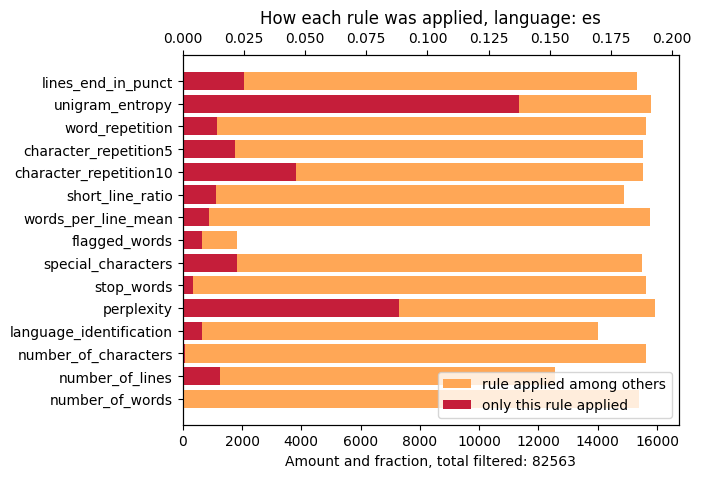

In [12]:
import matplotlib.pyplot as plt

# DO NOT ASK WHY IT PLOTS TWICE; I COULD NOT GET THE twiny() TO WORK WITHOUT DOUBLE PLOTTING

plt.barh(metrics, np.array(num_rule_applied), label="rule applied among others", color='#ffa756')
plt.barh(metrics, np.array(only_this_results), label="only this rule applied",color='#c51e3a')#color='#641b30')

plt.title("How each rule was applied, language: "+str(lang))

plt.xlabel("Amount and fraction, total filtered: "+str(b))
ax2 = plt.gca().twiny()
plt.barh(metrics, np.array(num_rule_applied)/b, label="rule applied among others", color='#ffa756')
plt.barh(metrics, np.array(only_this_results)/b, label="only this rule applied",color='#c51e3a')#color='#641b30')
plt.legend()
plt.show()
plt.close()

#plt.barh(metrics, np.array(num_rule_applied)/b, label="rule applied",color='#ffa756')
#plt.barh(metrics, np.array(only_this_results)/b, label="only this rule applied",color='#c51e3a')
#plt.title("Fraction of times each rule was applied, language :"+str(lang))
#plt.legend()
#plt.xlabel("Fraction of all filtered instances")
#plt.show()
#plt.close()

In [13]:
df_ut1 = ut1_data[ut1_data.ut1 != 'None']
df_no_ut1 =ut1_data[ut1_data.ut1 == 'None']

print("ut1 flagged but keep=True: ",len(df_ut1[df_ut1.keep==True]))
print("ut1 flagged and keep=False: ",len(df_ut1[df_ut1.keep==False]))
print("ut1 not flagged, keep=True: ",len(df_no_ut1[df_no_ut1.keep==True]))
print("ut1 not flagged, keep=False: ",len(df_no_ut1[df_no_ut1.keep==False]))

#print(len(ut1_data[[ut1_data.ut1 !="None" and ut1_data.keep==True]]))
#print(len(ut1_data[ut1_data["ut1"] =="None" and ut1_data["keep"]==True]))
#print(len(ut1_data[ut1_data["ut1"] !="None" and ut1_data["keep"]==False]))
#print(len(ut1_data[ut1_data["ut1"] !="None" and ut1_data["keep"]==False]))

ut1 flagged but keep=True:  19
ut1 flagged and keep=False:  31
ut1 not flagged, keep=True:  74241
ut1 not flagged, keep=False:  82532


In [14]:
#for k,v in ut1_flag_combinations.items():
#    if k is not []:
#        print([id2metric[i] for i in eval(k)])
#        a_,b_ = np.unique(v, return_counts=True)
#        print([f'{ut1_categories[str(int(eval(a)))]}: {b}' for a,b in zip(a_,b_)])
#        print("--------")

In [15]:
# display ones which have keep=True but ut1=Flagged
def show_ut1():
    switch = True
    while switch:
        for d in dataset:
            if d["keep"]==True and d["ut1"]!="None":
                print(ut1_categories[str(int(eval(d["ut1"])))])
                print(d["url"])
                print(d["raw_content"])
                inp = input("q to quit, enter to continue")
                if inp =="q" or inp =="Q":
                    switch = False
                    break
                else:
                    clear_output()
#show_ut1()   


In [16]:
import seaborn as sns


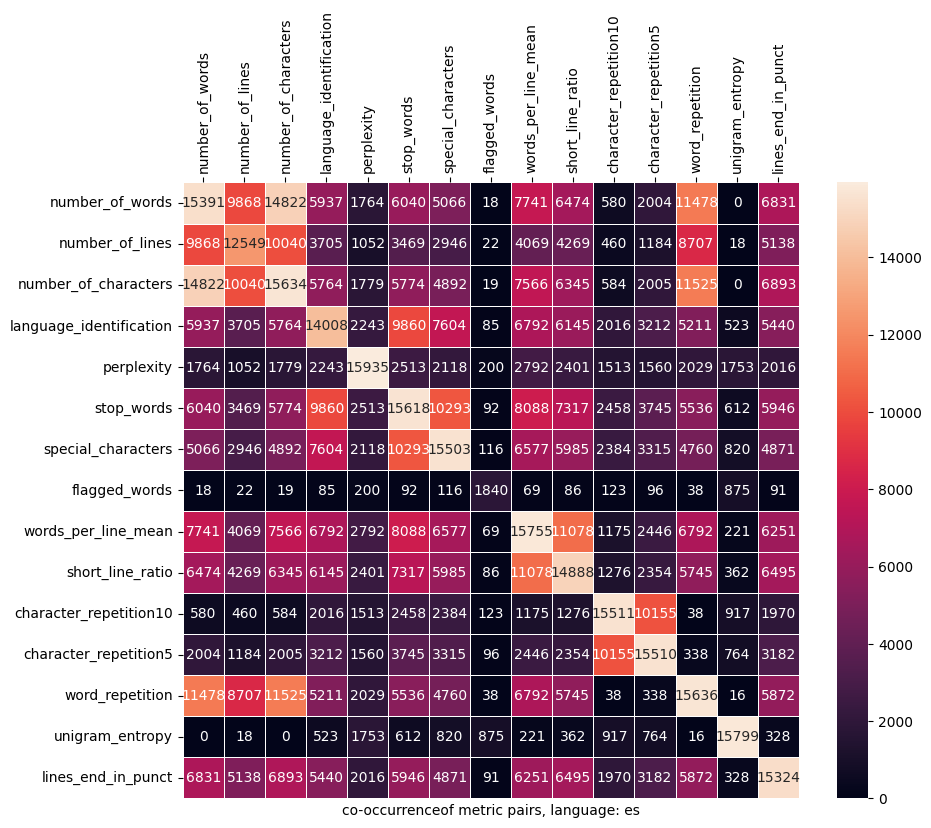

In [17]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(matrix, xticklabels = metric2id.keys(), yticklabels=metric2id.keys(), fmt='.0f',square = True, linewidths=0.5, annot=True)
ax.set(xlabel="co-occurrenceof metric pairs, language: "+lang)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

{'number_of_words': 0,
 'number_of_lines': 1,
 'number_of_characters': 2,
 'language_identification': 3,
 'perplexity': 4,
 'stop_words': 5,
 'special_characters': 6,
 'flagged_words': 7,
 'words_per_line_mean': 8,
 'short_line_ratio': 9,
 'character_repetition10': 10,
 'character_repetition5': 11,
 'word_repetition': 12,
 'unigram_entropy': 13,
 'lines_end_in_punct': 14}

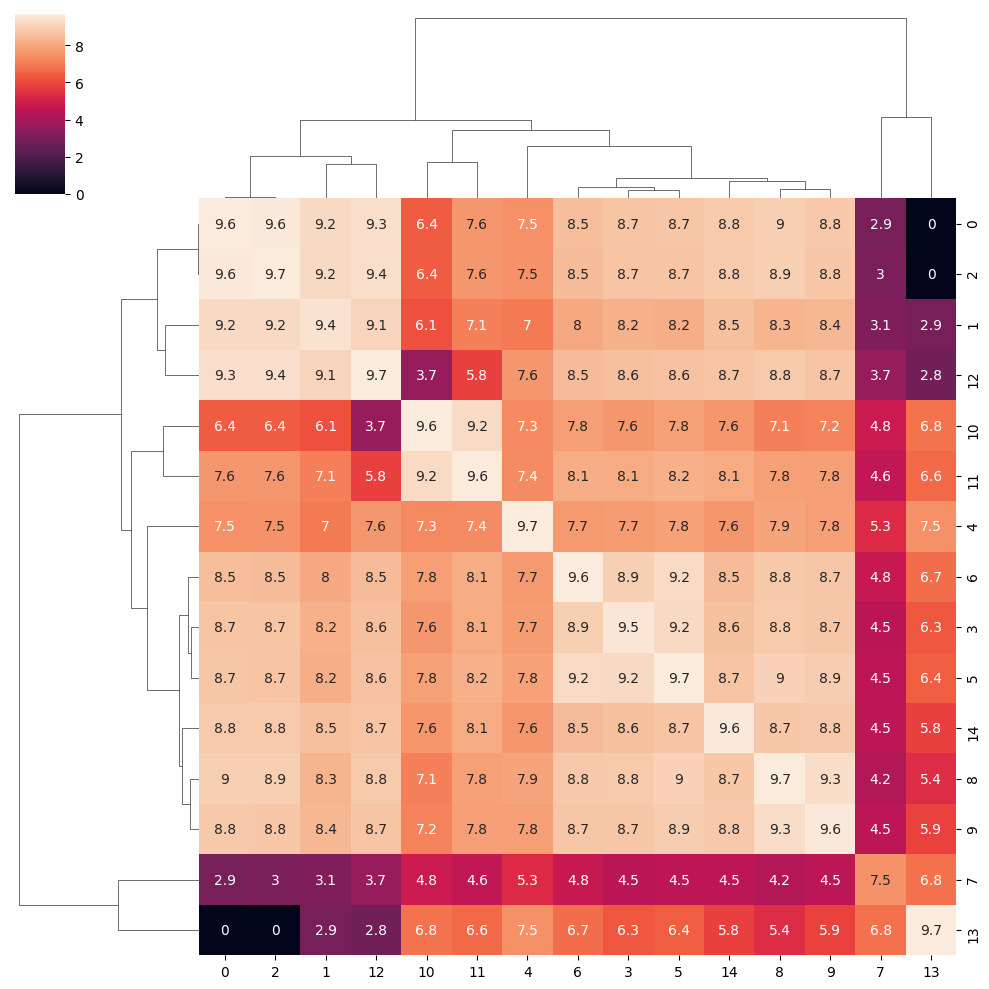

In [18]:
sns.clustermap(np.log(matrix+1),annot=True)
metric2id